<a href="https://colab.research.google.com/github/vuchicago/Python/blob/master/MSA_Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
####MOUNT DRIVE
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
###################### INSTALL TENSORFLOW 2.0 ##############################
!pip install tensorflow==2.0.0b1


     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 16.5MB/s 
     |████████████████████████████████| 501kB 51.4MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [5]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.0.0-beta1'

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime as dt

base_dir="/content/gdrive/My Drive/Python/MSA_Invest"
msa_dir=os.path.join(base_dir,"CAGDP11")
grad_boost_img=os.path.join(base_dir,"Gradient_boost_img")
deep_learning_img=os.path.join(base_dir,"Deep_learning_img")
deep_learning_img2=os.path.join(base_dir,"Deep_learning_img2")
os.chdir(base_dir)
PCA="PCA_Winter_2019-20_State_Forecast.xlsx"

PCA_sheet=pd.ExcelFile(PCA)
PCA_sheet.sheet_names ##List of all the sheets within excel file


['Output',
 'Res',
 'West North Central',
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'East North Central',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'East South Central',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'Middle Atlantic',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'Pacific',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'South Atlantic',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'West South Central',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
sheet_keep=[
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
idx=0
df_pca=pd.DataFrame()
for states in sheet_keep:
  df=pd.read_excel(PCA,sheet_name=states,header=1)
  keep_indices=[4,7,11,18,21,29,32,36,40,48,51,53,56,61,62,63]
  df=df.iloc[keep_indices,:]
  df=df.T
  df=df.rename(columns=df.iloc[0]).drop(df.index[0])
  df.insert(loc=idx, column='State', value=states)
  df=df.rename(columns={"States":"State","- Unemployment Rate":"Unemployment Rate","Total Portland Cement ":"Total Portland Cement","Cement Per Capita ":"Cement Per Capita"})
  df_pca=pd.concat([df_pca,df],axis=0,sort=True)

df_pca.head()

- Unemployment Rate, %  ... Unemployment Rate (%)
2000                    NaN  ...                   NaN
2001                    NaN  ...             0.0333213
2002                    NaN  ...             0.0399316
2003                    NaN  ...             0.0449228
2004                    NaN  ...             0.0449686

[5 rows x 19 columns]

In [0]:
BED="CAGDP11__ALL_AREAS_2002_2018.csv"
df_bed=pd.read_csv(BED, encoding='latin-1')
column_keep=["GeoName","Description_fixed", "2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017',"2018"]
df_bed=df_bed[column_keep][pd.notna(df_bed["GeoName"])] ##get rid of NA's from geoname column
df_bed.head()

GeoName                              Description_fixed  ...   2017  2018
0  Autauga, AL            All industry total (percent change)  ...   -6.8   4.3
1  Autauga, AL                             Private industries  ...  -6.13   4.5
2  Autauga, AL     Agriculture, forestry, fishing and hunting  ...   0.13  0.12
3  Autauga, AL  Mining, quarrying, and oil and gas extraction  ...  -0.04  0.69
4  Autauga, AL                                      Utilities  ...  -5.33  1.34

[5 rows x 19 columns]

In [0]:
df_bed=df_bed.melt(["GeoName","Description_fixed"],var_name="Year",value_name="Value") ###Turns dataset into a flat file.  Each year column (2002-2018) unpivots into 1 column named 'Year'
df_bed.head()


GeoName                              Description_fixed  Year  Value
0  Autauga, AL            All industry total (percent change)  2002    2.2
1  Autauga, AL                             Private industries  2002   0.91
2  Autauga, AL     Agriculture, forestry, fishing and hunting  2002  -0.36
3  Autauga, AL  Mining, quarrying, and oil and gas extraction  2002  -0.07
4  Autauga, AL                                      Utilities  2002   3.25

In [0]:
df_bed_piv=pd.pivot_table(df_bed,index=["GeoName","Year"],columns="Description_fixed",values="Value",aggfunc=np.sum) #Re-pivots data where the description columns creates multiple columns bbased on grouping
df_bed_piv.head()

Description_fixed  Accommodation and food services  ... Wholesale trade
GeoName       Year                                  ...                
Abbeville, SC 2002                           -0.01  ...           -0.22
              2003                           -0.19  ...             (D)
              2004                            0.12  ...           -0.04
              2005                           -0.13  ...             (D)
              2006                           -0.09  ...           -0.11

[5 rows x 34 columns]

In [0]:
df_bed_piv.to_csv("df_bed_piv.csv")
df_pca.to_csv("df_pca.csv")


In [7]:
####################################################################################
import pandas as pd
import numpy as np


df_bed_draft=pd.read_csv("df_bed_piv.csv")
df_bed_draft["State"]=df_bed_draft["GeoName"].str[-2:]
df_bed_draft.head()

Unnamed: 0        GeoName  Year  ... Utilities Wholesale trade State
0           0  Abbeville, SC  2002  ...      0.07           -0.22    SC
1           1  Abbeville, SC  2003  ...     -0.01             (D)    SC
2           2  Abbeville, SC  2004  ...         0           -0.04    SC
3           3  Abbeville, SC  2005  ...     -0.05             (D)    SC
4           4  Abbeville, SC  2006  ...      0.06           -0.11    SC

[5 rows x 38 columns]

In [0]:
State_acro={
'Colorado':'CO',
'Idaho':'ID',
'Montana':'MT',
'New Mexico':'NM',
'Nevada':'NV',
'Oregon':'OR',
'Utah':'UT',
'Washington':'WA',
'Wyoming':'WY',
'Iowa':'IA',
'Illinois':'IL',
'Kansas':'KS',
'Minnesota':'MN',
'Missouri':'MO',
'North Dakota':'ND',
'Nebraska':'NE',
'South Dakota':'SD',
'Wisconsin':'WI',
'Indiana':'IN',
'Kentucky':'KY',
'Michigan':'MI',
'Ohio':'OH',
'West Virginia':'WV',
'Connecticut':'CT',
'District of Columbia':'DC',
'Delaware':'DE',
'Massachusetts':'MA',
'Maryland':'MD',
'Maine':'ME',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New York':'NY',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'Virginia':'VA',
'Vermont':'VT',
'Alabama':'AL',
'Arkansas':'AR',
'Florida':'FL',
'Georgia':'GA',
'Louisiana':'LA',
'Mississippi':'MS',
'North Carolina':'NC',
'South Carolina':'SC',
'Tennessee':'TN',
'Texas':'TX',
'Oklahoma':'OK'}	



In [14]:
################################################ START HERE
df_pca=pd.read_csv("df_pca.csv")
df_pca["State_acro"]=df_pca["State"].map(State_acro)
df_pca=df_pca.rename(columns={"Unnamed: 0":"Year"})
df_pca.head()


Year  - Unemployment Rate, %  ... Unemployment Rate (%) State_acro
0  2000                     NaN  ...                   NaN         IA
1  2001                     NaN  ...              0.033321         IA
2  2002                     NaN  ...              0.039932         IA
3  2003                     NaN  ...              0.044923         IA
4  2004                     NaN  ...              0.044969         IA

[5 rows x 21 columns]

In [16]:
df_complete=pd.merge(df_pca,df_bed_draft,how='inner',left_on=["State_acro","Year"],right_on=["State","Year"])
df_complete=df_complete.rename(columns={'Private goods-producing industries 2/':'Private goods-producing industries','Private services-providing industries 3/':'Private services-providing industries'})
df_complete.columns

Index(['Year', '- Unemployment Rate, %', 'Agricultural Cement',
       'Cement Intensity (MT/Mil$2009)', 'Cement Per Capita',
       'Cement Per GSP (MT/Mil$2005)', 'Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits', 'State_x',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'State_acro', 'Unnamed: 0', 'GeoName',
       'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodati

In [0]:
###### KEEP THESE COLUMNS FROM DF_COMPLETE
var_pca= ['Cement Intensity (MT/Mil$2009)', ####PCA DATA
          'Cement Per Capita',
          'Cement Per GSP (MT/Mil$2005)', 
          'Cement Per GSP (MT/Mil$2009)',
          'Commercial Cement Consumption', 
          'Commercial Construction Spending',
          'Government Cement Consumption',
          'Gross State Product, Real ($2012, Millions)', 
          'Multi Family Permits',
          'Public Construction Spending', 
          'Residential Cement Consumption',
          'Residential Construction Spending', 
          'Single Family Permits', 
          'Total Construction Spending', 
          'Total Portland Cement',
          'Unemployment Rate (%)'] 

var_bed=  ['Accommodation and food services', #####BUREAU OF ECONOMIC DEVELOPMENT DATA
          'Administrative and support and waste management and remediation services',
          'Agriculture, forestry, fishing and hunting',
          'All industry total (percent change)',
          'Arts, entertainment, and recreation',
          'Arts, entertainment, recreation, accommodation, and food services',
          'Construction', 
          'Durable goods manufacturing', 
          'Educational services',
          'Educational services, health care, and social assistance',
          'Finance and insurance',
          'Finance, insurance, real estate, rental, and leasing',
          'Government and government enterprises',
          'Health care and social assistance', 
          'Information',
          'Management of companies and enterprises', 
          'Manufacturing',
          'Manufacturing and information',
          'Mining, quarrying, and oil and gas extraction',
          'Natural resources and mining', 
          'Nondurable goods manufacturing',
          'Other services (except government and government enterprises)',
          'Private goods-producing industries', 
          'Private industries',
          'Private services-providing industries',
          'Professional and business services',
          'Professional, scientific, and technical services',
          'Real estate and rental and leasing', 
          'Retail trade', 'Trade',
          'Transportation and utilities', 
          'Transportation and warehousing',
          'Utilities', 
          'Wholesale trade']
var_keep=var_pca+var_bed

In [0]:
var_keep_complete=["GeoName","Year"]+var_keep
df_final=df_complete[var_keep_complete]
for var in var_keep:
  df_final[var]=df_final[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_final[var]=df_final[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_final[var]=df_final[var].ffill() ##Forward fills data if NA
  df_final[var]=df_final[var].bfill()
  df_final[var]=df_final[var].astype(float)
  df_final[var]=df_final[var]*1.0
  
df_final=df_final.replace('(D)',np.nan)

df_final.columns

In [0]:
df_final.dtypes

GeoName                                                                      object
Year                                                                          int64
Cement Intensity (MT/Mil$2009)                                              float64
Cement Per Capita                                                           float64
Cement Per GSP (MT/Mil$2005)                                                float64
Cement Per GSP (MT/Mil$2009)                                                float64
Commercial Cement Consumption                                               float64
Commercial Construction Spending                                            float64
Government Cement Consumption                                               float64
Gross State Product, Real ($2012, Millions)                                 float64
Multi Family Permits                                                        float64
Public Construction Spending                                                

In [0]:
df_final.to_csv("df_final.csv")

In [0]:
df_final=pd.read_csv("df_final.csv")

In [6]:
df_final.dtypes

Unnamed: 0                                                                    int64
GeoName                                                                      object
Year                                                                          int64
Cement Intensity (MT/Mil$2009)                                              float64
Cement Per Capita                                                           float64
Cement Per GSP (MT/Mil$2005)                                                float64
Cement Per GSP (MT/Mil$2009)                                                float64
Commercial Cement Consumption                                               float64
Commercial Construction Spending                                            float64
Government Cement Consumption                                               float64
Gross State Product, Real ($2012, Millions)                                 float64
Multi Family Permits                                                        

In [15]:
################################# CREATE TRAINING AND VALIDATION DATASET
df_final_rand=df_final.sample(frac=1,random_state=2) ###Samples data with same random state
df_train=df_final_rand[:np.int(.8*len(df_final_rand))]
df_val=df_final_rand[np.int(.8*len(df_final_rand)):]
print("Train has {} samples; val has {} samples".format(len(df_train),len(df_val)))



#################################  CREATE TEST DATASET 
df_pca_test=pd.DataFrame()
for var in var_pca:
  df_pca_test[var]=df_pca[var].replace('g',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_pca_test[var]=df_pca_test[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_pca_test[var]=df_pca_test[var].ffill() ##Forward fills data if NA
  df_pca_test[var]=df_pca_test[var].bfill()

df_pca_test=df_pca_test[var_pca][df_pca["Year"]>2000].astype(float) ###CREATE PREDICTIONS


Train has 40487 samples; val has 10122 samples


array([[1.69875823e+02, 5.78805149e-01, 5.29017872e+00, ...,
        9.98997369e+03, 1.69705500e+06, 3.33212977e-02],
       [1.69791127e+02, 5.91298467e-01, 5.29017872e+00, ...,
        1.02184845e+04, 1.73500800e+06, 3.99315814e-02],
       [1.26997959e+02, 5.69952606e-01, 5.29017872e+00, ...,
        1.32033619e+04, 1.67680001e+06, 4.49228474e-02],
       ...,
       [1.33565189e+02, 5.63082584e-01, 3.25115518e+00, ...,
        1.28062432e+05, 1.71046829e+07, 4.20607138e-02],
       [1.33443130e+02, 5.64326527e-01, 3.25115518e+00, ...,
        1.30344061e+05, 1.73935194e+07, 4.09750395e-02],
       [1.32865540e+02, 5.68635652e-01, 3.25115518e+00, ...,
        1.33857080e+05, 1.77849933e+07, 3.98757092e-02]])

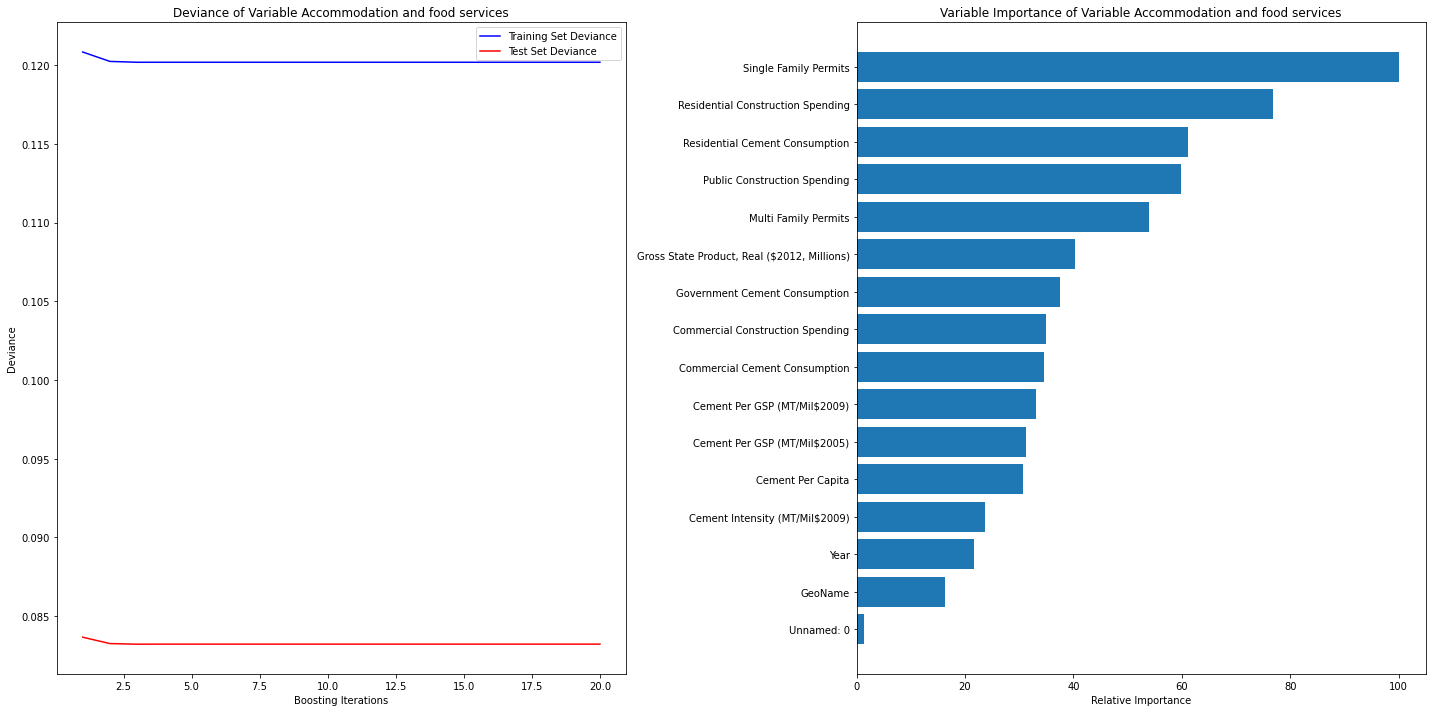

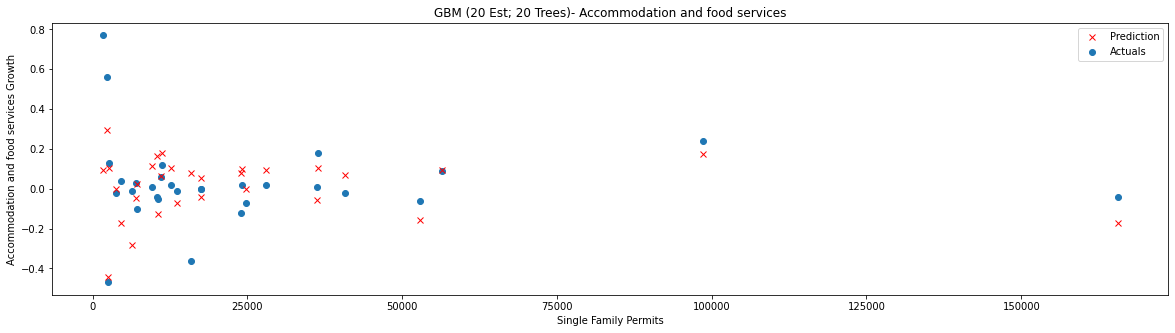

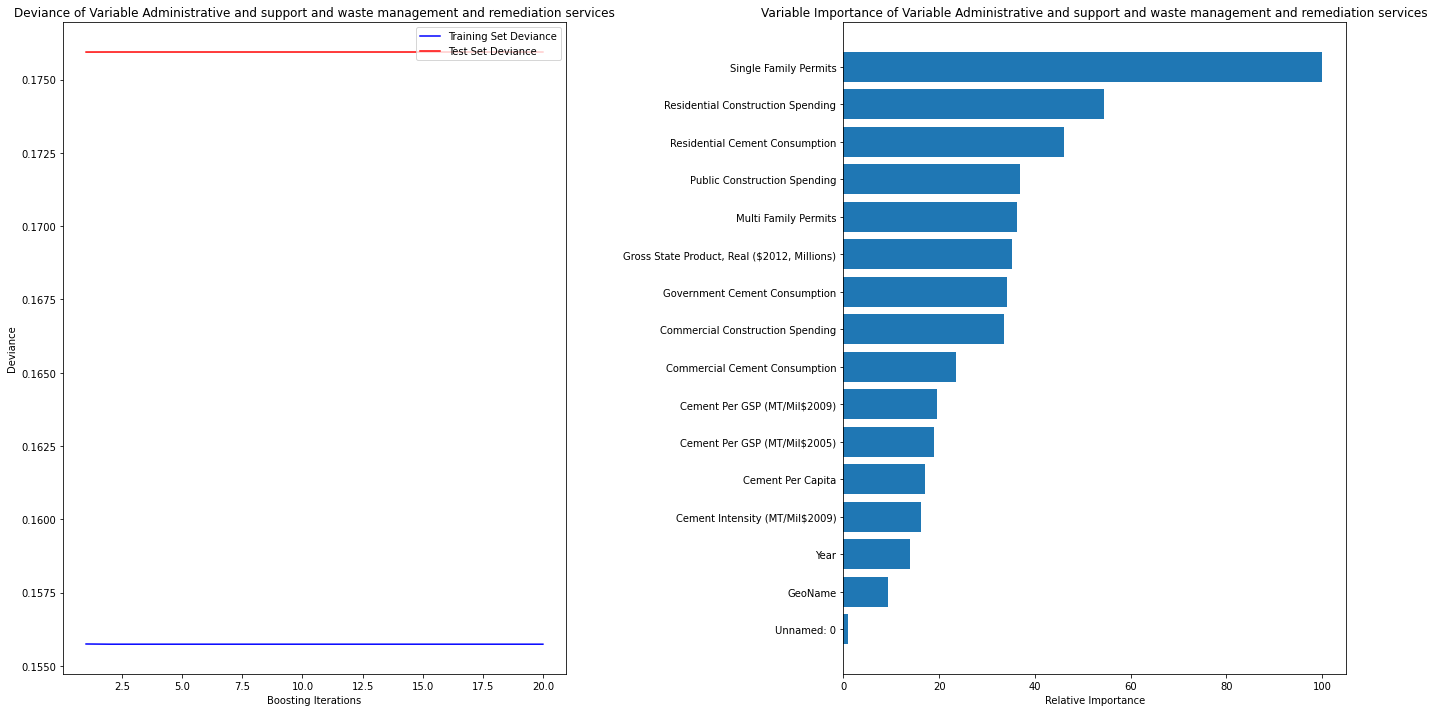

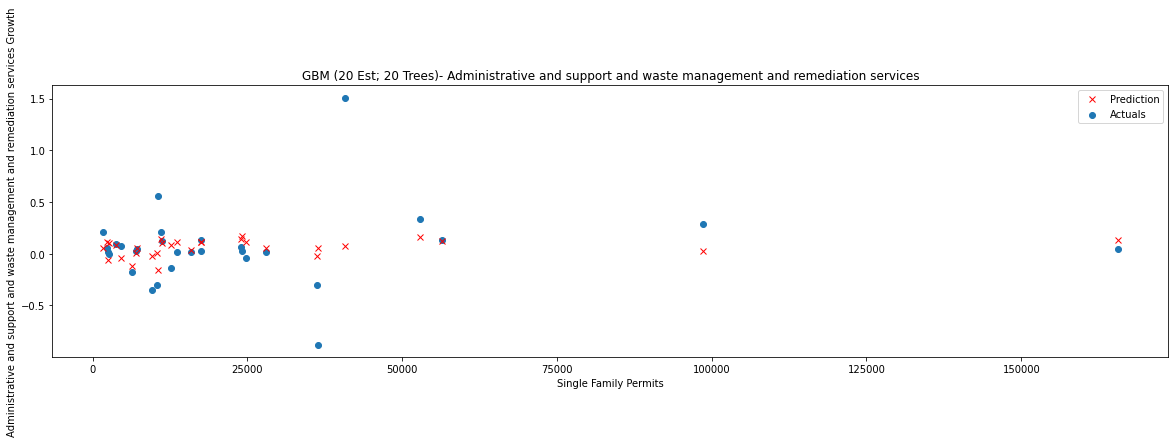

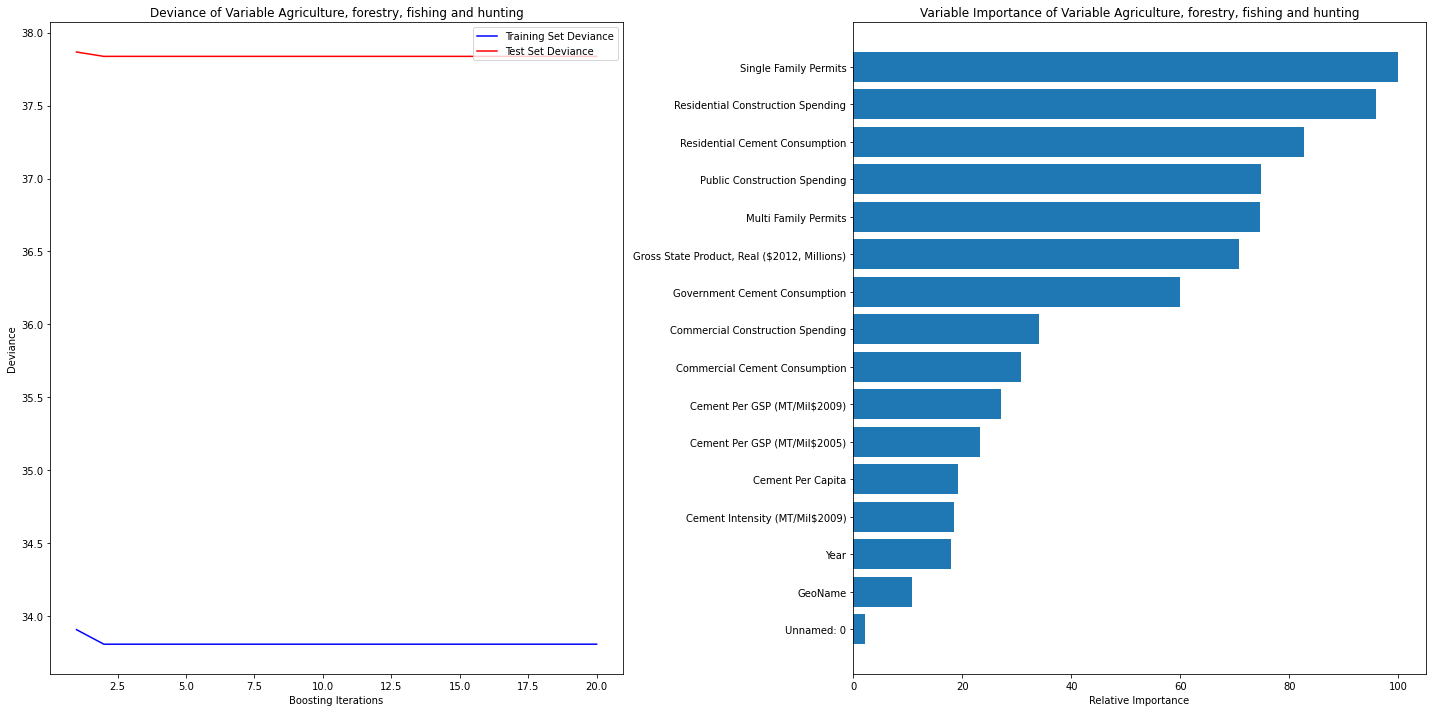

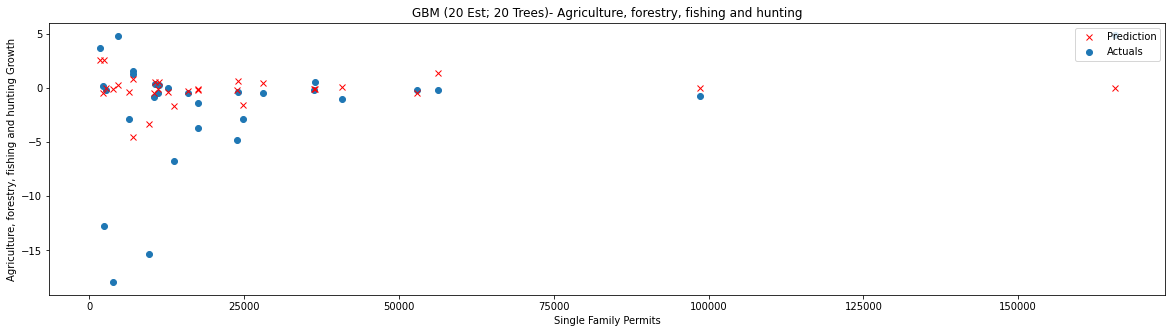

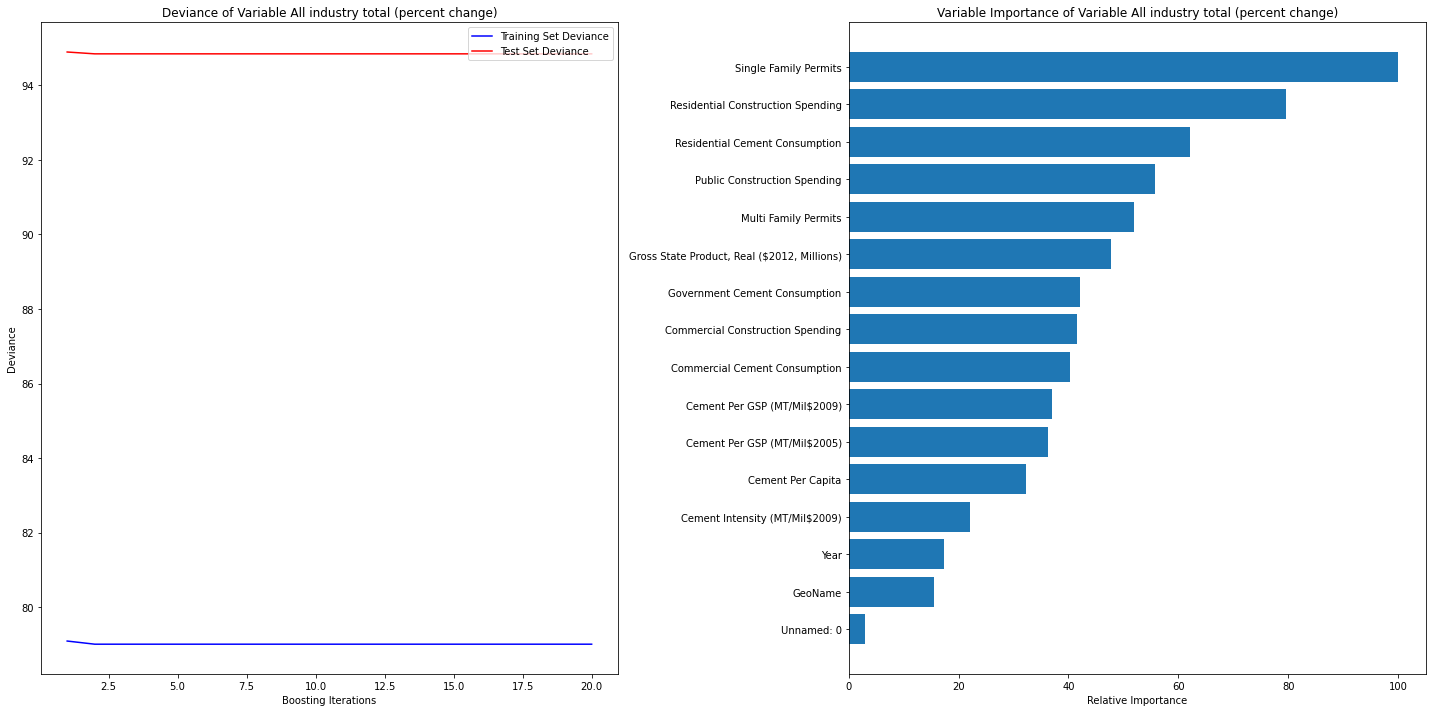

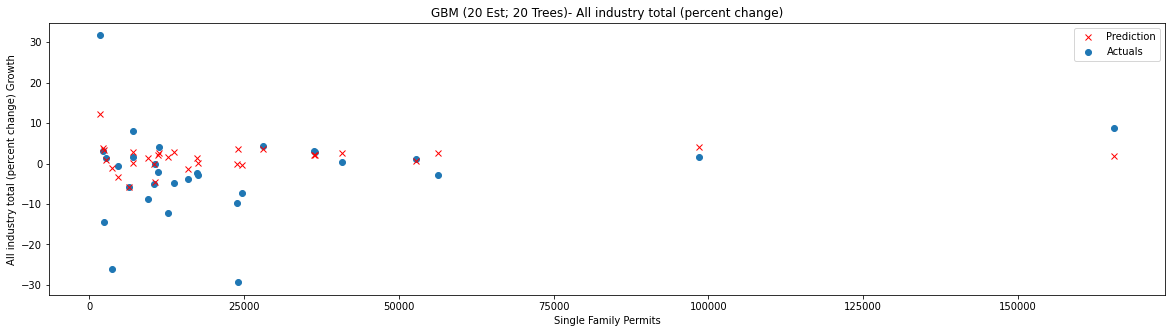

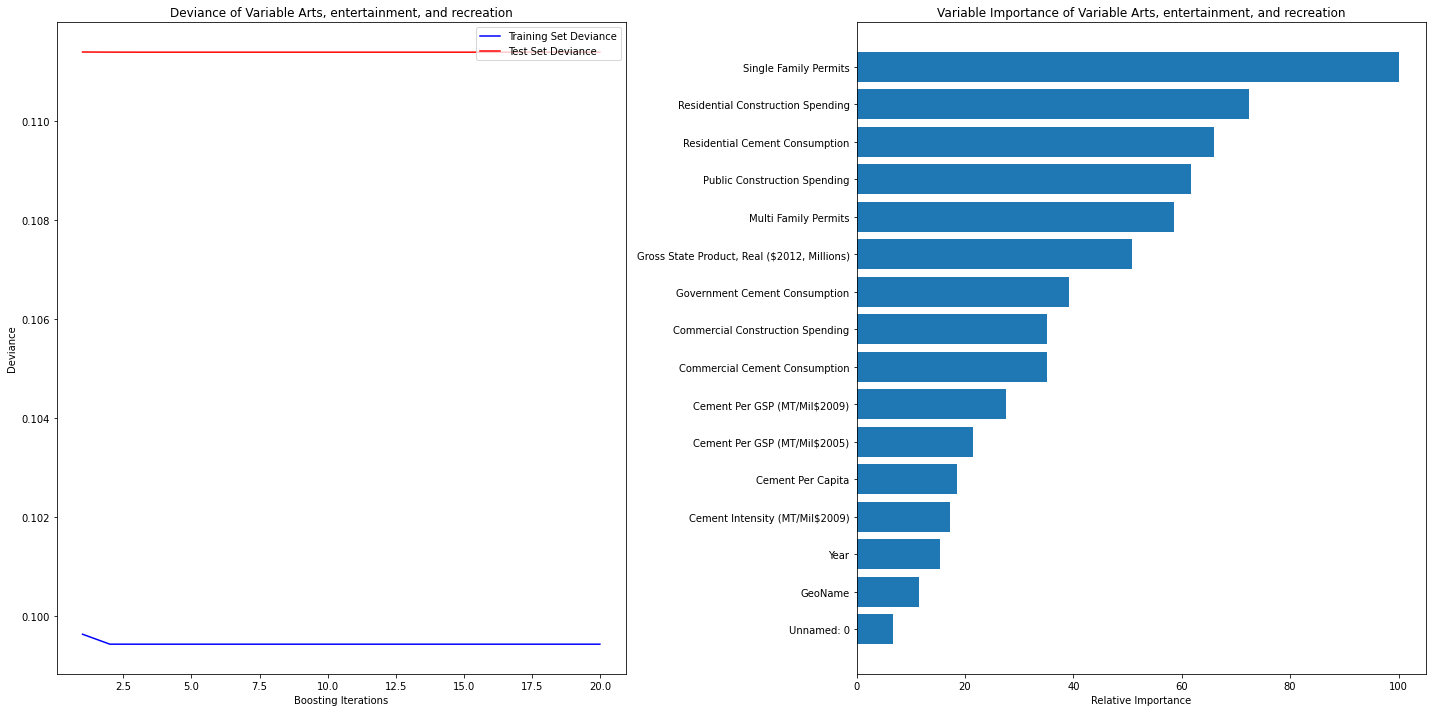

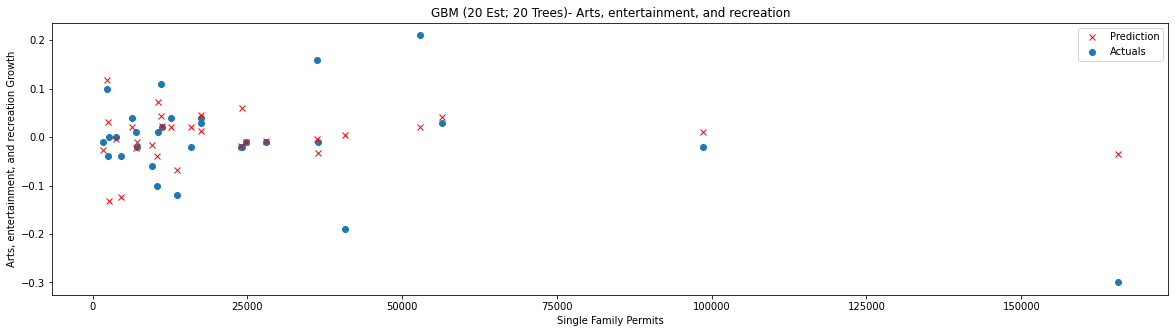

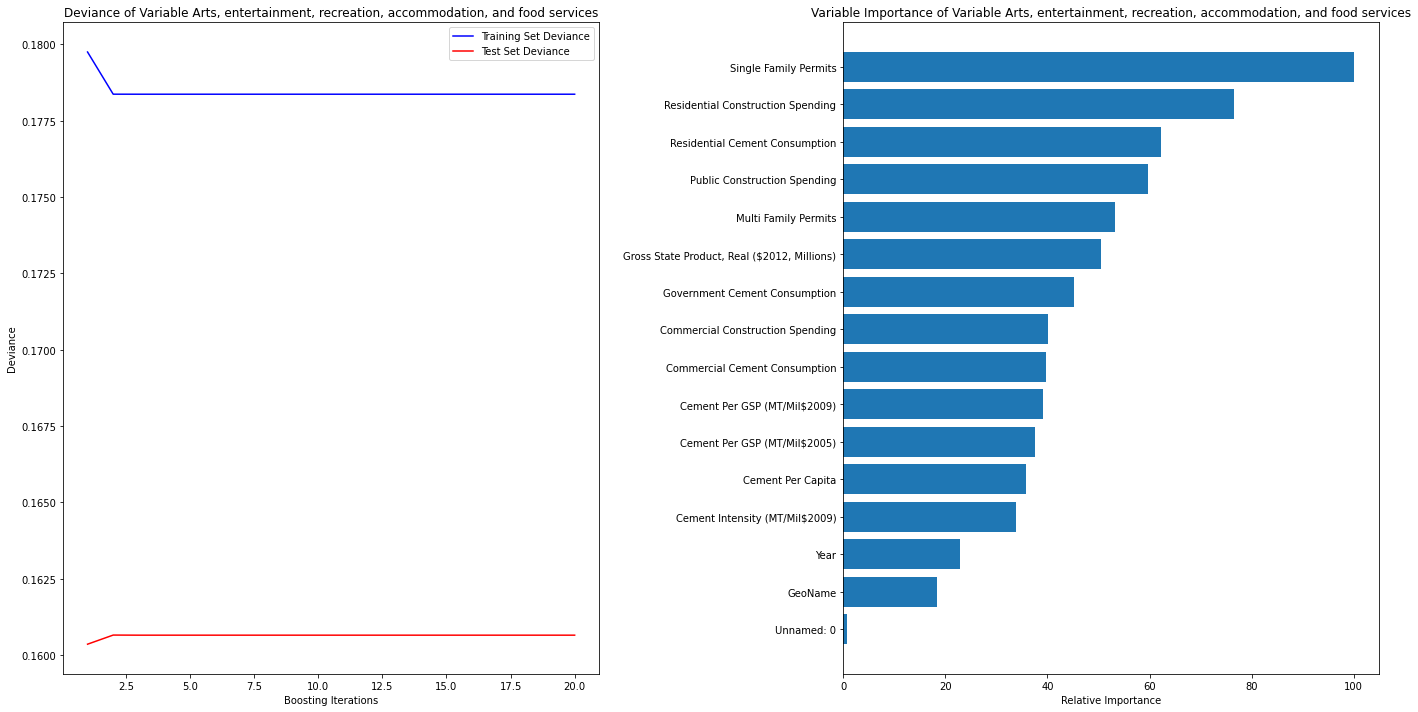

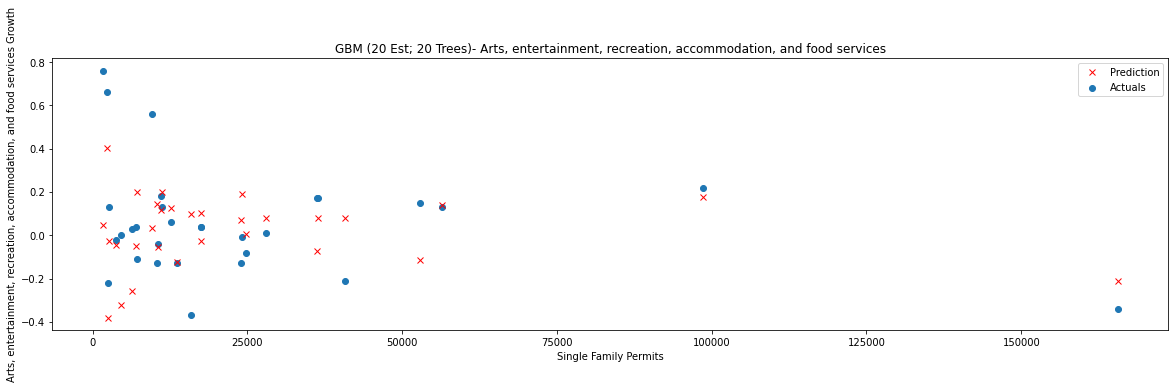

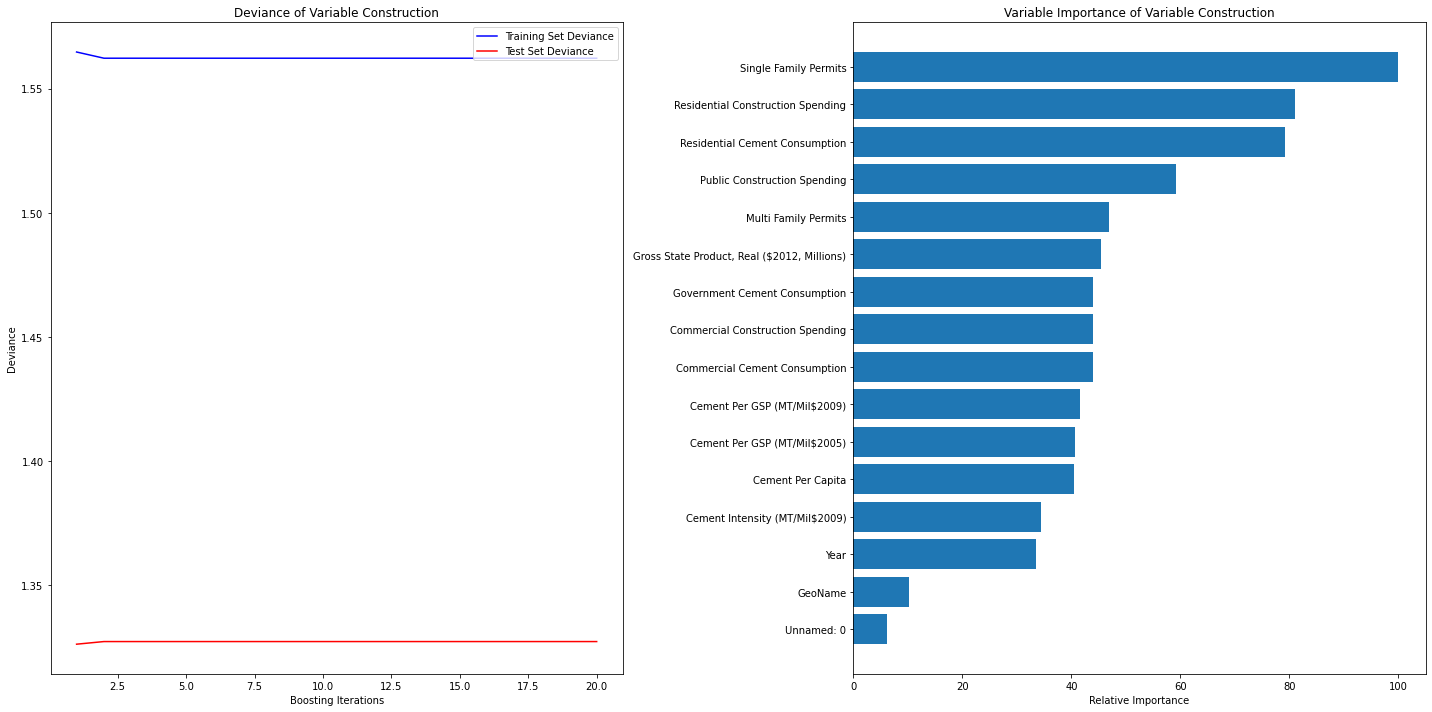

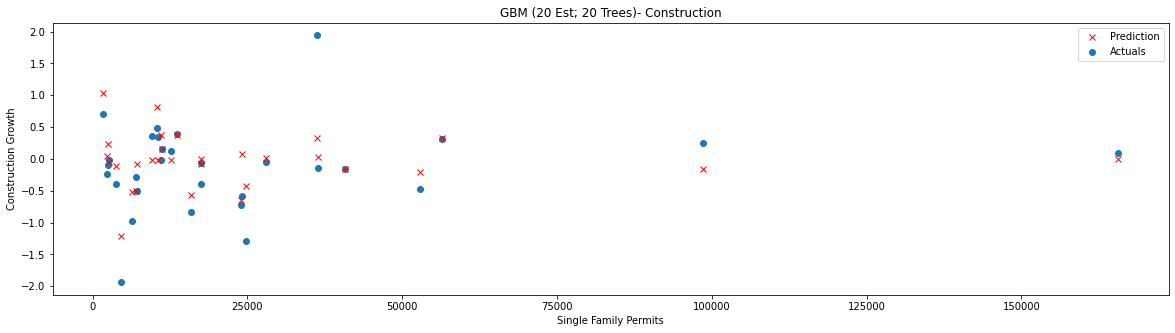

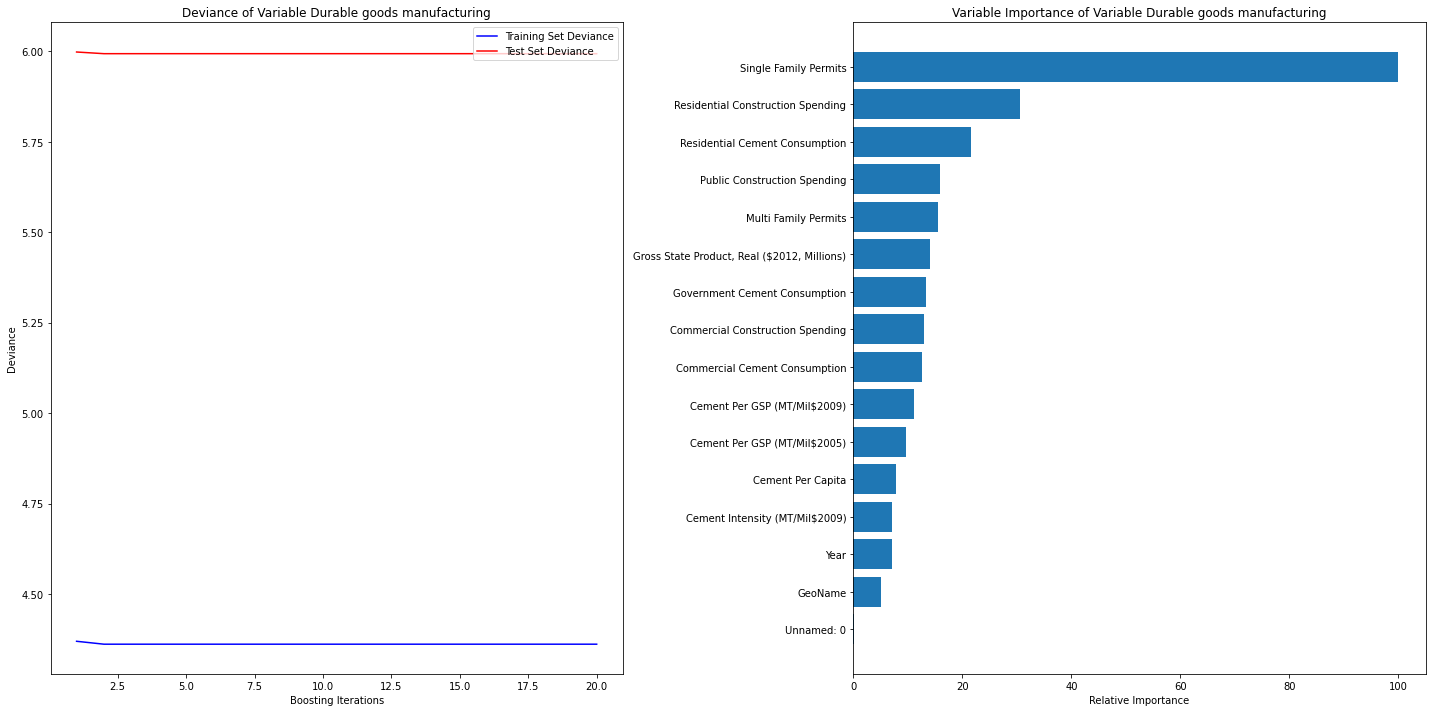

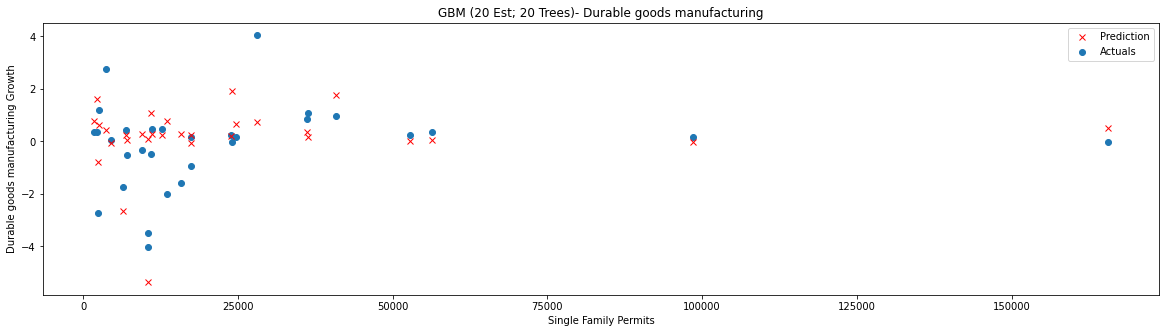

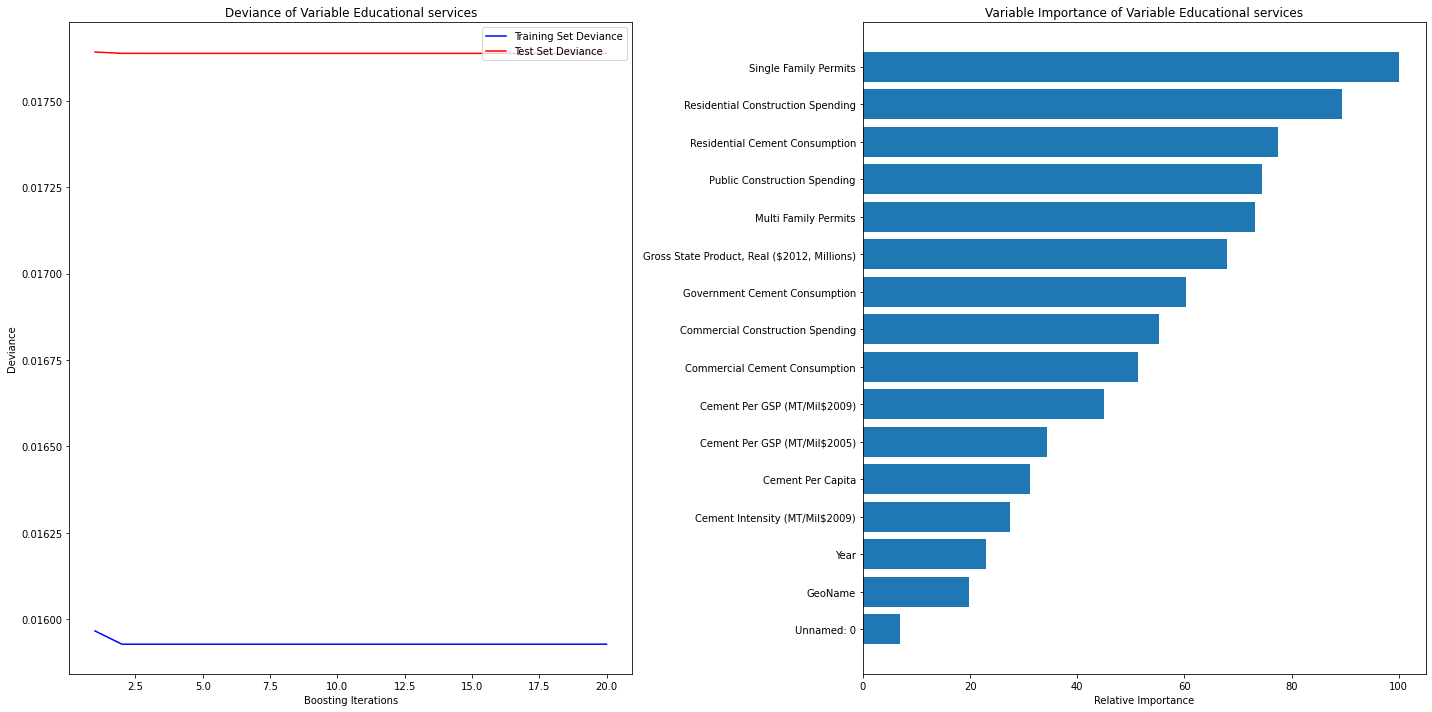

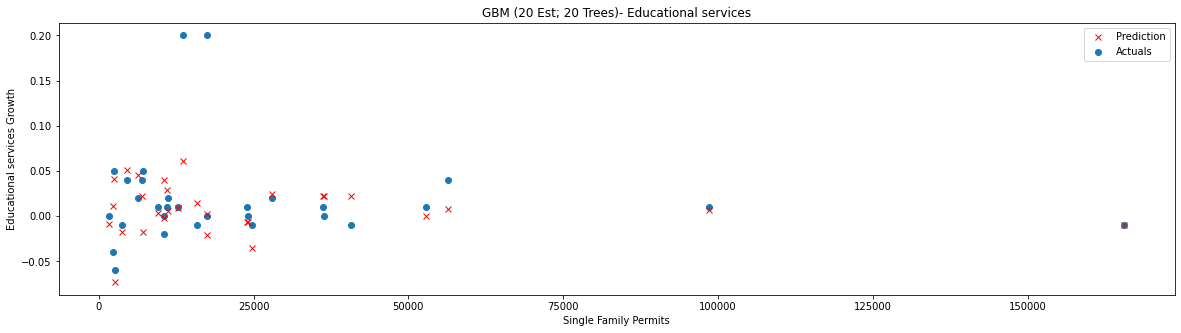

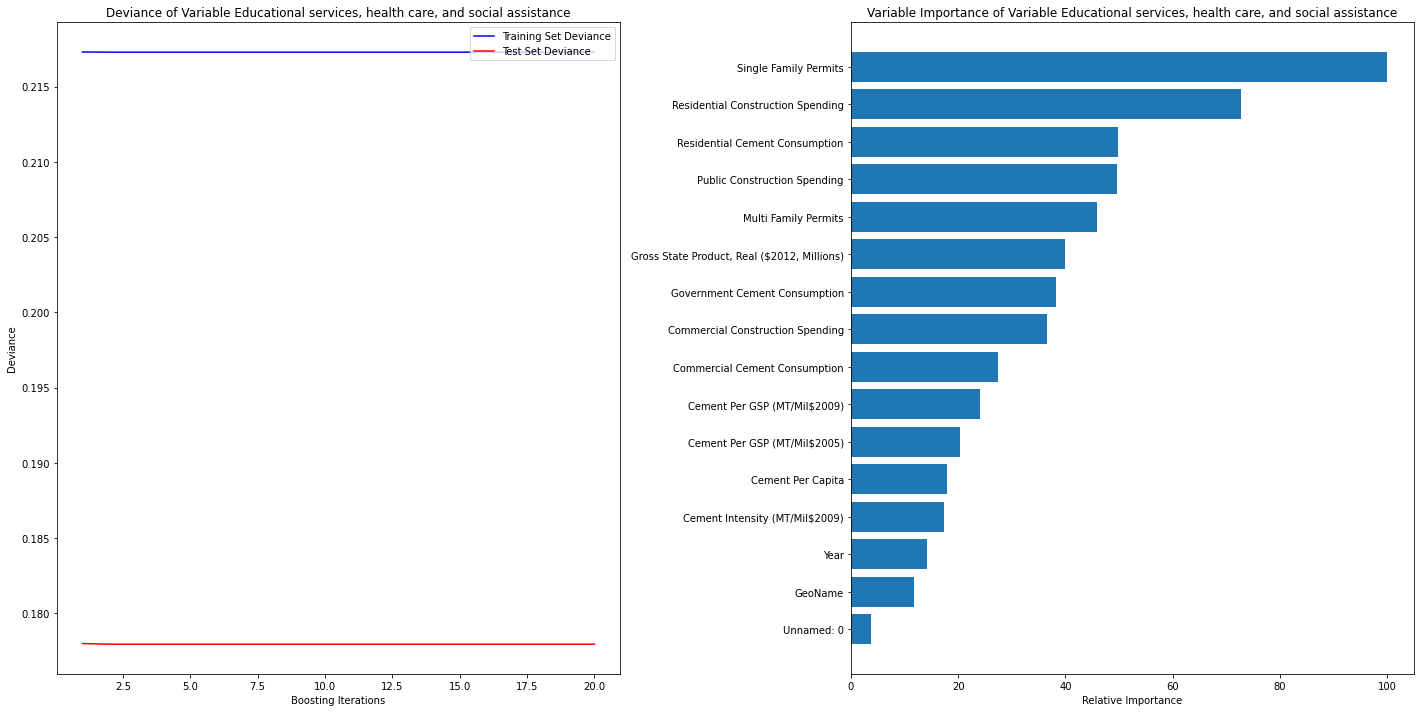

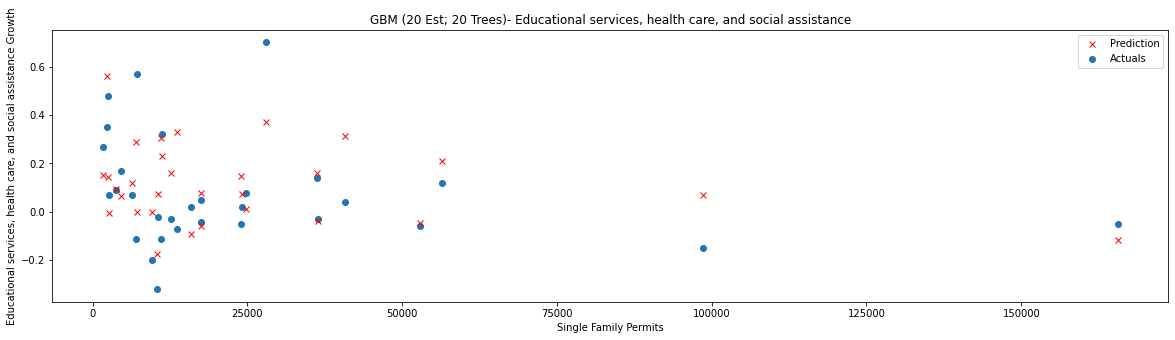

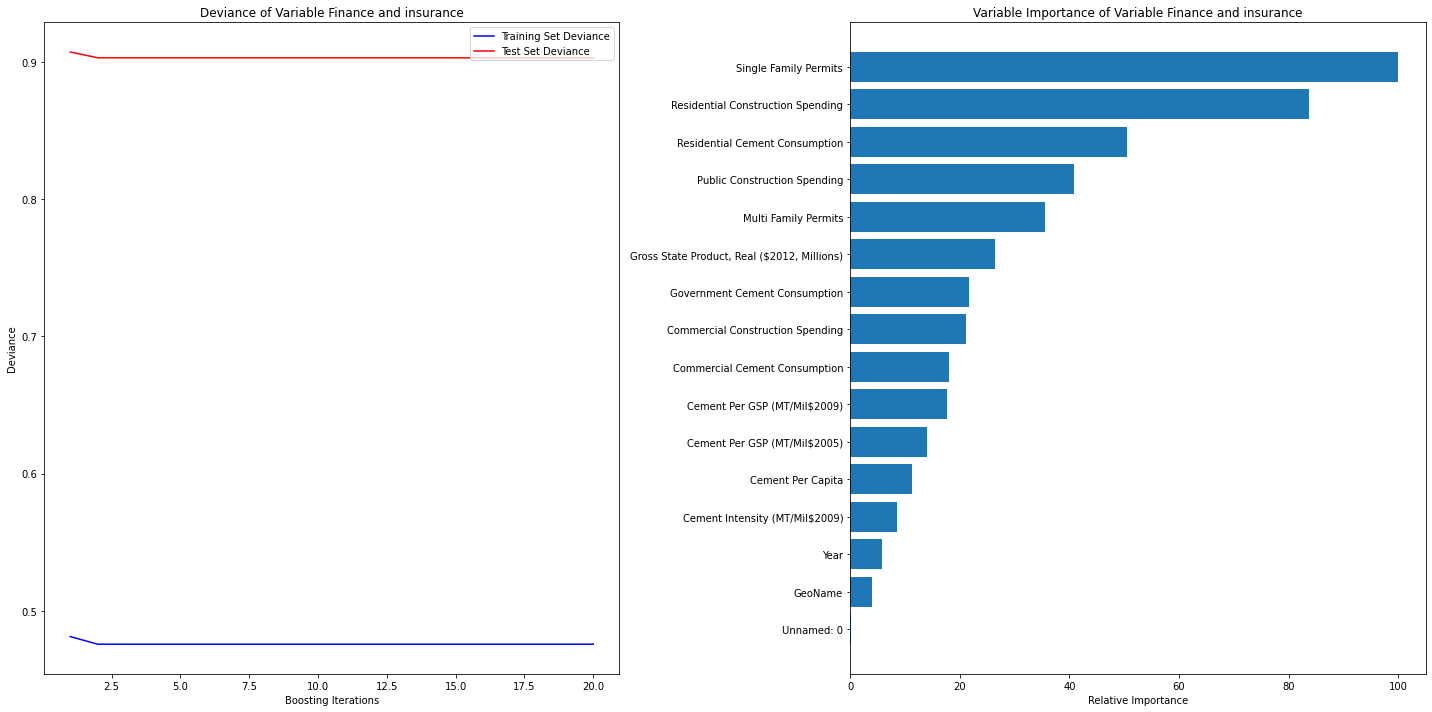

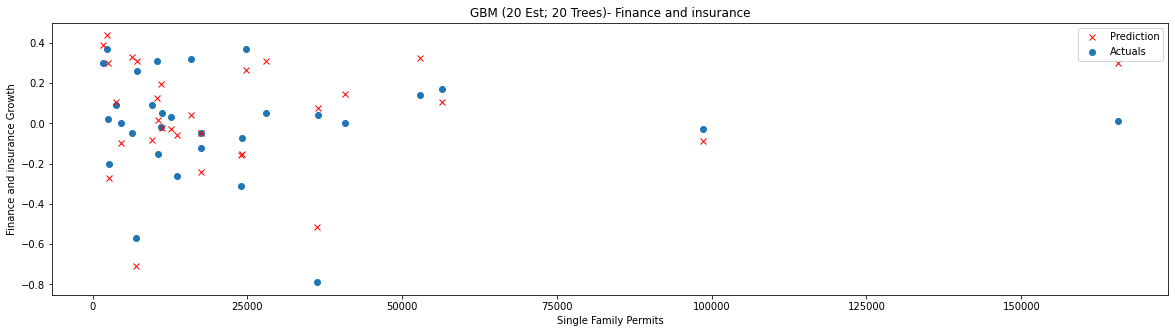

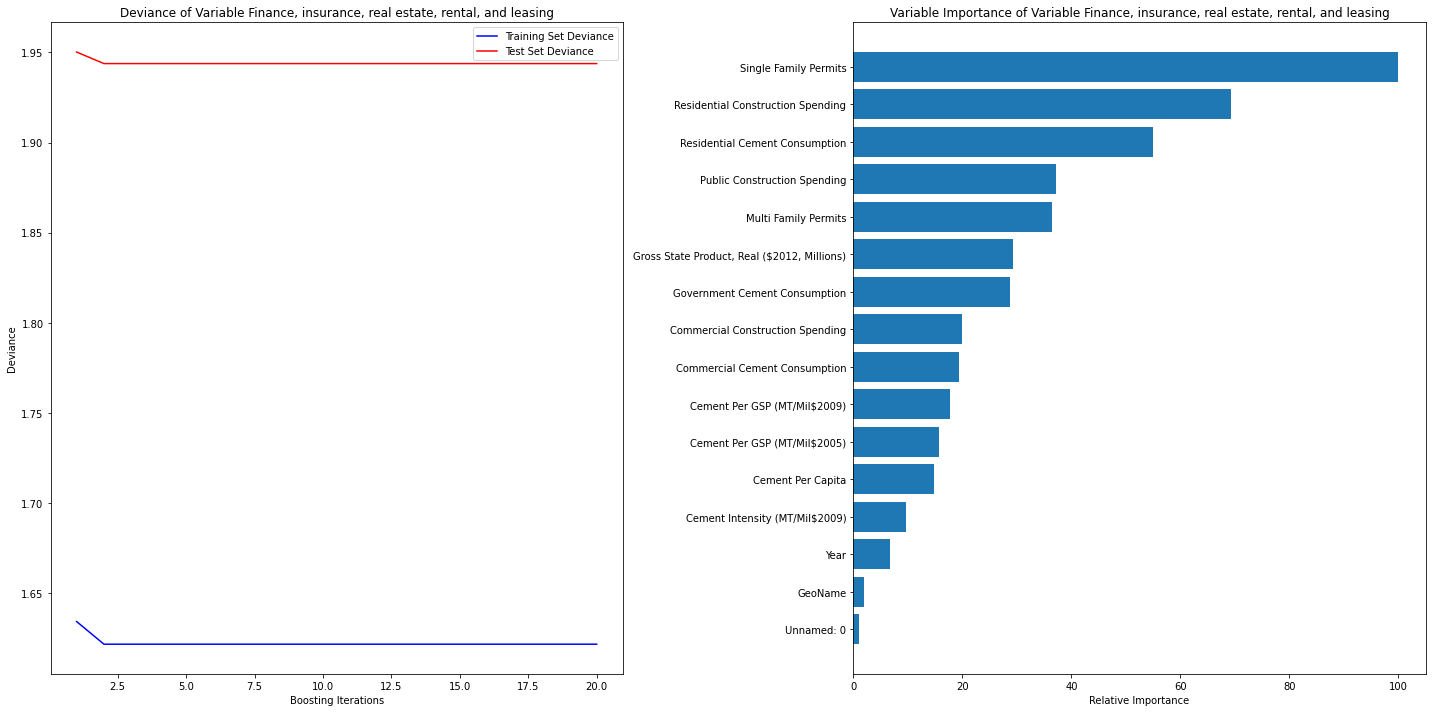

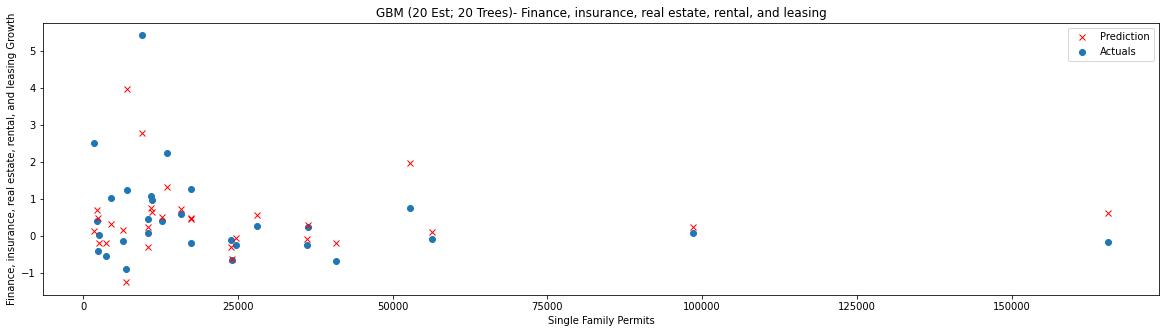

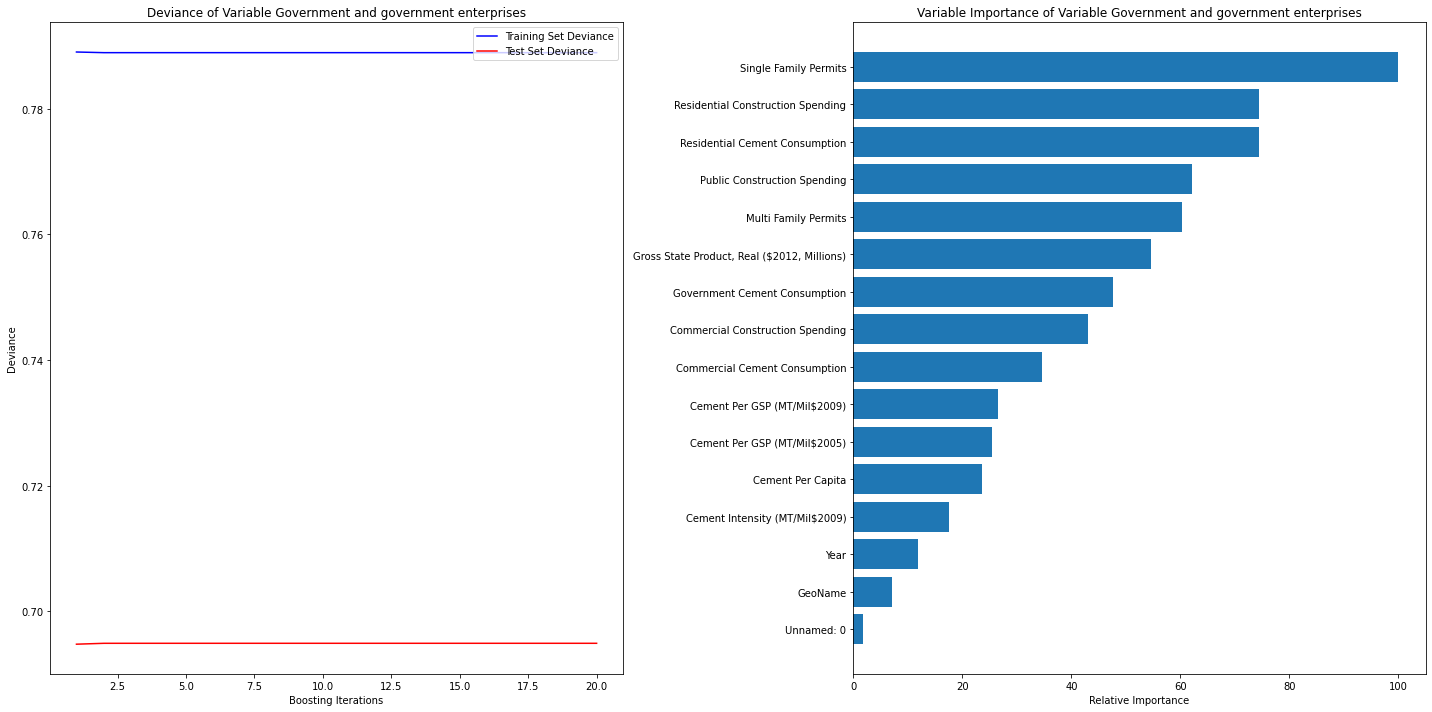

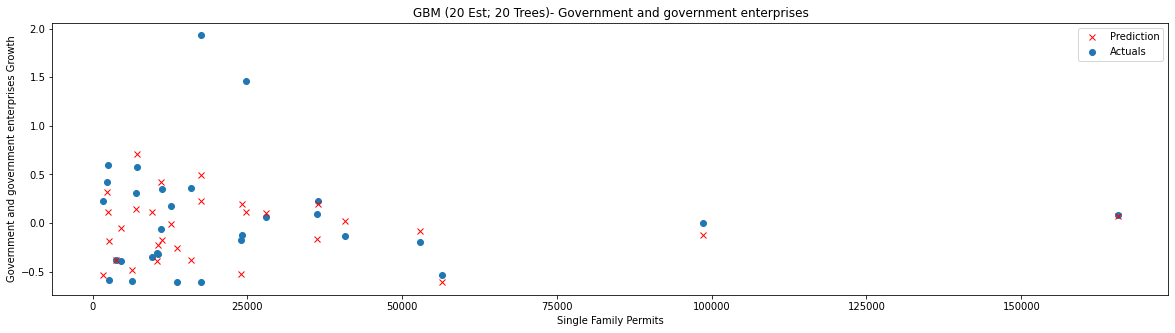

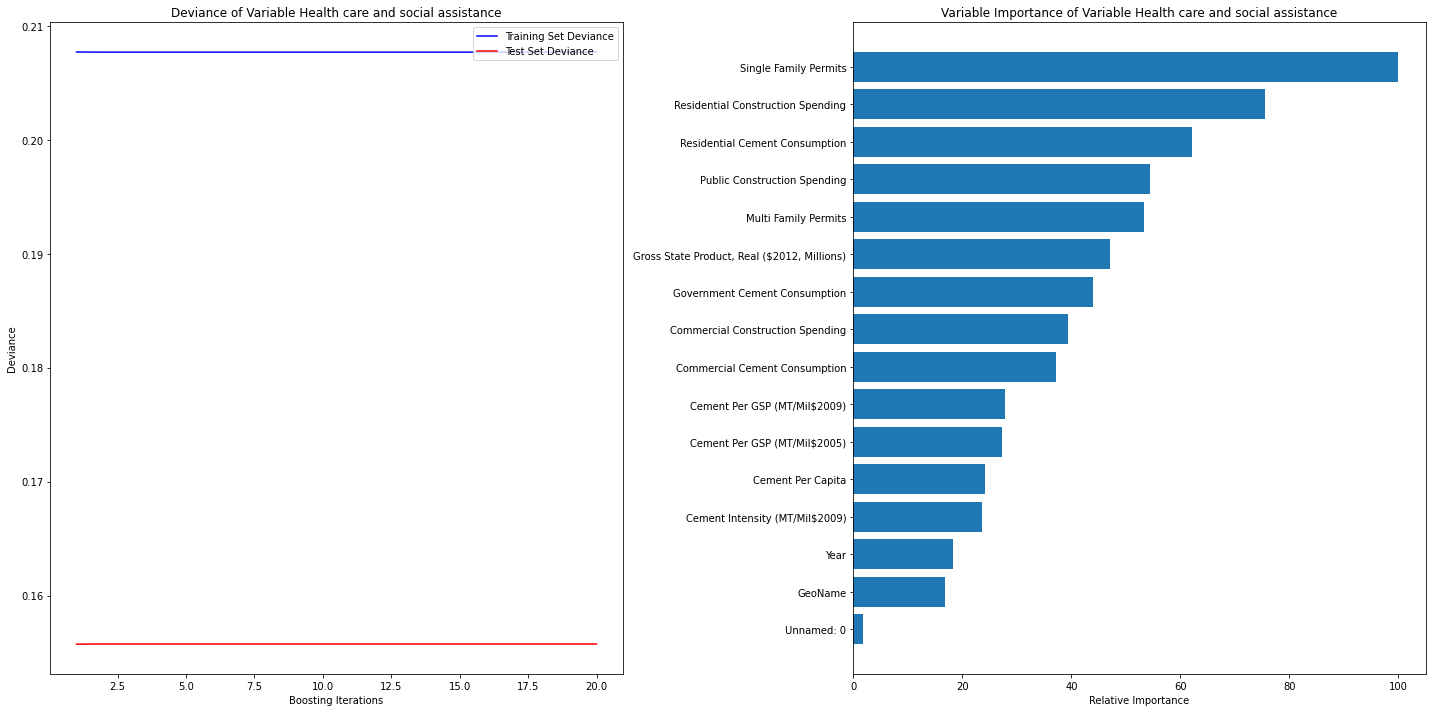

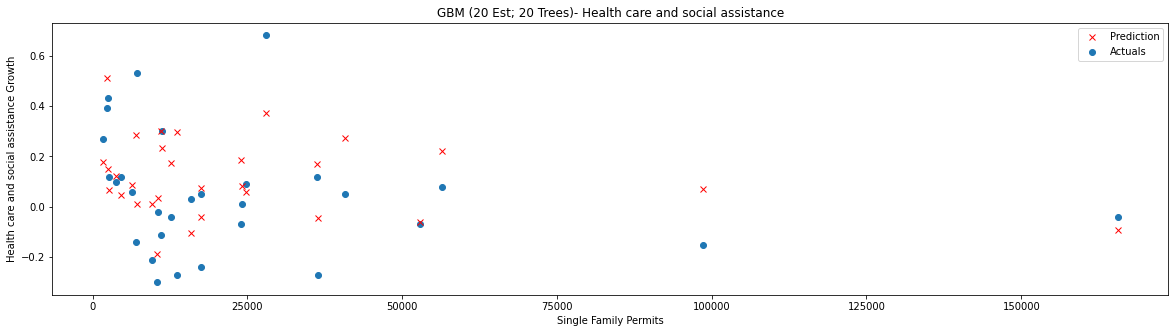

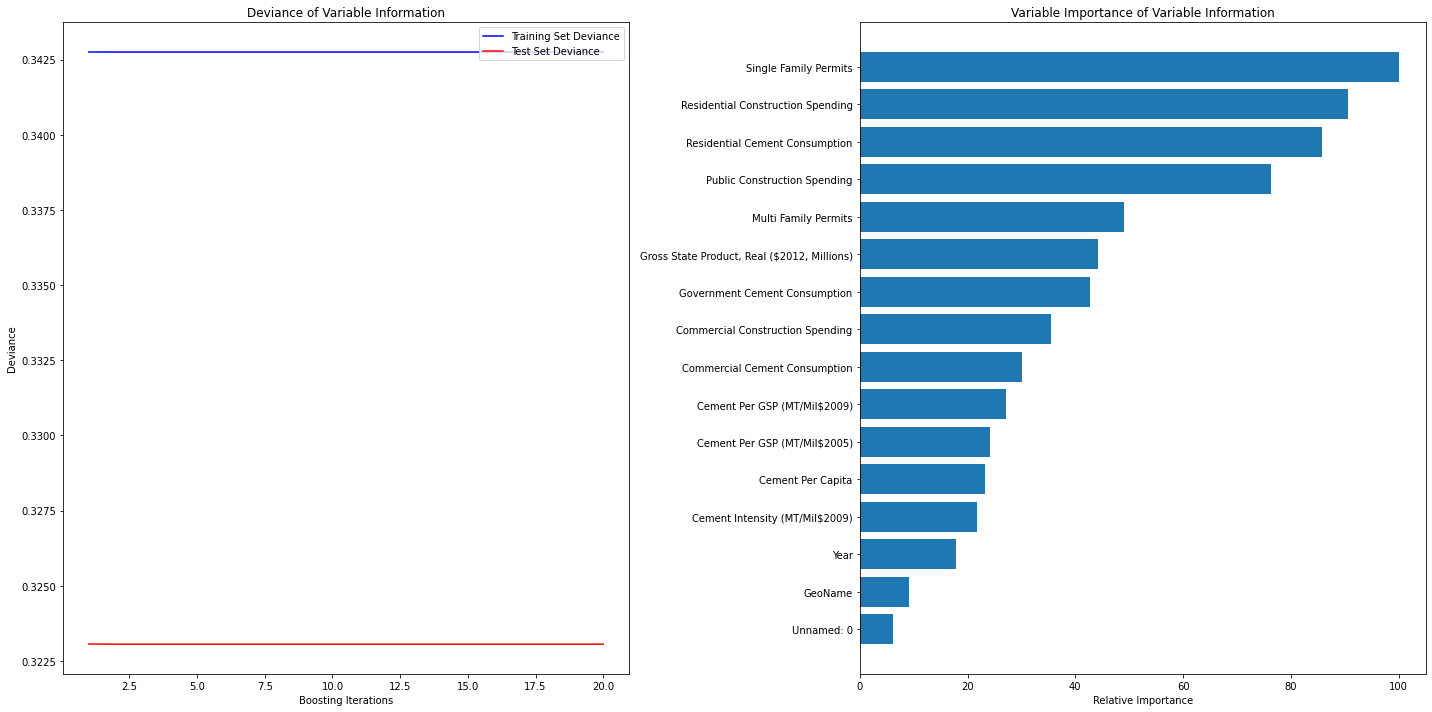

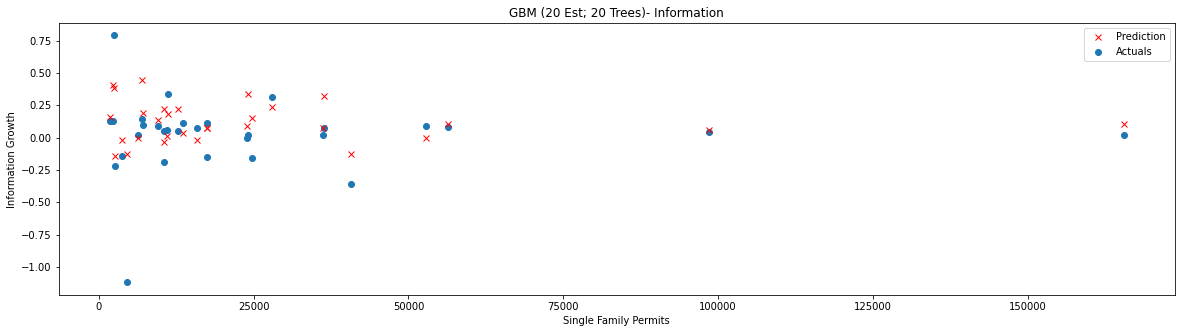

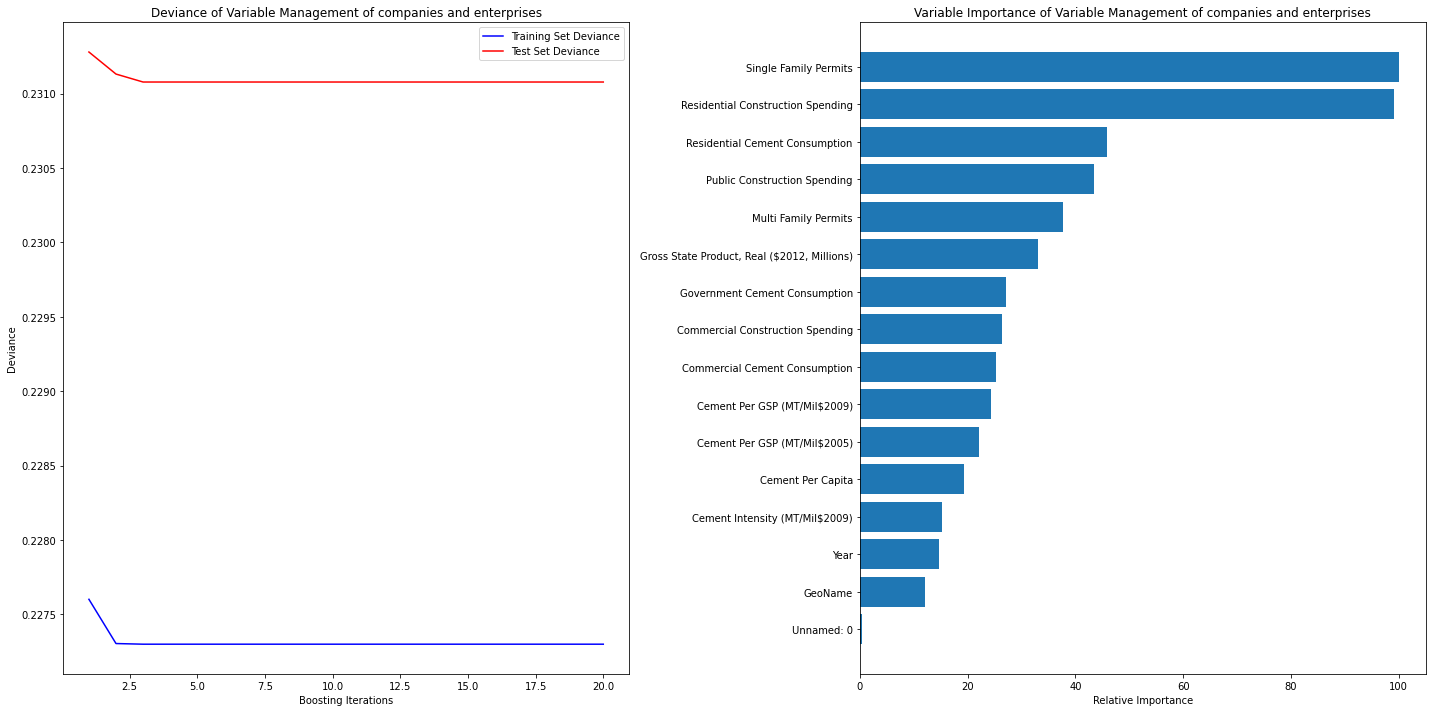

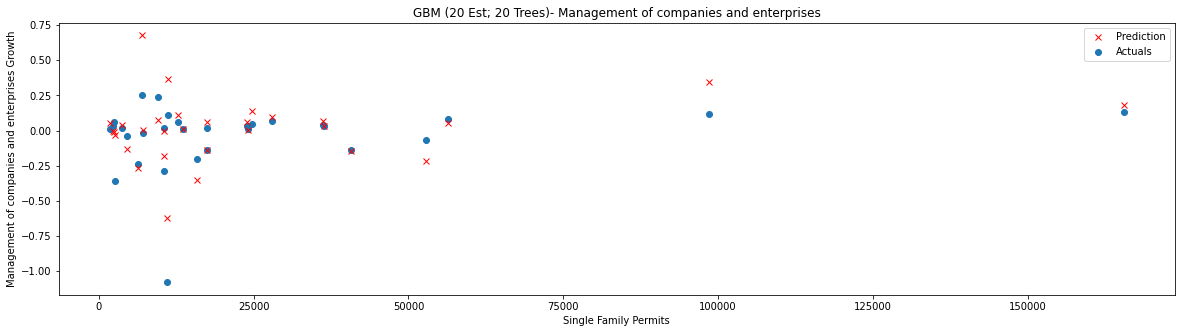

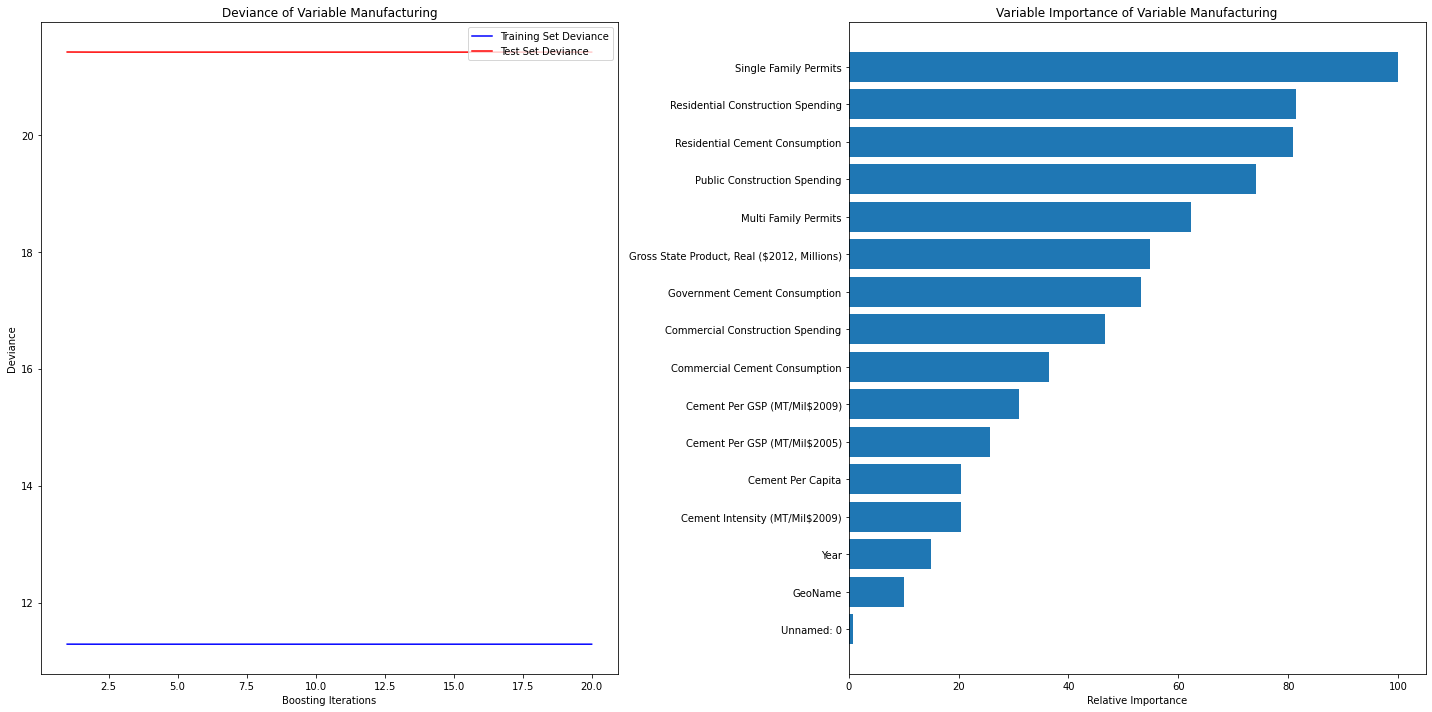

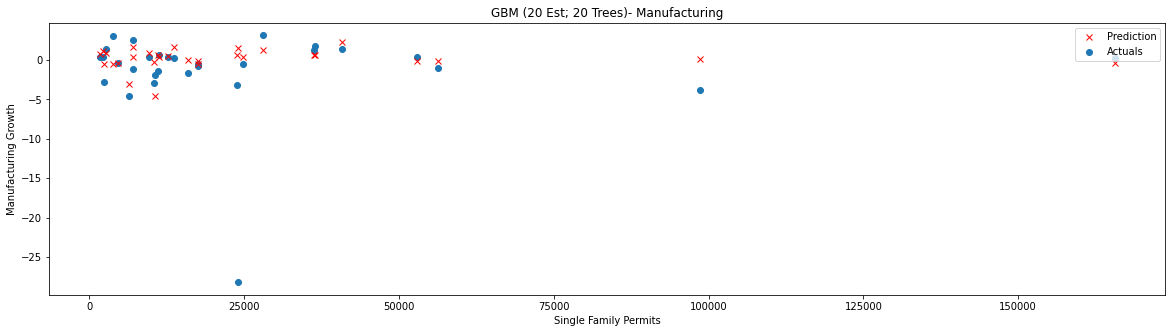

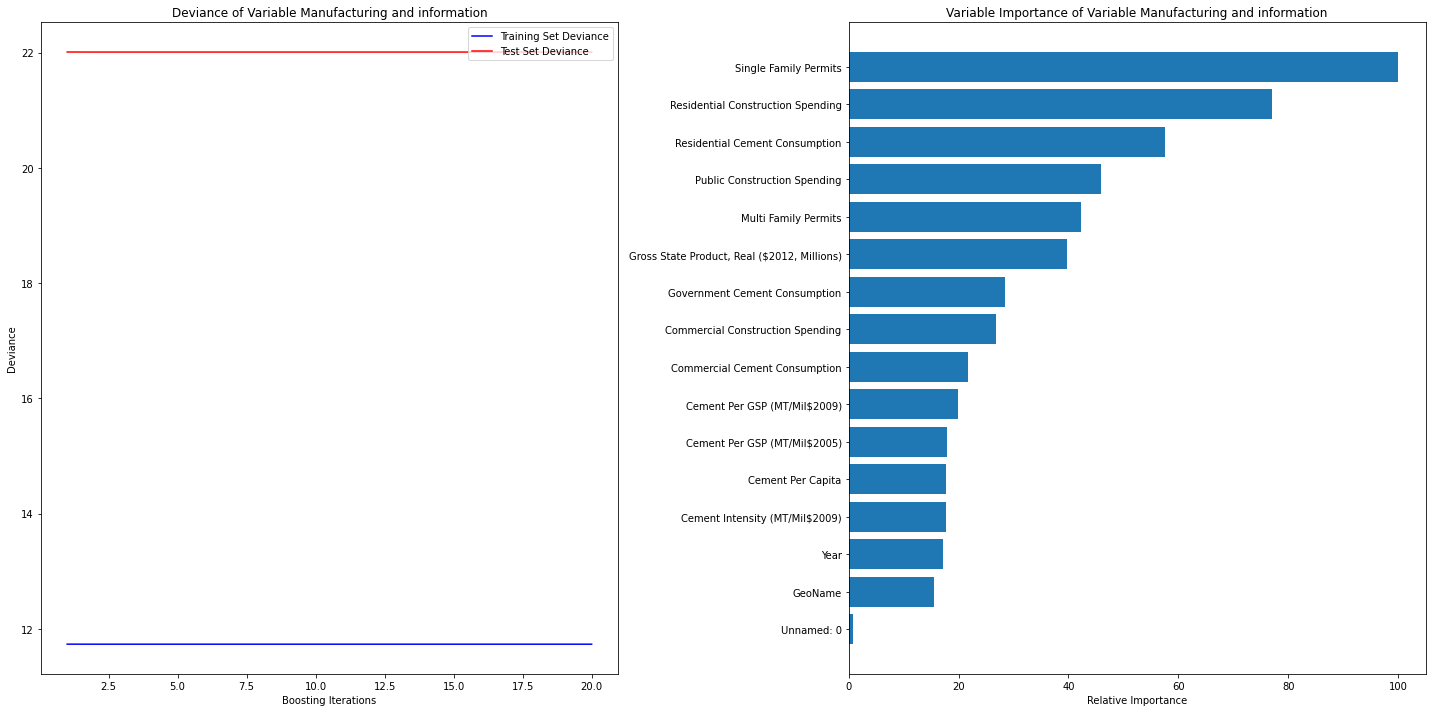

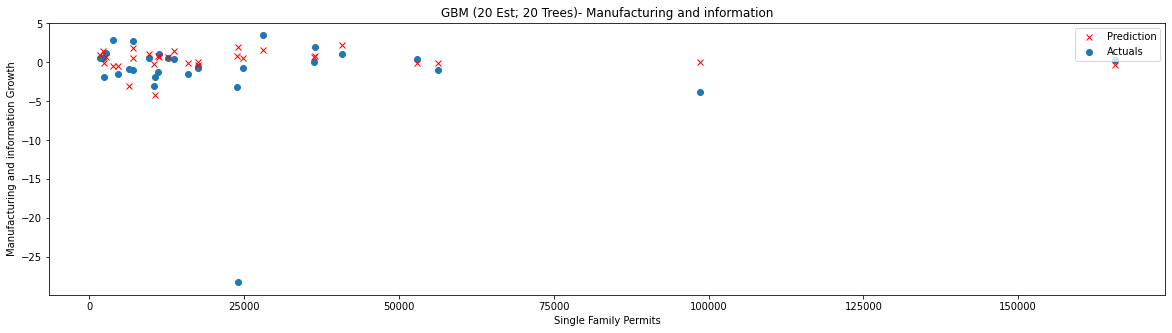

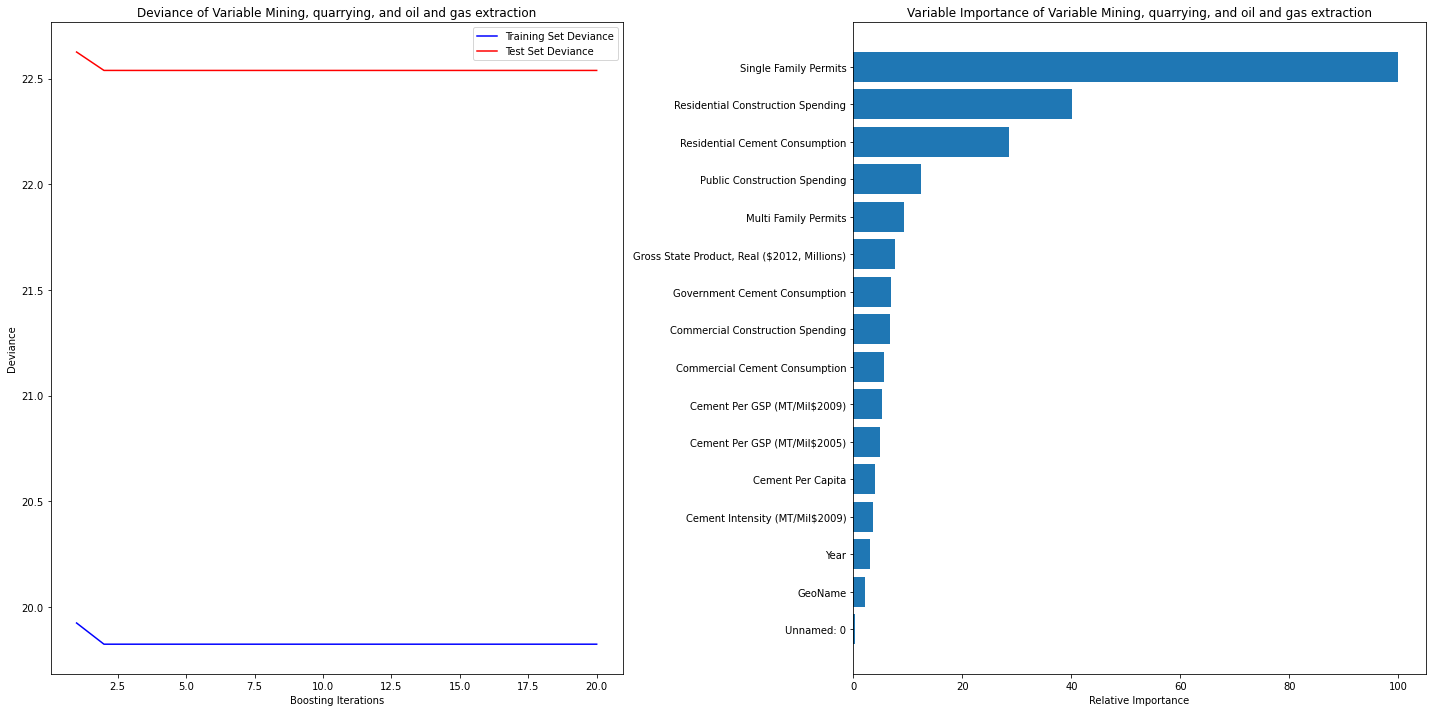

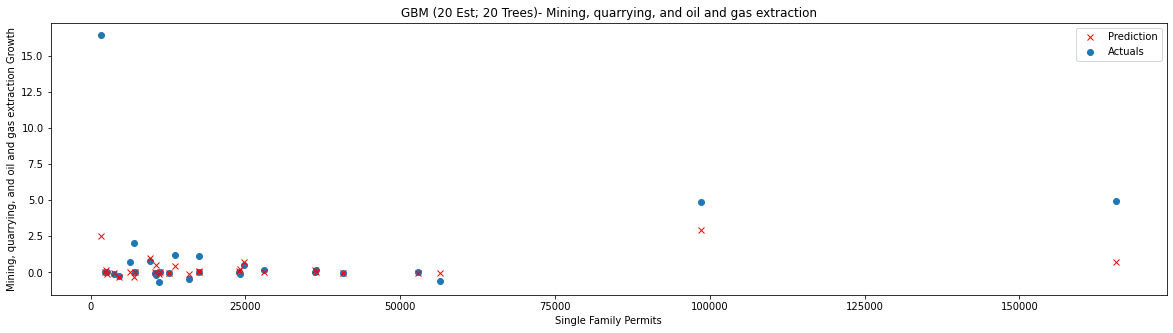

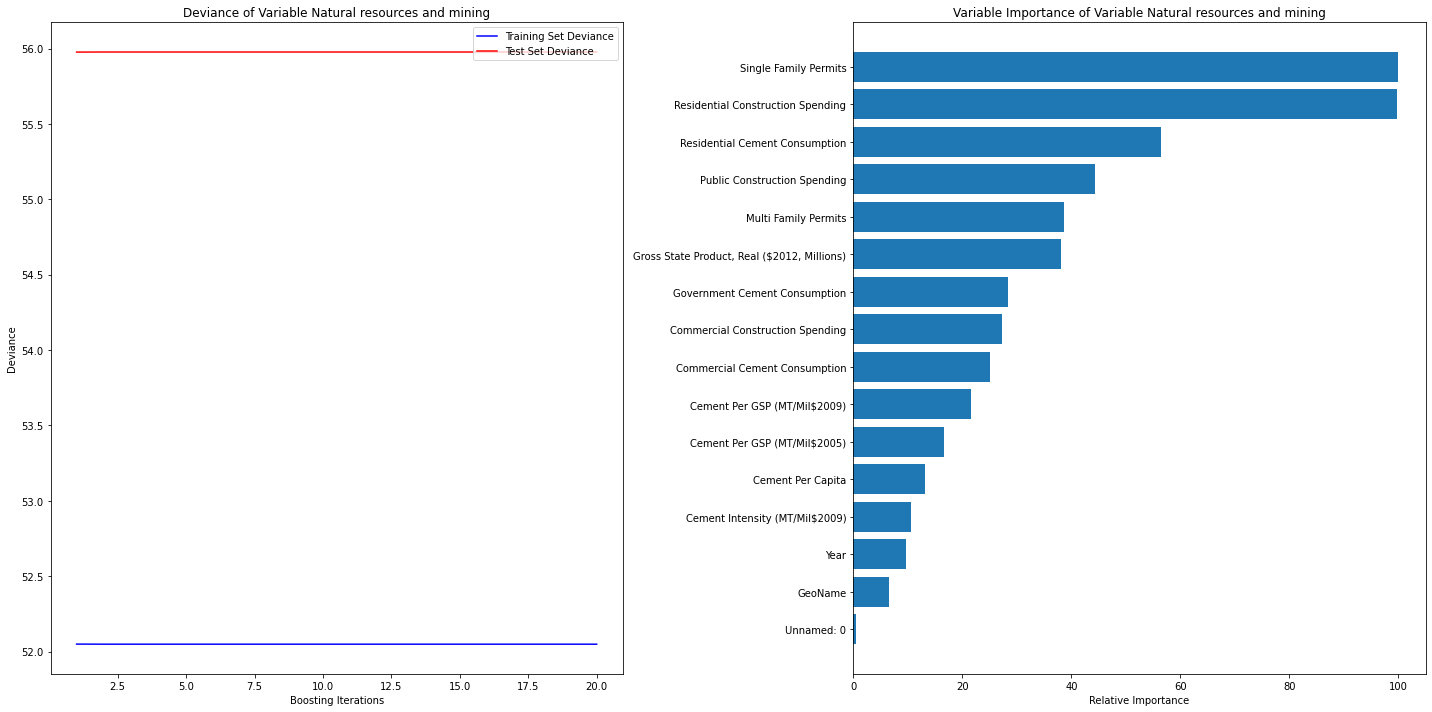

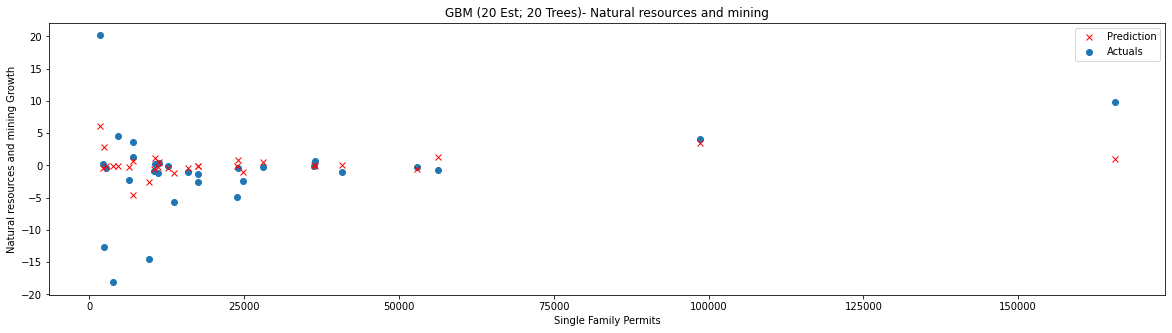

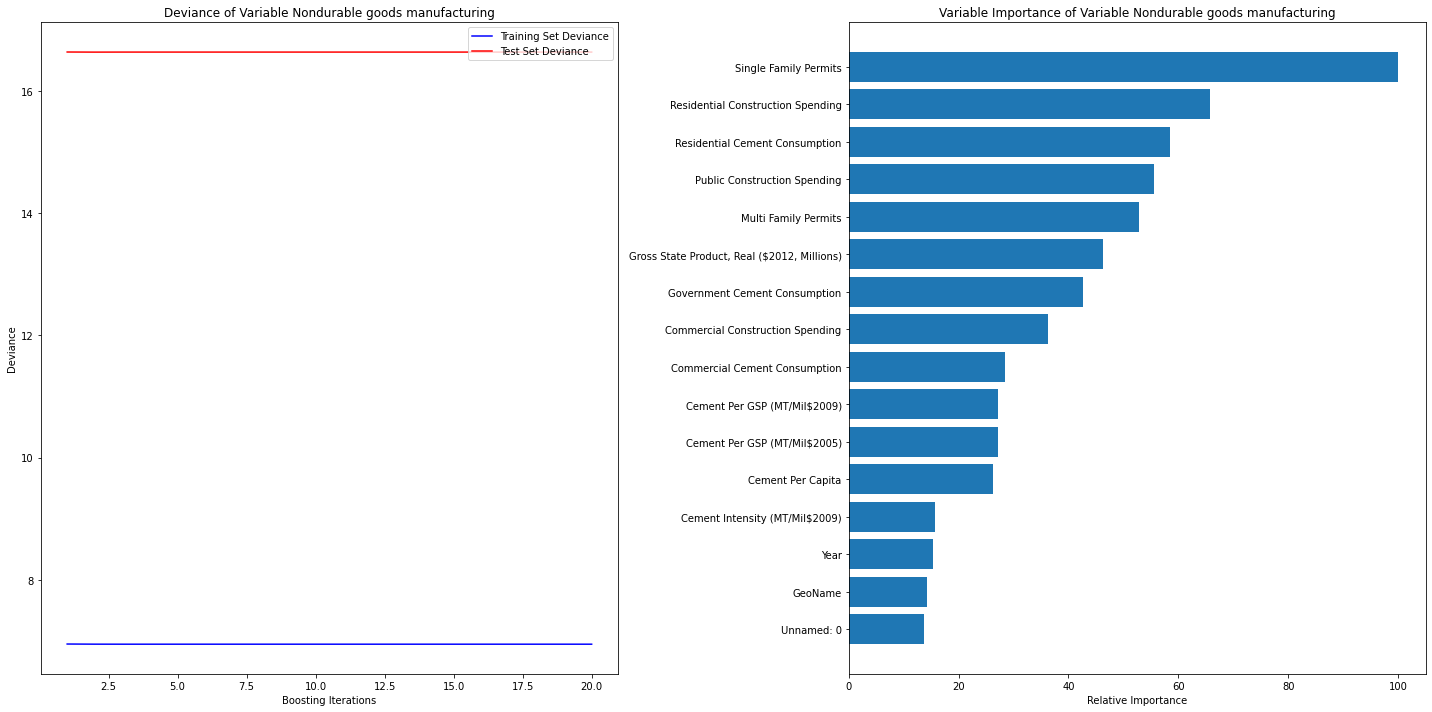

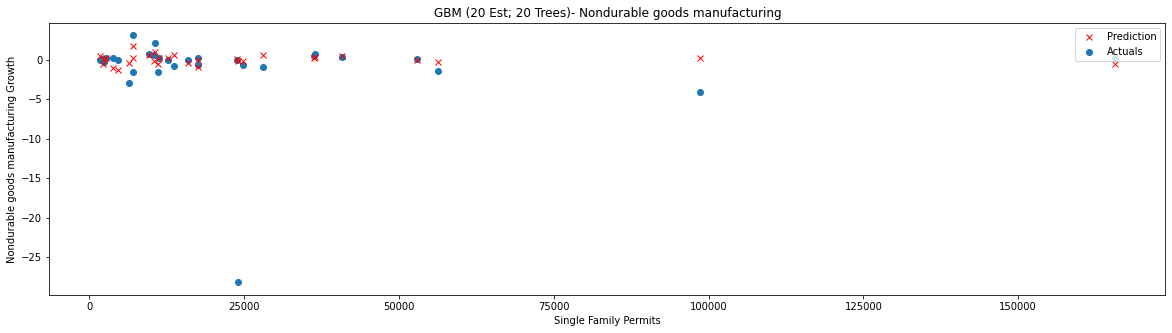

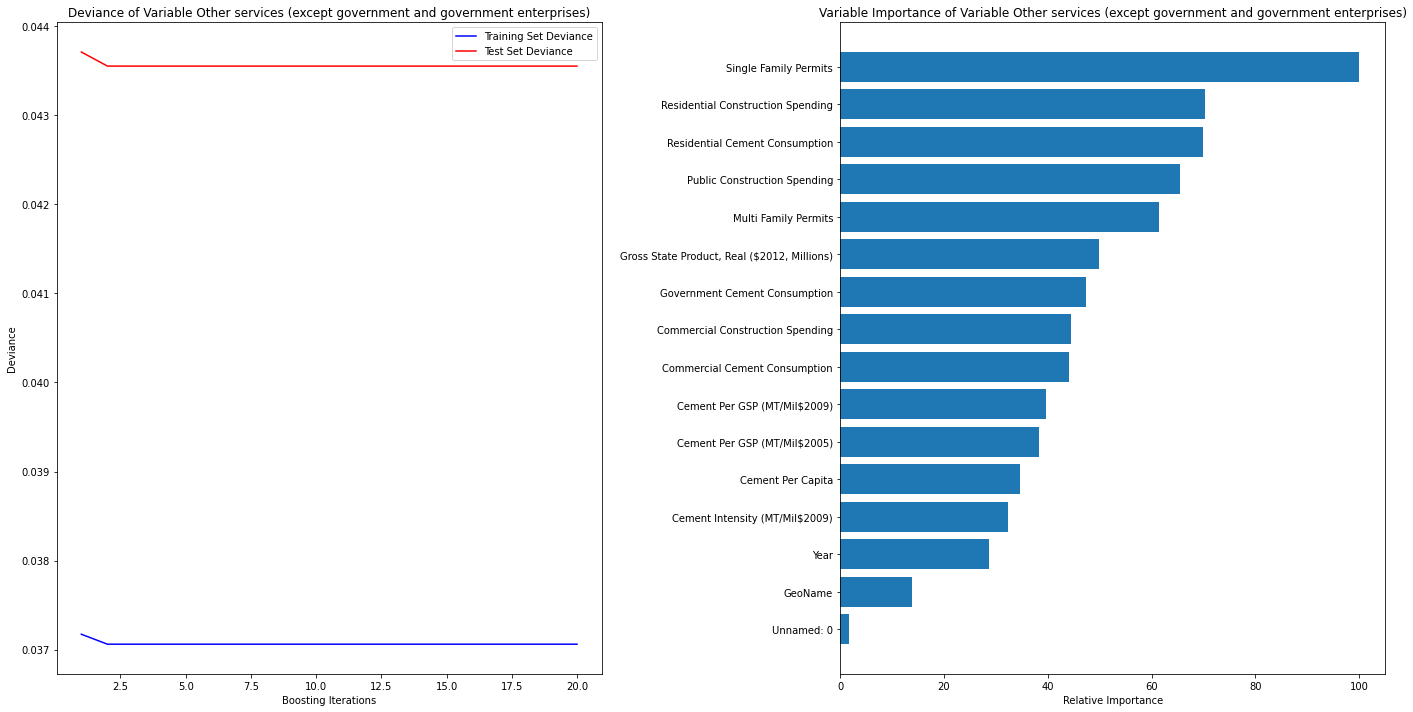

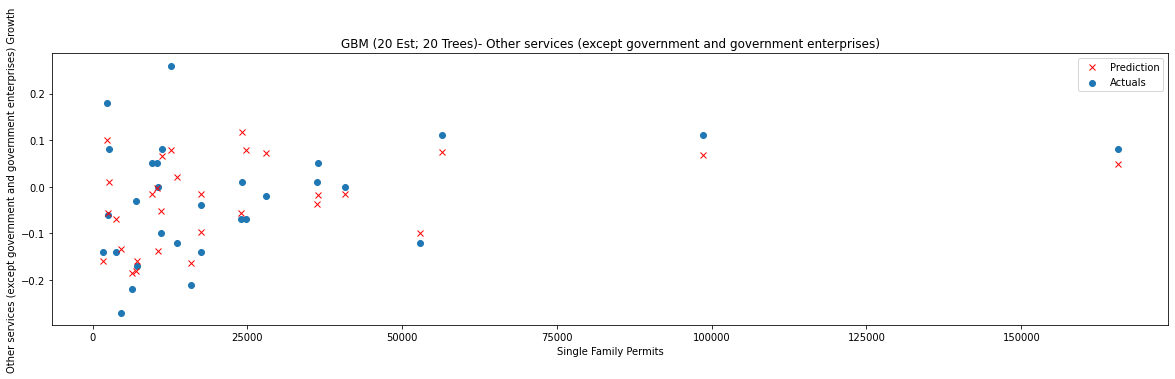

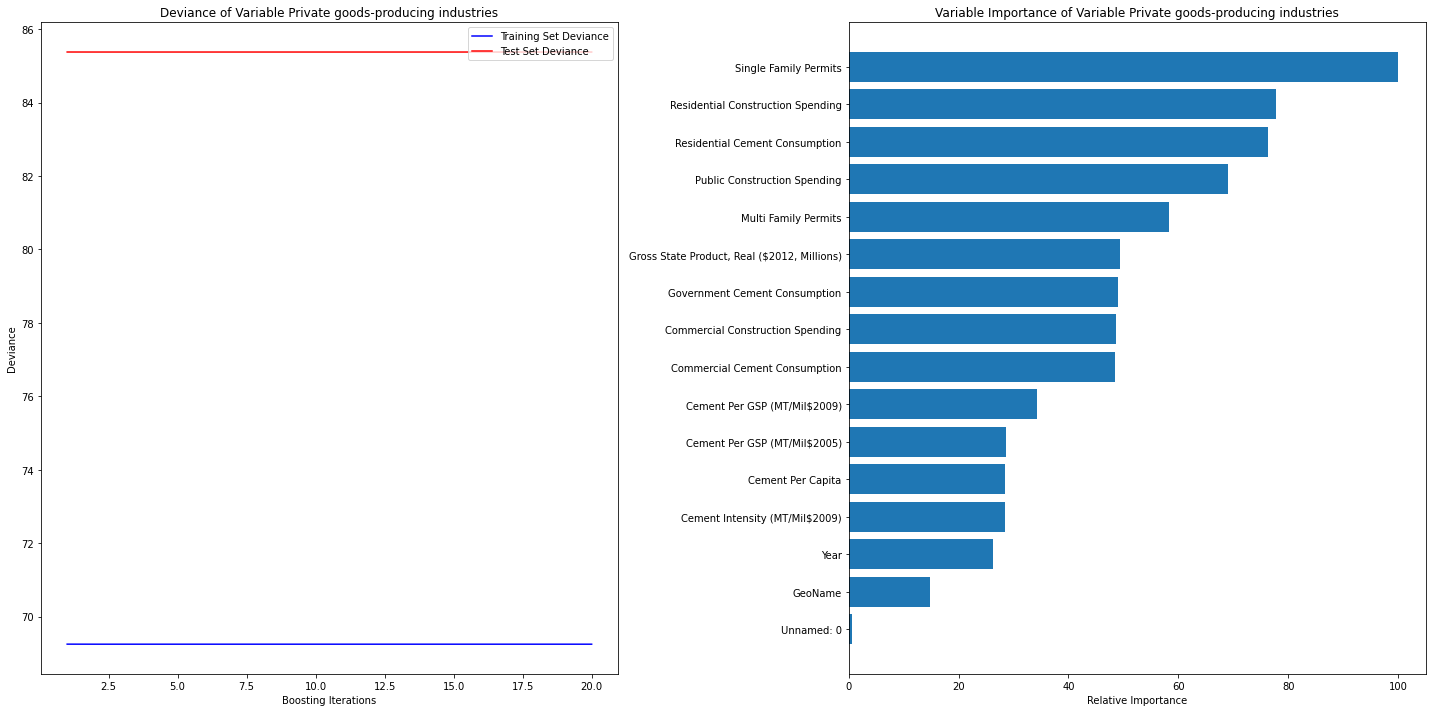

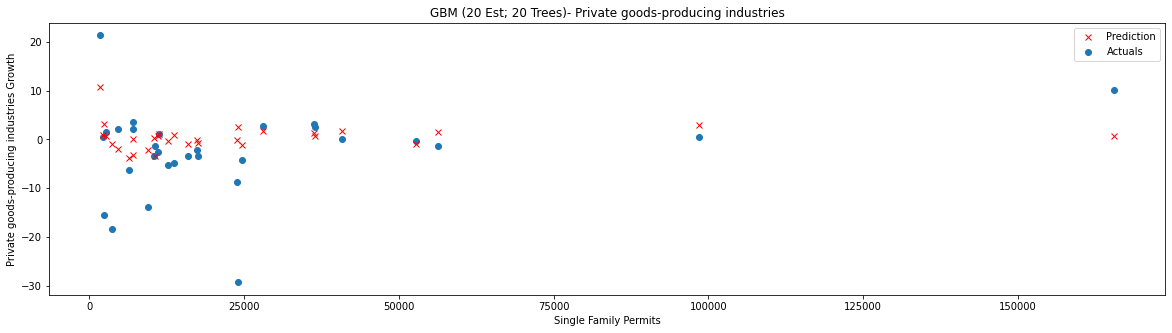

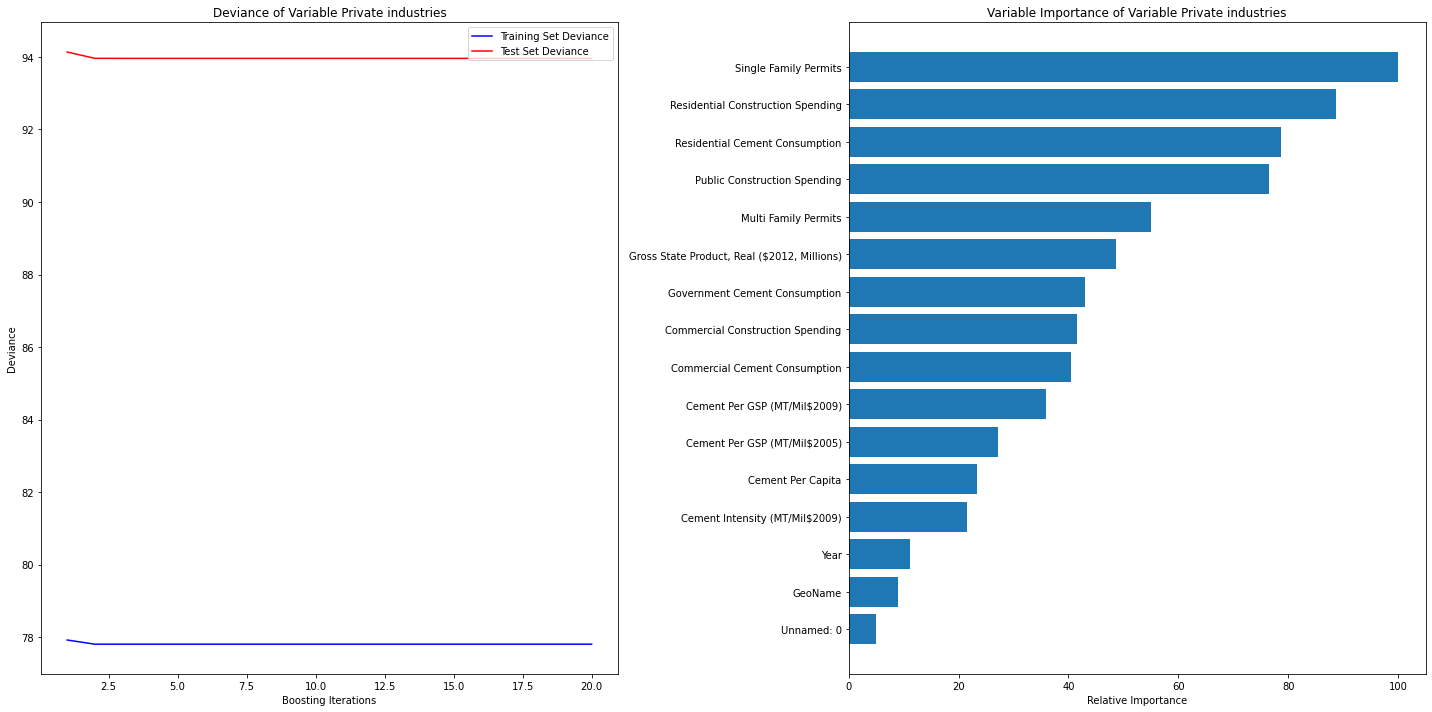

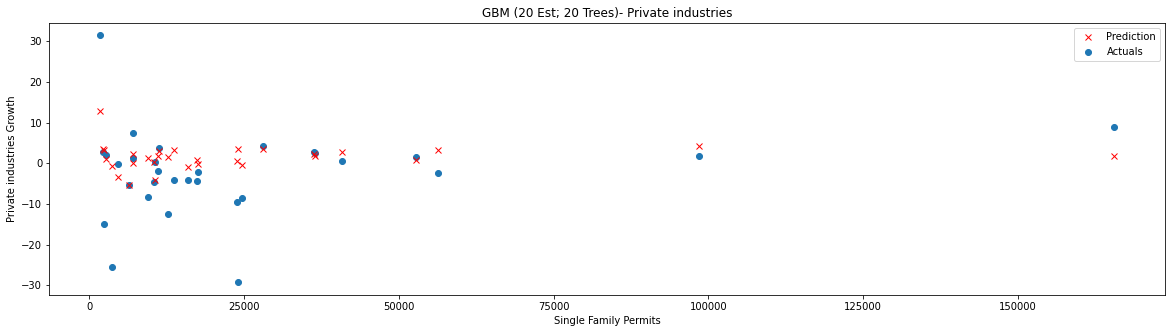

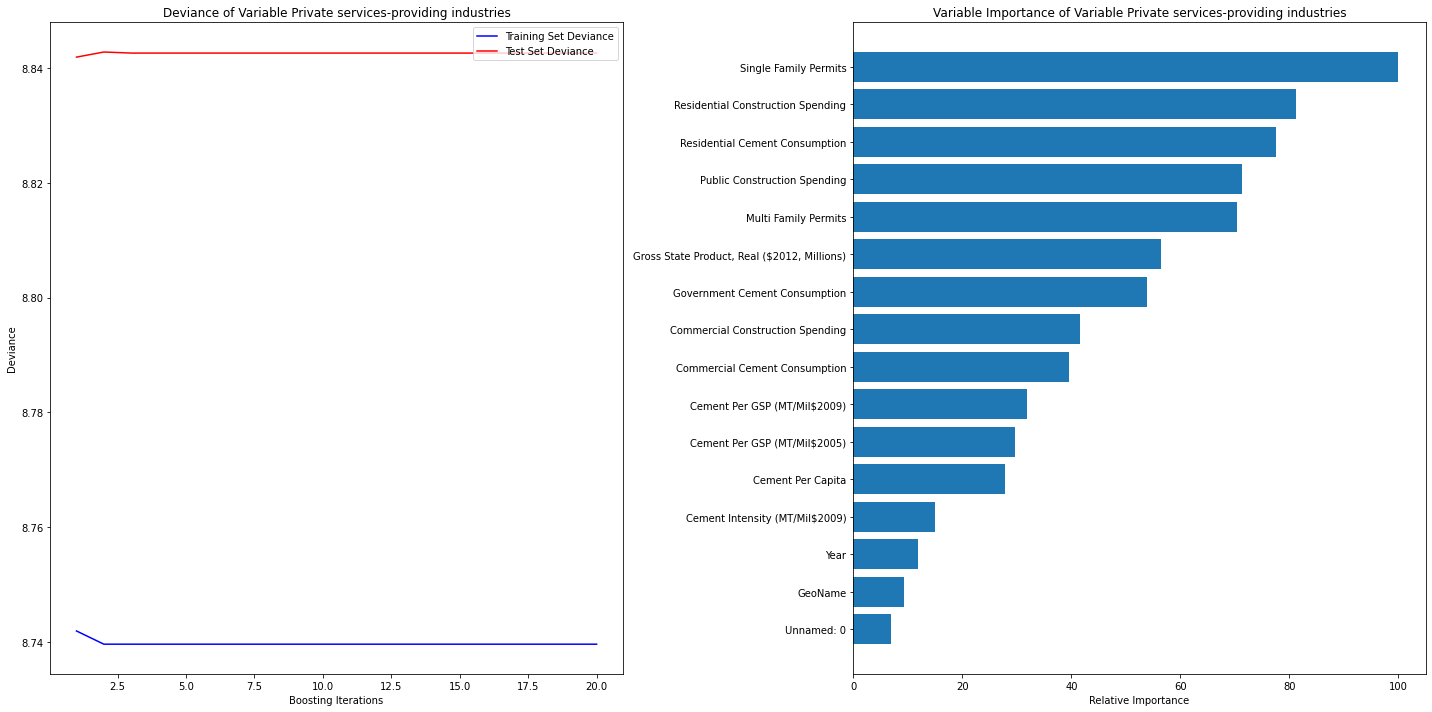

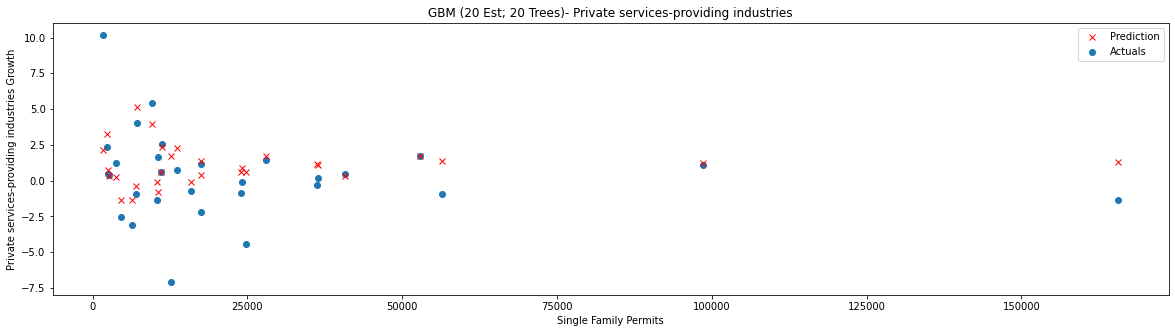

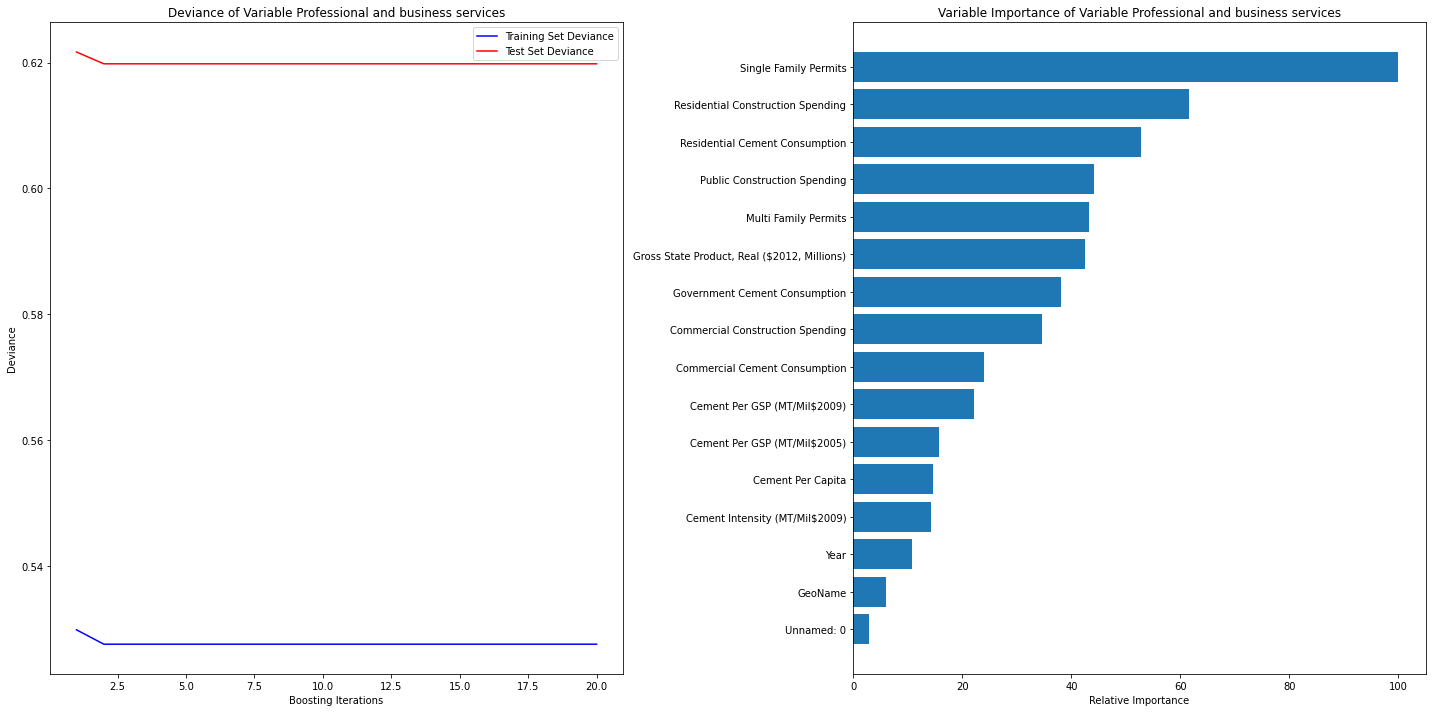

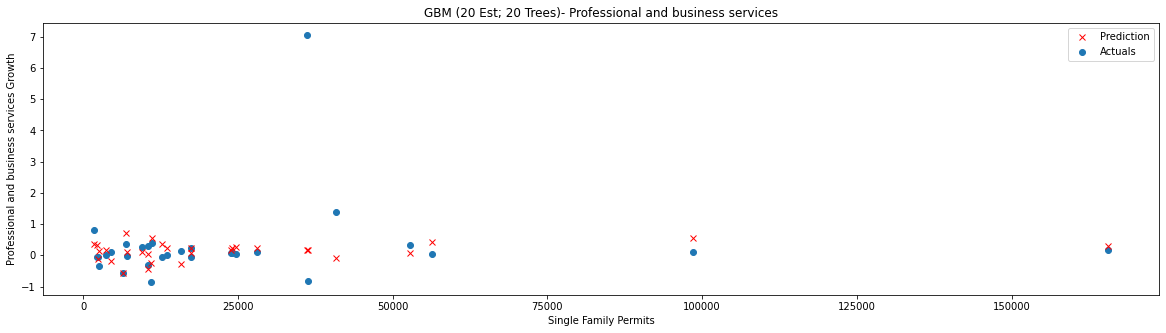

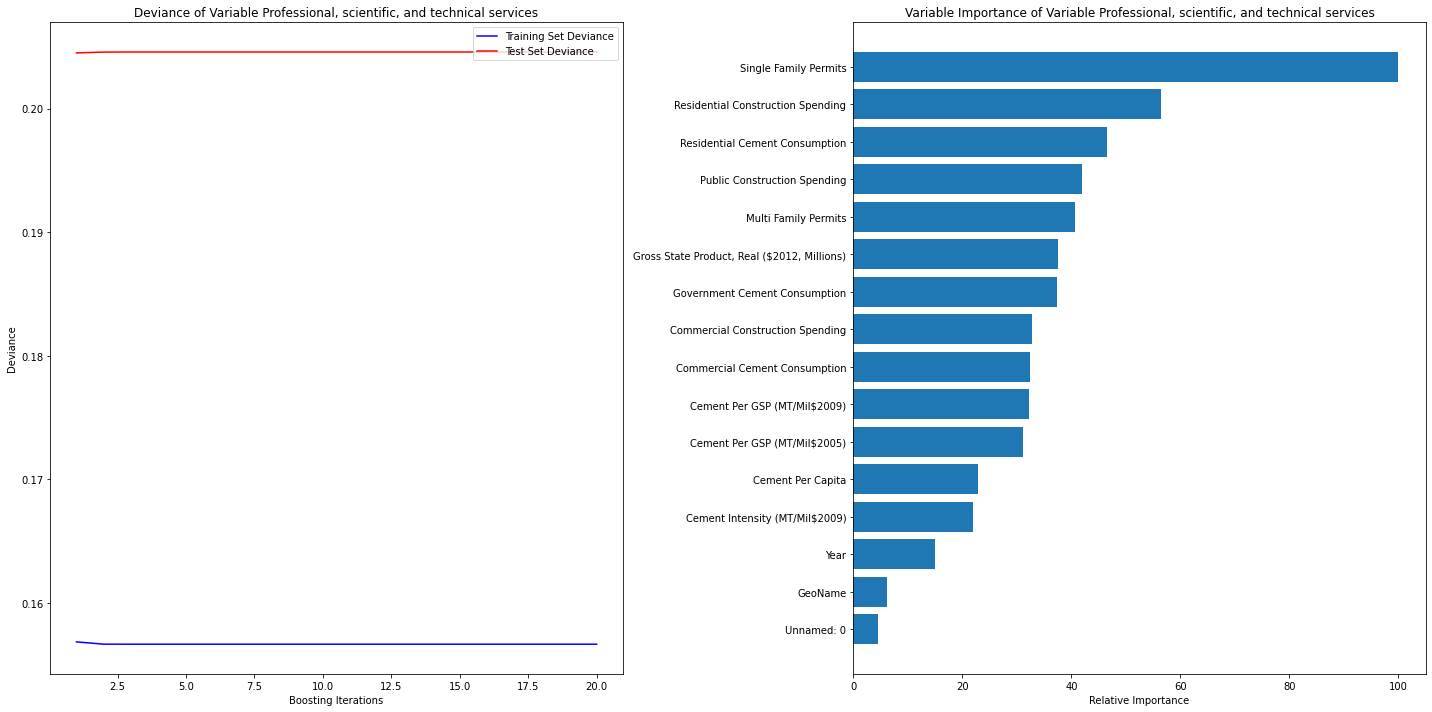

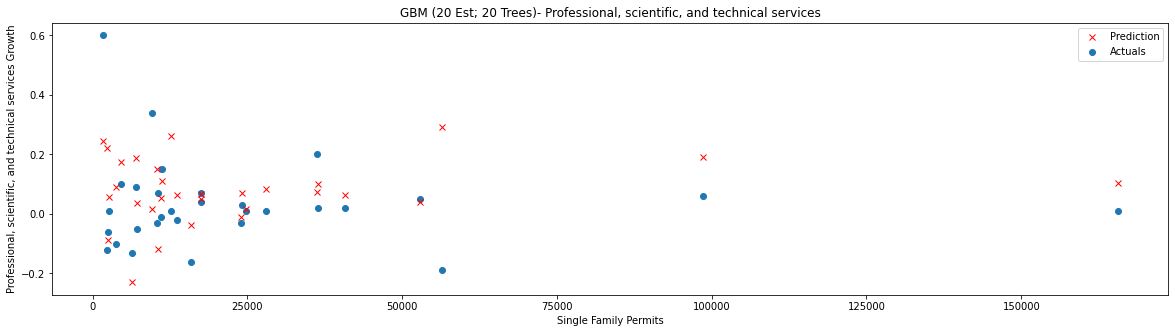

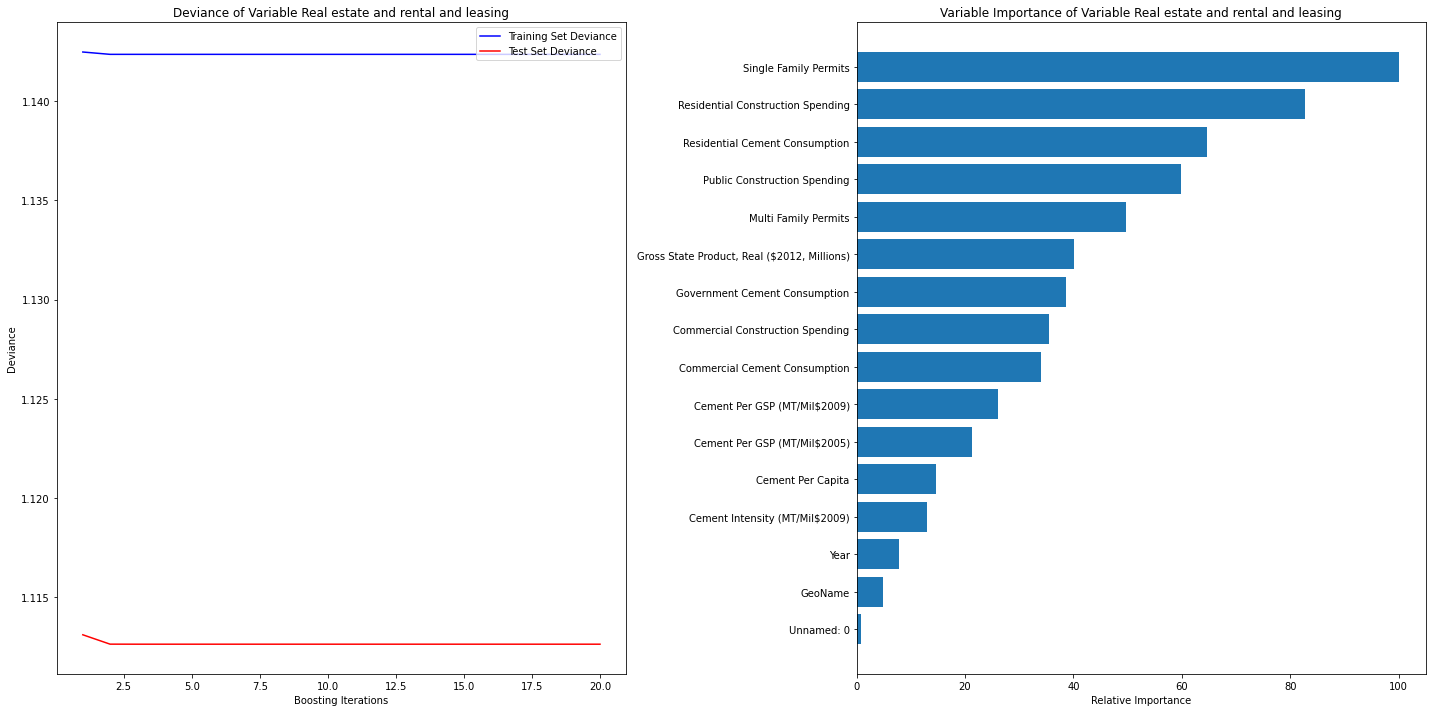

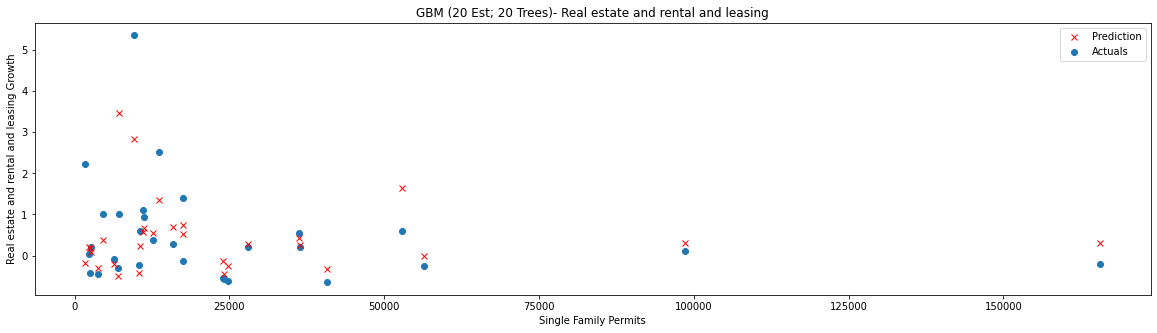

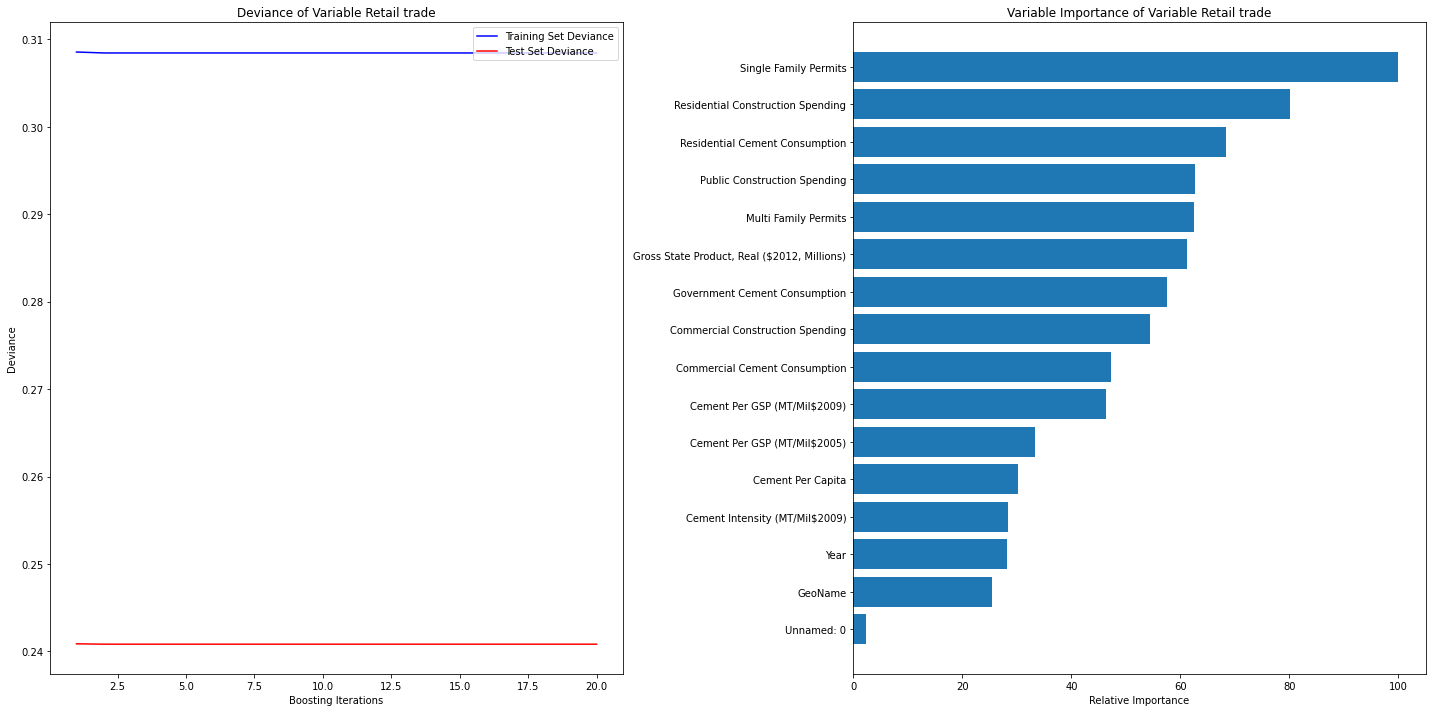

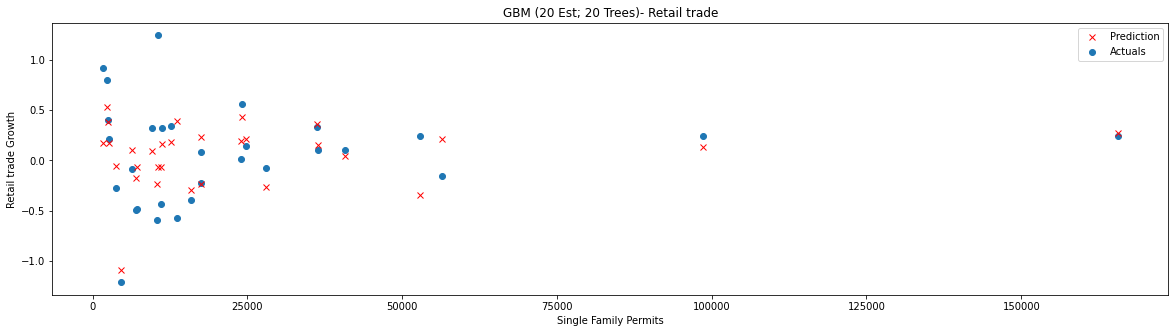

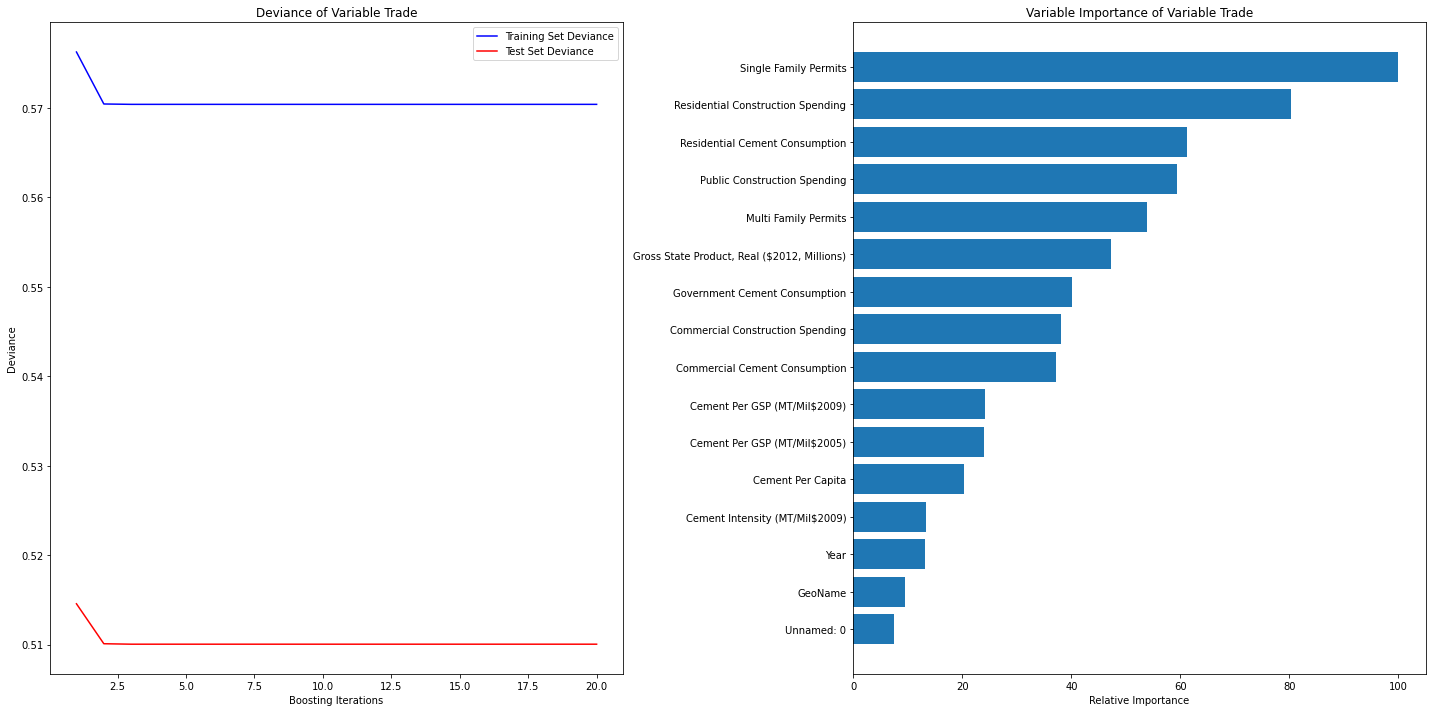

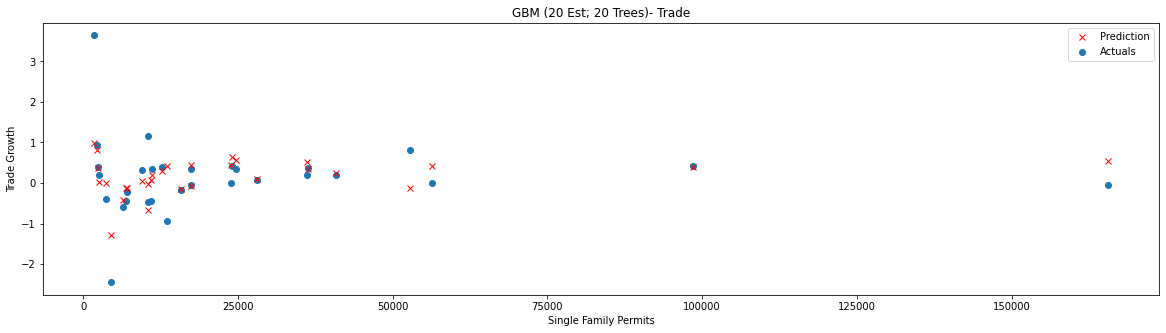

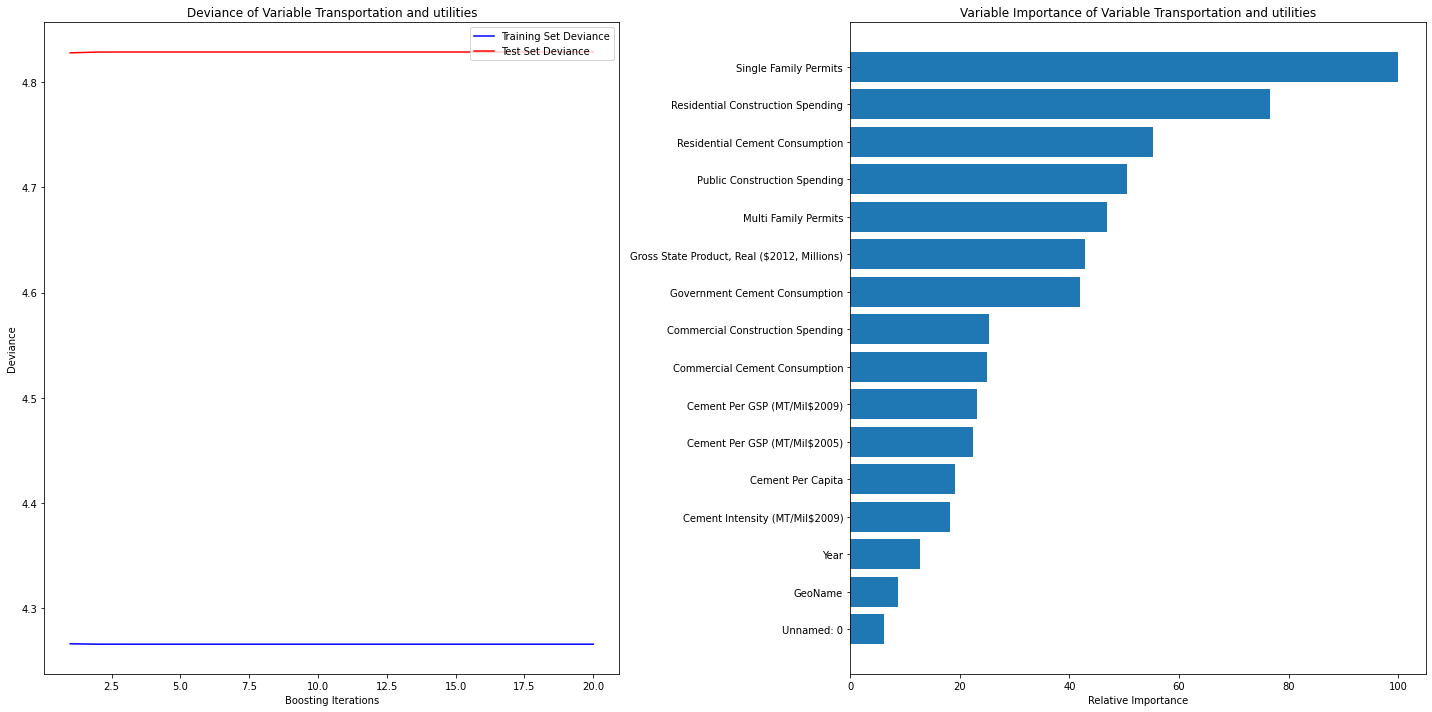

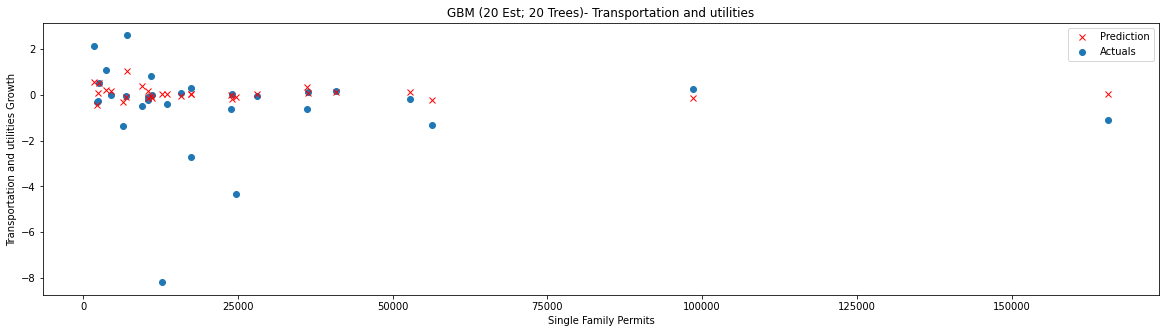

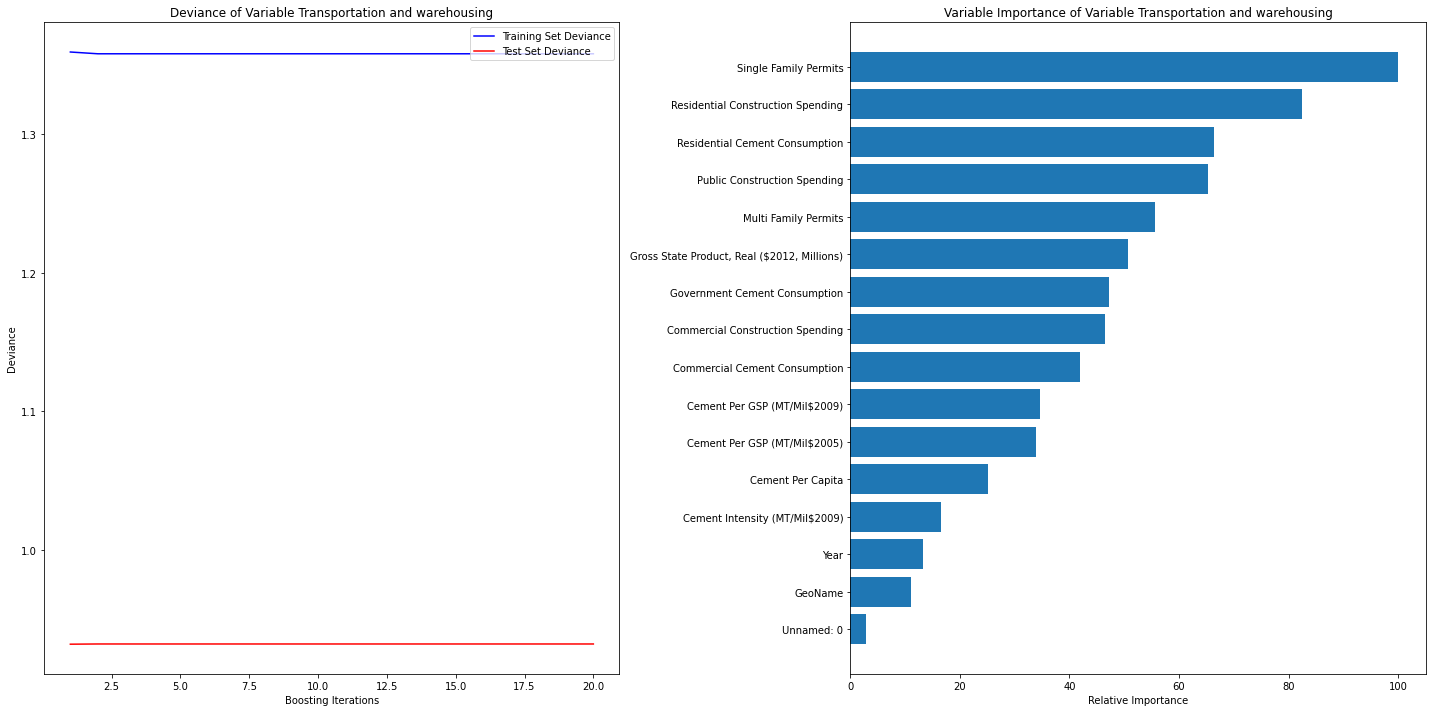

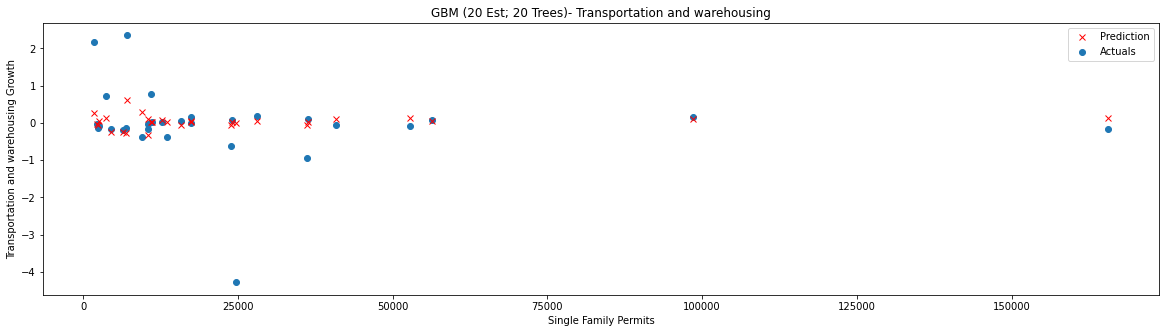

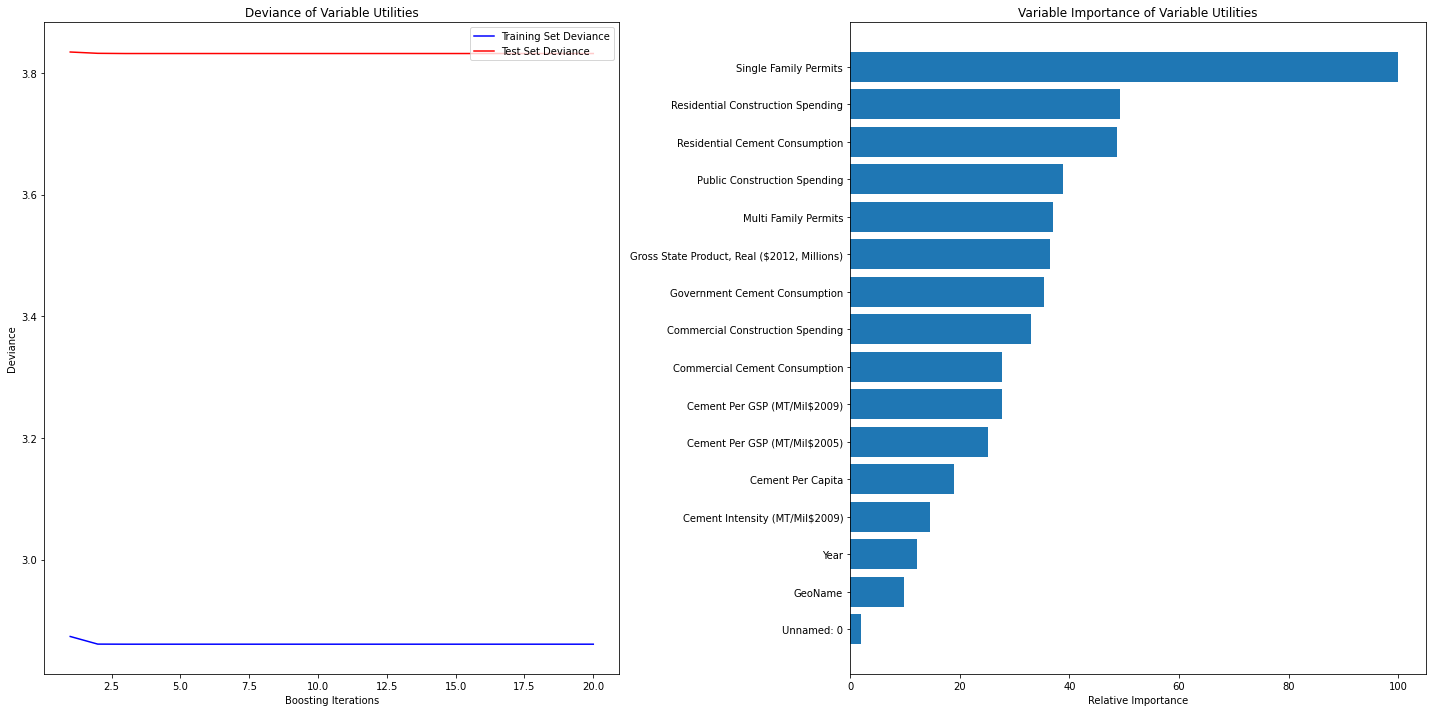

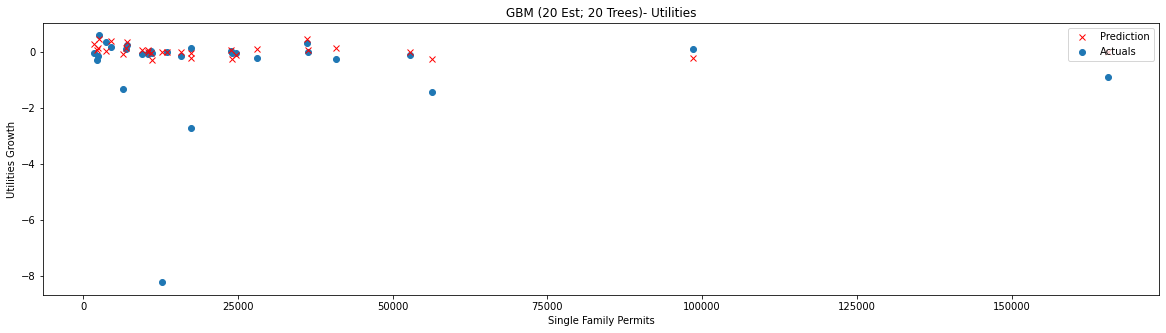

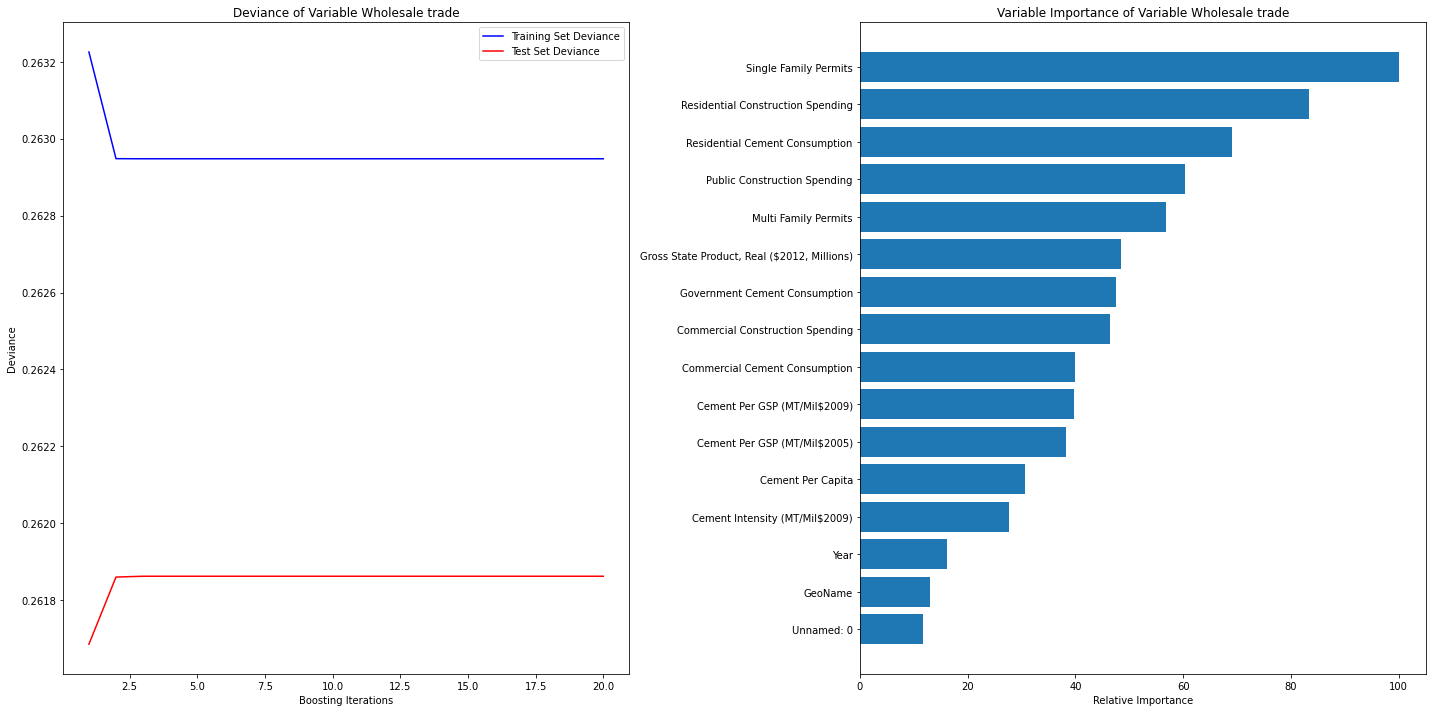

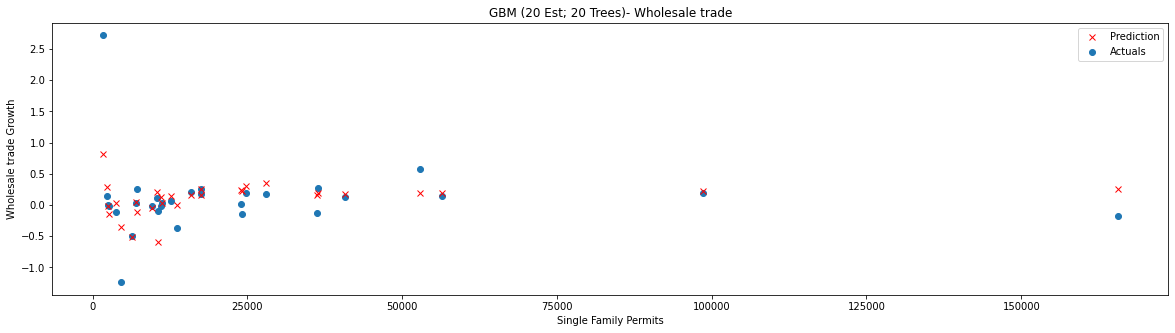

In [19]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#var=['Cement Per Capita','Commercial Construction Spending',"Unemployment Rate (%)",'Gross State Product, Real ($2012, Millions)','Transportation and utilities','Transportation and warehousing',]

#label="Construction"
os.chdir(grad_boost_img) ###CHANGE DIRECTORY OF IMAGES
########################################
params = {
    'n_estimators': 20,
    'max_depth': 20,
    'learning_rate': 1,
    'criterion': 'mse'}
#########################################
var=var_pca
df_pred_grad_boost=pd.DataFrame()
for label in var_bed:
  df_train_var=df_train[var]
  df_train_label=df_train[label]
  df_val_var=df_val[var]
  df_val_label=df_val[label]
  
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(df_train_var, df_train_label)
  # compute test set deviance
  test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

  for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
      test_score[i] = clf.loss_(df_val_label, y_pred)

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title('Deviance of Variable {}'.format(label))
  plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
  plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
  plt.legend(loc='upper right')
  plt.xlabel('Boosting Iterations')
  plt.ylabel('Deviance')
  #axes=plt.gca()
  #axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
  feature_importance = clf.feature_importances_
# make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, df_final.columns)
  plt.xlabel('Relative Importance')
  plt.title('Variable Importance of Variable {}'.format(label))
  plt.tight_layout()

  plt.savefig("Gradient_boost_{}.png".format(label))
  plt.show()

  #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('GBM (20 Est; 20 Trees)- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train_label[0:30],label="Actuals")
  plt.plot(df_train[plt_var][0:30], clf.predict(df_train_var[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Gradient_boost_predictions_{}.png".format(label))
  plt.show()
  df_pred_grad_boost=pd.concat([df_pred_grad_boost,pd.DataFrame(clf.predict(df_pca_test))],axis=1)
  

In [0]:
os.chdir(base_dir)
df_pred_grad_boost.to_csv("df_pred_gb.csv")

In [80]:
df_pred_grad_boost

0         0         0  ...         0         0         0
0     0.152768  0.055593  4.514603  ...  0.029079  0.355107  0.201974
1     0.005789  0.004474  2.884868  ...  0.029079  0.355107  0.201974
2    -0.019176  0.077647 -0.660824  ...  0.505529  0.210724  0.102118
3     0.033529  0.028588  5.641647  ...  0.642706  0.405312  0.160000
4    -0.034750  0.058625 -1.979250  ...  0.204750  0.225482  0.294250
...        ...       ...       ...  ...       ...       ...       ...
1243  0.042670  0.153416 -0.133267  ...  0.104486 -0.229206  0.224252
1244  0.042670  0.153416 -0.133267  ...  0.104486 -0.229206  0.224252
1245  0.042670  0.144709 -0.133267  ...  0.104486  0.978756  0.224252
1246  0.042670  0.144709  1.612750  ...  0.104486  0.978756  0.224252
1247 -0.057321  0.153416  1.612750  ...  0.104486  0.978756  0.224252

[1248 rows x 34 columns]

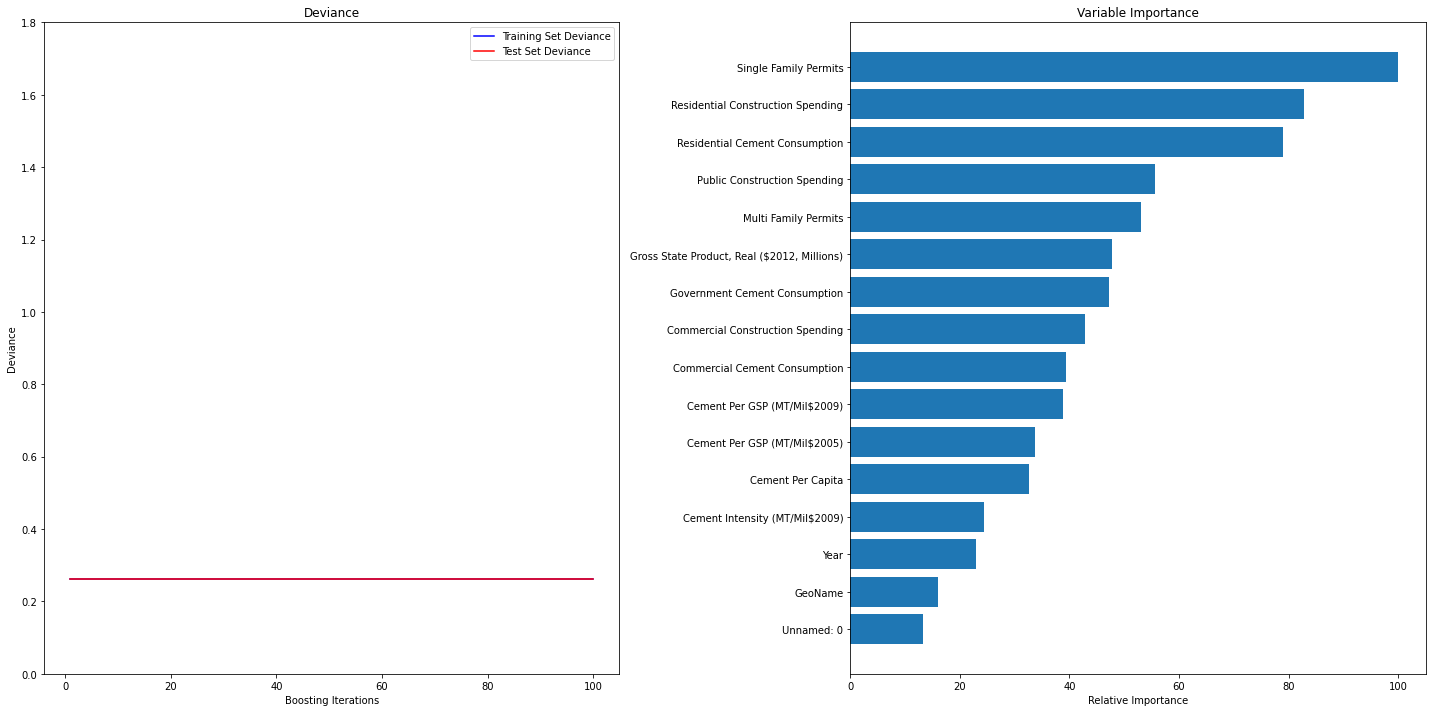

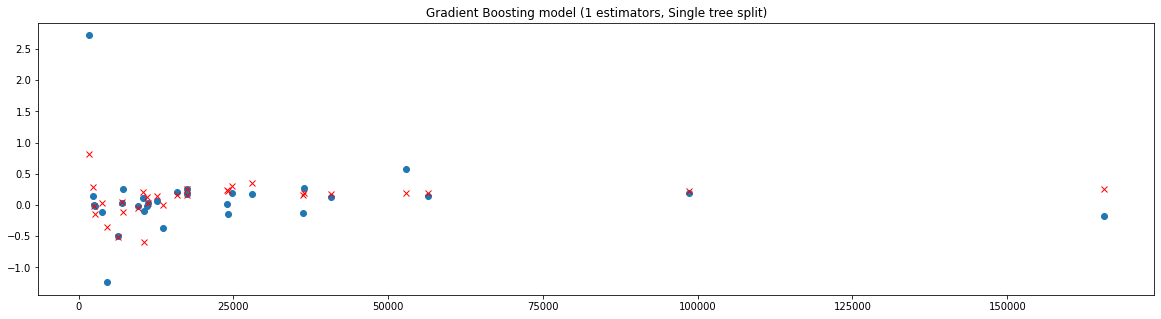

In [0]:

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
    test_score[i] = clf.loss_(df_val_label, y_pred)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
axes=plt.gca()
axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_final.columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.tight_layout()

plt.savefig("Gradient_boost.png")

#'Single Family Permits', 
#'Total Construction Spending',
plt_var='Single Family Permits'
plt.figure(figsize=(20, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(df_train_var[plt_var][0:30], df_train_label[0:30],label="Actuals")
plt.plot(df_train_var[plt_var][0:30], clf.predict(df_train_var[0:30]),'x',color='r',label="Prediction")
plt.show()
plt.show()



In [33]:
mean_squared_error(df_val_label,clf.predict(df_val_var))

3.8699333356105283

Year  ...  Wholesale trade
count  50609.000000  ...     50609.000000
mean    2010.000000  ...         0.106969
std        4.899028  ...         0.549507
min     2002.000000  ...        -9.820000
25%     2006.000000  ...        -0.070000
50%     2010.000000  ...         0.070000
75%     2014.000000  ...         0.280000
max     2018.000000  ...        16.420000

[8 rows x 51 columns]

(array([4.0000e+00, 2.1000e+01, 1.2764e+04, 3.7782e+04, 2.6000e+01,
        8.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-34.78 , -23.309, -11.838,  -0.367,  11.104,  22.575,  34.046,
         45.517,  56.988,  68.459,  79.93 ]),
 <a list of 10 Patch objects>)

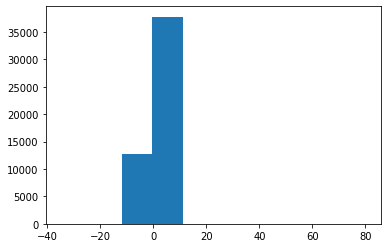

In [0]:
plt.hist(df_final[label])

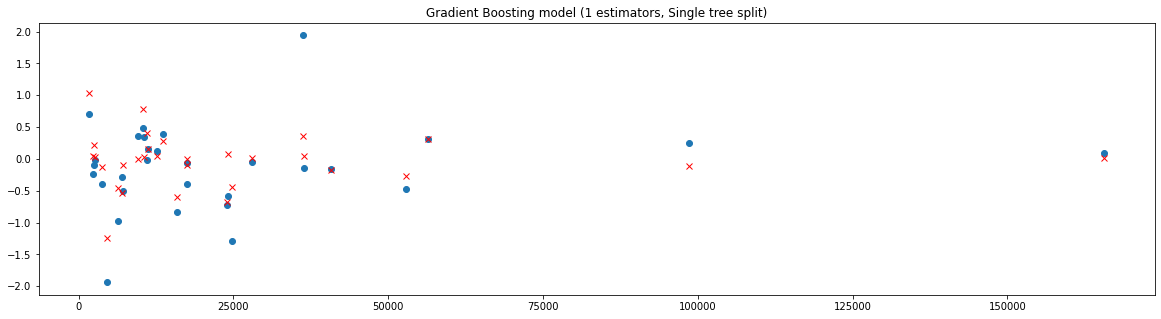

In [0]:

#'Single Family Permits', 
#'Total Construction Spending',
plt_var='Single Family Permits'
plt.figure(figsize=(20, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(df_train_var[plt_var][0:30], df_train_label[0:30],label="Actuals")
plt.plot(df_train_var[plt_var][0:30], clf.predict(df_train_var[0:30]),'x',color='r',label="Prediction")
plt.show()

In [0]:
###########################APPLY GRADIENT BOOSTING PREDICTIONS
results=clf.predict(df_pca_test)
list(results)[1:10]

['Accommodation and food services',
 'Administrative and support and waste management and remediation services',
 'Agriculture, forestry, fishing and hunting',
 'All industry total (percent change)',
 'Arts, entertainment, and recreation',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Construction',
 'Durable goods manufacturing',
 'Educational services',
 'Educational services, health care, and social assistance',
 'Finance and insurance',
 'Finance, insurance, real estate, rental, and leasing',
 'Government and government enterprises',
 'Health care and social assistance',
 'Information',
 'Management of companies and enterprises',
 'Manufacturing',
 'Manufacturing and information',
 'Mining, quarrying, and oil and gas extraction',
 'Natural resources and mining',
 'Nondurable goods manufacturing',
 'Other services (except government and government enterprises)',
 'Private goods-producing industries',
 'Private industries',
 'Private services-providing indus

In [0]:

"""for label in var_bed:
  df_train_var=df_train[var]
  df_train_label=df_train[label]
  df_val_var=df_val[var]
  df_val_label=df_val[label]"""


df_train_label=df_train[label]
df_val_label=df_val[label]
df_train_array=np.array(df_train[var_pca])
df_val_array=np.array(df_val[var_pca])
df_pca_test_array=np.array(df_pca_test)

dt=tf.expand_dims(df_train_array,axis=-1)
dv=tf.expand_dims(df_val_array,axis=-1)

dtest=tf.expand_dims(df_pca_test_array,axis=-1)

In [55]:
np.array(df_pca_test*1)

array([['169.87582278722917', 0.5788051486078475, 5.290178716942352, ...,
        9989.973688754844, 1697055.0, 0.033321297747544165],
       ['169.79112707630682', 0.5912984669876463, 5.290178716942352, ...,
        10218.484492539235, 1735007.9989999996, 0.03993158144688618],
       ['126.99795895175322', 0.5699526059124208, 5.290178716942352, ...,
        13203.361879516662, 1676800.0100000002, 0.04492284735547716],
       ...,
       ['133.5651889436888', 0.5630825835446278, 3.2511551833513974, ...,
        128062.43216980466, 17104682.94934829, 0.0420607137718497],
       ['133.44312956064525', 0.5643265268844195, 3.2511551833513974,
        ..., 130344.06070143108, 17393519.379641674, 0.04097503951414832],
       ['132.86554046434318', 0.5686356523198288, 3.2511551833513974,
        ..., 133857.0804069675, 17784993.33325078, 0.039875709185719935]],
      dtype=object)

Train on 40487 samples, validate on 10122 samples
Epoch 1/25
40487/40487 [==============================] - 35s 871us/sample - loss: 0.0389 - mae: 0.1568 - val_loss: 0.0354 - val_mae: 0.1531
Epoch 2/25
40487/40487 [==============================] - 32s 785us/sample - loss: 0.0389 - mae: 0.1568 - val_loss: 0.0354 - val_mae: 0.1531
Epoch 3/25
40487/40487 [==============================] - 32s 793us/sample - loss: 0.0389 - mae: 0.1568 - val_loss: 0.0354 - val_mae: 0.1531
Epoch 4/25
40487/40487 [==============================] - 31s 763us/sample - loss: 0.0389 - mae: 0.1568 - val_loss: 0.0354 - val_mae: 0.1531
Epoch 5/25
40487/40487 [==============================] - 31s 766us/sample - loss: 0.0389 - mae: 0.1568 - val_loss: 0.0354 - val_mae: 0.1531
Epoch 6/25
40487/40487 [==============================] - 28s 698us/sample - loss: 0.0389 - mae: 0.1568 - val_loss: 0.0354 - val_mae: 0.1531
Epoch 7/25
40487/40487 [==============================] - 29s 710us/sample - loss: 0.0389 - mae: 0.1568 

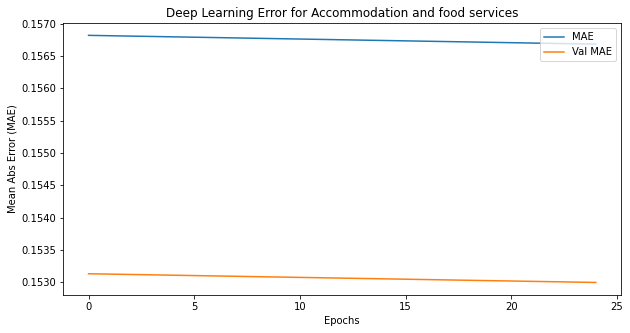

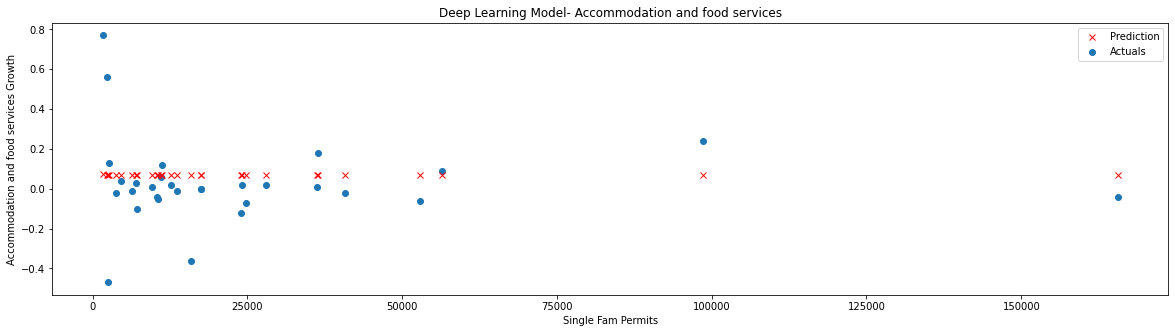

Train on 40487 samples, validate on 10122 samples
Epoch 1/25
40487/40487 [==============================] - 35s 872us/sample - loss: 0.0535 - mae: 0.1907 - val_loss: 0.0343 - val_mae: 0.1425
Epoch 2/25
40487/40487 [==============================] - 31s 774us/sample - loss: 0.0535 - mae: 0.1907 - val_loss: 0.0343 - val_mae: 0.1425
Epoch 3/25
40487/40487 [==============================] - 31s 764us/sample - loss: 0.0535 - mae: 0.1907 - val_loss: 0.0343 - val_mae: 0.1425
Epoch 4/25
40487/40487 [==============================] - 30s 749us/sample - loss: 0.0535 - mae: 0.1907 - val_loss: 0.0343 - val_mae: 0.1425
Epoch 5/25
40487/40487 [==============================] - 31s 757us/sample - loss: 0.0535 - mae: 0.1907 - val_loss: 0.0343 - val_mae: 0.1425
Epoch 6/25
40487/40487 [==============================] - 31s 760us/sample - loss: 0.0535 - mae: 0.1907 - val_loss: 0.0343 - val_mae: 0.1425
Epoch 7/25
40487/40487 [==============================] - 31s 759us/sample - loss: 0.0535 - mae: 0.1907 

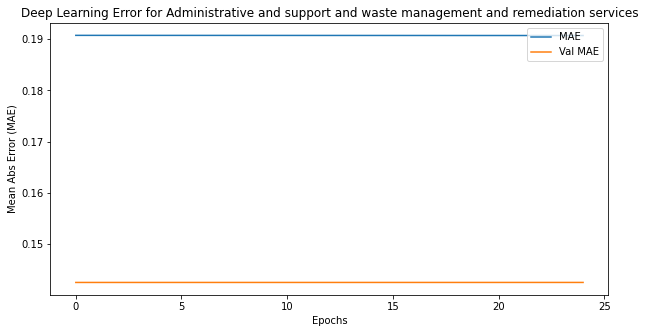

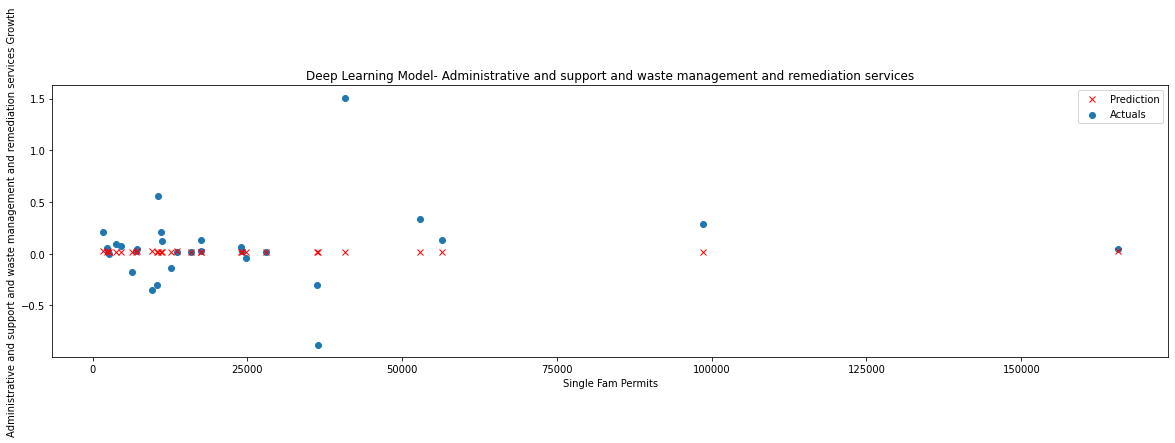

Train on 40487 samples, validate on 10122 samples
Epoch 1/25
40487/40487 [==============================] - 32s 787us/sample - loss: 2.2989 - mae: 2.6509 - val_loss: 0.0463 - val_mae: 0.2171
Epoch 2/25
40487/40487 [==============================] - 29s 707us/sample - loss: 2.2989 - mae: 2.6509 - val_loss: 0.0463 - val_mae: 0.2171
Epoch 3/25
40487/40487 [==============================] - 30s 736us/sample - loss: 2.2989 - mae: 2.6509 - val_loss: 0.0463 - val_mae: 0.2171
Epoch 4/25
40487/40487 [==============================] - 29s 705us/sample - loss: 2.2989 - mae: 2.6509 - val_loss: 0.0463 - val_mae: 0.2171
Epoch 5/25
40487/40487 [==============================] - 28s 703us/sample - loss: 2.2989 - mae: 2.6509 - val_loss: 0.0463 - val_mae: 0.2171
Epoch 6/25
40487/40487 [==============================] - 29s 722us/sample - loss: 2.2989 - mae: 2.6509 - val_loss: 0.0463 - val_mae: 0.2171
Epoch 7/25
40487/40487 [==============================] - 29s 704us/sample - loss: 2.2989 - mae: 2.6509 

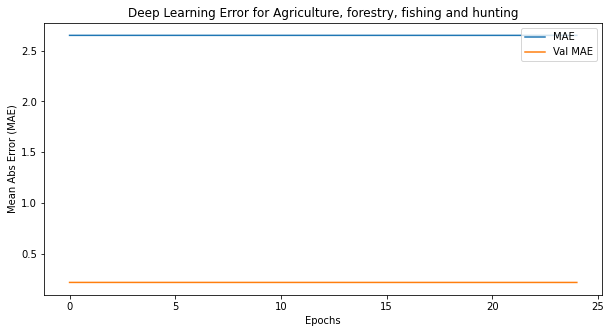

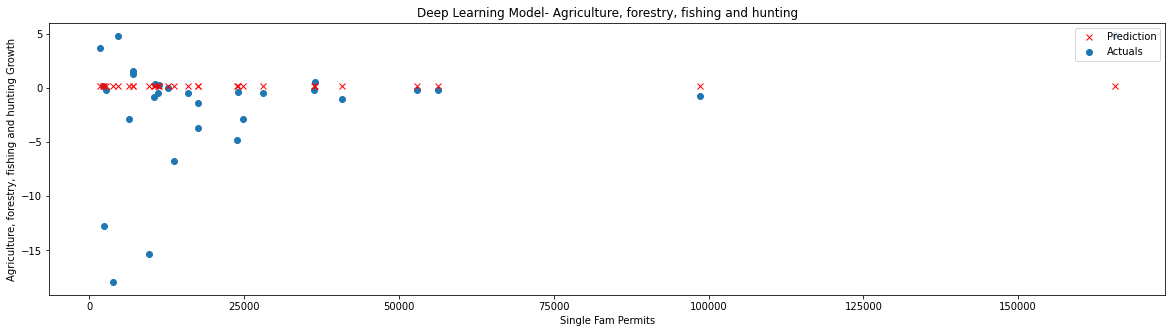

Train on 40487 samples, validate on 10122 samples
Epoch 1/25
40487/40487 [==============================] - 32s 803us/sample - loss: 5.1758 - mae: 5.6488 - val_loss: 0.0432 - val_mae: 0.2015
Epoch 2/25
40487/40487 [==============================] - 29s 721us/sample - loss: 5.1757 - mae: 5.6487 - val_loss: 0.0433 - val_mae: 0.2017
Epoch 3/25
40487/40487 [==============================] - 29s 715us/sample - loss: 5.1757 - mae: 5.6487 - val_loss: 0.0433 - val_mae: 0.2018
Epoch 4/25
40487/40487 [==============================] - 29s 719us/sample - loss: 5.1756 - mae: 5.6486 - val_loss: 0.0433 - val_mae: 0.2020
Epoch 5/25
40487/40487 [==============================] - 30s 732us/sample - loss: 5.1756 - mae: 5.6486 - val_loss: 0.0433 - val_mae: 0.2022
Epoch 6/25
40487/40487 [==============================] - 29s 715us/sample - loss: 5.1755 - mae: 5.6485 - val_loss: 0.0434 - val_mae: 0.2023
Epoch 7/25
40487/40487 [==============================] - 29s 722us/sample - loss: 5.1755 - mae: 5.6485 

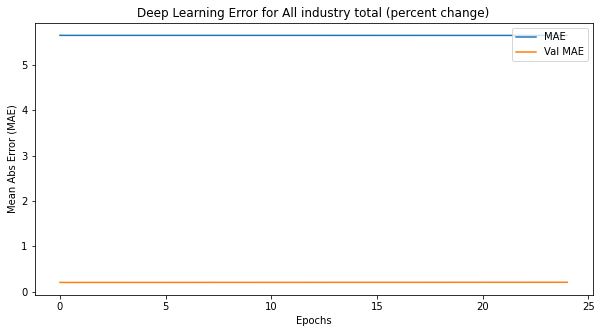

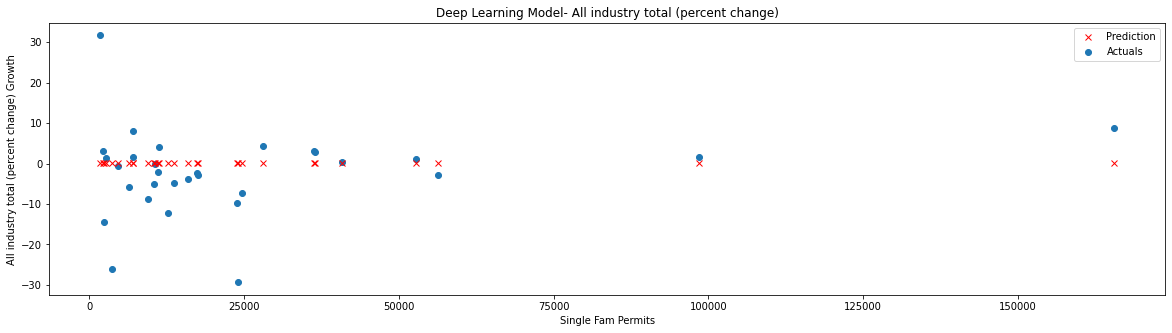

Train on 40487 samples, validate on 10122 samples
Epoch 1/25
40487/40487 [==============================] - 31s 776us/sample - loss: 0.0258 - mae: 0.1121 - val_loss: 0.0352 - val_mae: 0.1514
Epoch 2/25
40487/40487 [==============================] - 28s 693us/sample - loss: 0.0258 - mae: 0.1121 - val_loss: 0.0352 - val_mae: 0.1514
Epoch 3/25
40487/40487 [==============================] - 29s 707us/sample - loss: 0.0258 - mae: 0.1121 - val_loss: 0.0352 - val_mae: 0.1514
Epoch 4/25
40487/40487 [==============================] - 31s 768us/sample - loss: 0.0258 - mae: 0.1120 - val_loss: 0.0352 - val_mae: 0.1514
Epoch 5/25
40487/40487 [==============================] - 30s 736us/sample - loss: 0.0258 - mae: 0.1120 - val_loss: 0.0352 - val_mae: 0.1514
Epoch 6/25
40487/40487 [==============================] - 32s 779us/sample - loss: 0.0258 - mae: 0.1120 - val_loss: 0.0352 - val_mae: 0.1514
Epoch 7/25
40487/40487 [==============================] - 30s 746us/sample - loss: 0.0258 - mae: 0.1120 

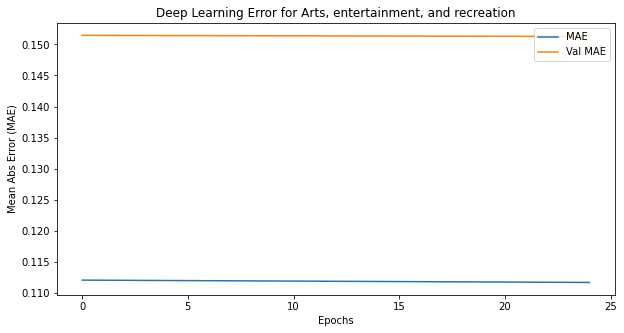

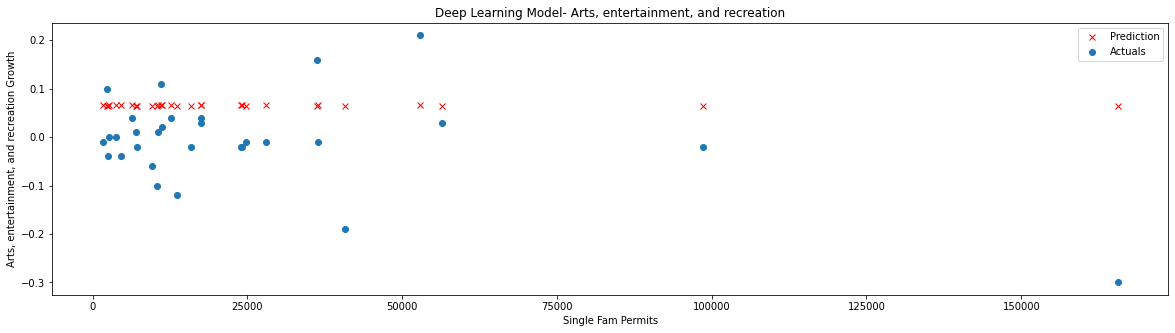

Train on 40487 samples, validate on 10122 samples
Epoch 1/25
40487/40487 [==============================] - 32s 783us/sample - loss: 0.0581 - mae: 0.1956 - val_loss: 0.0358 - val_mae: 0.1557
Epoch 2/25
40487/40487 [==============================] - 29s 722us/sample - loss: 0.0581 - mae: 0.1956 - val_loss: 0.0358 - val_mae: 0.1556
Epoch 3/25
40487/40487 [==============================] - 28s 693us/sample - loss: 0.0581 - mae: 0.1956 - val_loss: 0.0358 - val_mae: 0.1556
Epoch 4/25
40487/40487 [==============================] - 29s 710us/sample - loss: 0.0581 - mae: 0.1956 - val_loss: 0.0358 - val_mae: 0.1556
Epoch 5/25
40487/40487 [==============================] - 29s 718us/sample - loss: 0.0581 - mae: 0.1956 - val_loss: 0.0358 - val_mae: 0.1556
Epoch 6/25
40487/40487 [==============================] - 29s 710us/sample - loss: 0.0581 - mae: 0.1956 - val_loss: 0.0358 - val_mae: 0.1556
Epoch 7/25
40487/40487 [==============================] - 29s 707us/sample - loss: 0.0581 - mae: 0.1956 

In [24]:
os.chdir(deep_learning_img)
var=var_pca
df_pred_dl=pd.DataFrame()
epoch=25
for label in var_bed:
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

  dt=tf.expand_dims(df_train_array,axis=-1)
  dv=tf.expand_dims(df_val_array,axis=-1)
#ds = ds.map(lambda window: (window[:-1], window[-1:])) #All but the last entry; The last entry
#ds = ds.batch(10).prefetch(1)
  history = model.fit(dt,df_train[label],epochs=epoch,validation_data=(dv,df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(epoch),history.history["mae"],label="MAE")
  plt.plot(np.arange(epoch),history.history["val_mae"],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("Deep Learning Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))
  mod=model.predict(dtest)
  df_pred_dl=pd.concat([df_pred_dl,pd.DataFrame(mod)],axis=1)
    #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('Deep Learning Model- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
  plt.plot(df_train[plt_var][0:30], model.predict(dt[0:30]),'x',color='r',label="Prediction")
  plt.xlabel("Single Fam Permits")
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Deep_Learning_predictions_{}.png".format(label))
  plt.show()

In [0]:
os.chdir(base_dir)
df_pred_dl.to_csv("Deep_learning_predictions_v2.csv")

In [26]:
df_pred_dl

0         0         0  ...         0         0         0
0     0.071466  0.023545  0.181543  ...  0.064246 -0.228573 -0.109029
1     0.071473  0.023452  0.181578  ...  0.064269 -0.228555 -0.108951
2     0.071259  0.022684  0.180699  ...  0.063558 -0.229487 -0.106911
3     0.071372  0.023340  0.179999  ...  0.062875 -0.230782 -0.105062
4     0.071379  0.023342  0.180382  ...  0.063102 -0.230528 -0.105606
...        ...       ...       ...  ...       ...       ...       ...
1243  0.069715  0.017615  0.179272  ...  0.065091 -0.224040 -0.111879
1244  0.069703  0.017567  0.179189  ...  0.065046 -0.224104 -0.111774
1245  0.069677  0.017418  0.179161  ...  0.065088 -0.223999 -0.111840
1246  0.069657  0.017292  0.179147  ...  0.065131 -0.223907 -0.111896
1247  0.069646  0.017215  0.179130  ...  0.065147 -0.223878 -0.111891

[1248 rows x 34 columns]

In [87]:
df_pred_grad_boost

0         0         0  ...         0         0         0
0     0.152768  0.055593  4.514603  ...  0.029079  0.355107  0.201974
1     0.005789  0.004474  2.884868  ...  0.029079  0.355107  0.201974
2    -0.019176  0.077647 -0.660824  ...  0.505529  0.210724  0.102118
3     0.033529  0.028588  5.641647  ...  0.642706  0.405312  0.160000
4    -0.034750  0.058625 -1.979250  ...  0.204750  0.225482  0.294250
...        ...       ...       ...  ...       ...       ...       ...
1243  0.042670  0.153416 -0.133267  ...  0.104486 -0.229206  0.224252
1244  0.042670  0.153416 -0.133267  ...  0.104486 -0.229206  0.224252
1245  0.042670  0.144709 -0.133267  ...  0.104486  0.978756  0.224252
1246  0.042670  0.144709  1.612750  ...  0.104486  0.978756  0.224252
1247 -0.057321  0.153416  1.612750  ...  0.104486  0.978756  0.224252

[1248 rows x 34 columns]

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 1677.8273 - mae: 1677.9684 - val_loss: 2.3192 - val_mae: 2.6106
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.1869 - mae: 1.2999 - val_loss: 1.3019 - val_mae: 1.5917
Epoch 3/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.7733 - mae: 0.8851 - val_loss: 1.0608 - val_mae: 1.3500
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5044 - mae: 0.6155 - val_loss: 0.8354 - val_mae: 1.1245
Epoch 5/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.3058 - mae: 0.4163 - val_loss: 0.7669 - val_mae: 1.0559
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.2313 - mae: 0.3418 - val_loss: 0.7283 - val_mae: 1.0171
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.1764 - mae: 0.2866 - val_lo

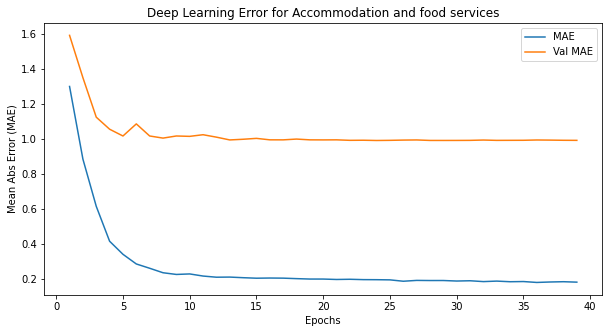

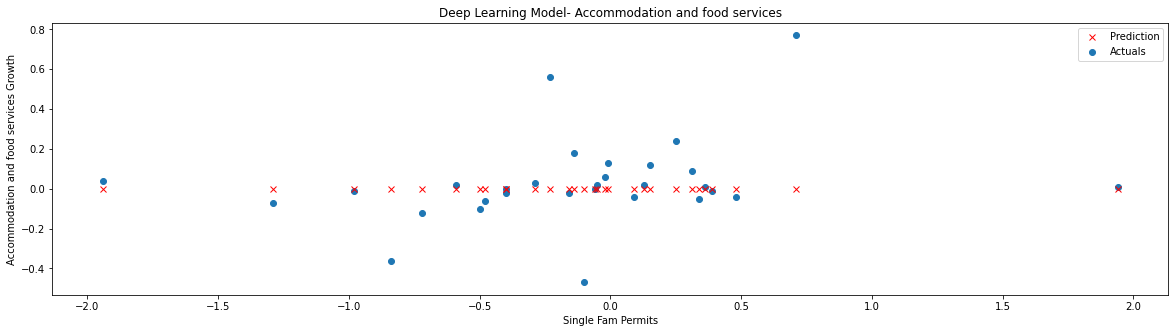

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 50us/sample - loss: 2745.4138 - mae: 2745.7874 - val_loss: 1.6289 - val_mae: 1.9626
Epoch 2/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.9722 - mae: 2.2318 - val_loss: 1.6716 - val_mae: 2.0190
Epoch 3/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.2630 - mae: 1.4847 - val_loss: 1.4196 - val_mae: 1.7419
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.8741 - mae: 1.0743 - val_loss: 1.6553 - val_mae: 1.9748
Epoch 5/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6925 - mae: 0.8818 - val_loss: 1.0742 - val_mae: 1.3763
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5821 - mae: 0.7644 - val_loss: 1.3798 - val_mae: 1.6992
Epoch 7/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.4956 - mae: 0.6697 - val_lo

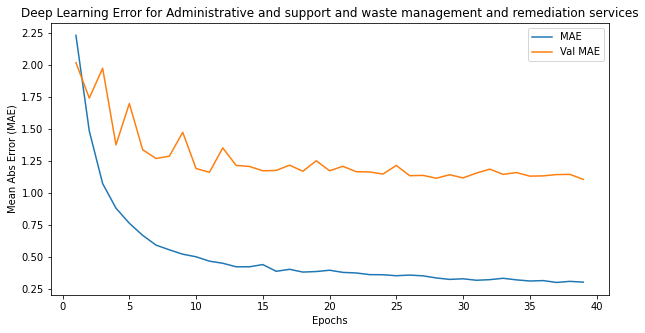

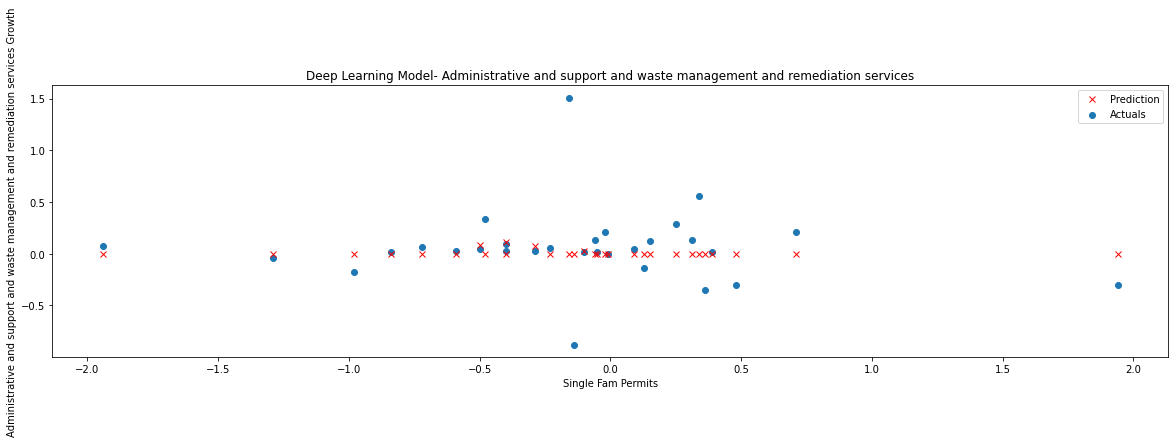

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 50us/sample - loss: 5386.0037 - mae: 5386.4702 - val_loss: 3.6096 - val_mae: 4.0375
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 6.3039 - mae: 6.7082 - val_loss: 3.1640 - val_mae: 3.5524
Epoch 3/40
40487/40487 [==============================] - 2s 45us/sample - loss: 4.3612 - mae: 4.7420 - val_loss: 2.0627 - val_mae: 2.4424
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 3.8938 - mae: 4.2646 - val_loss: 2.1122 - val_mae: 2.4722
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 3.3280 - mae: 3.6901 - val_loss: 1.3649 - val_mae: 1.6928
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 3.2194 - mae: 3.5760 - val_loss: 1.8192 - val_mae: 2.1620
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 2.9561 - mae: 3.3103 - val_lo

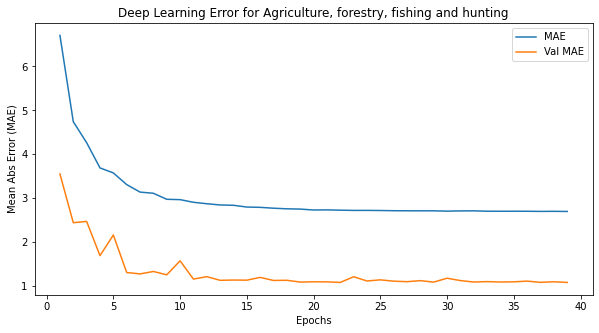

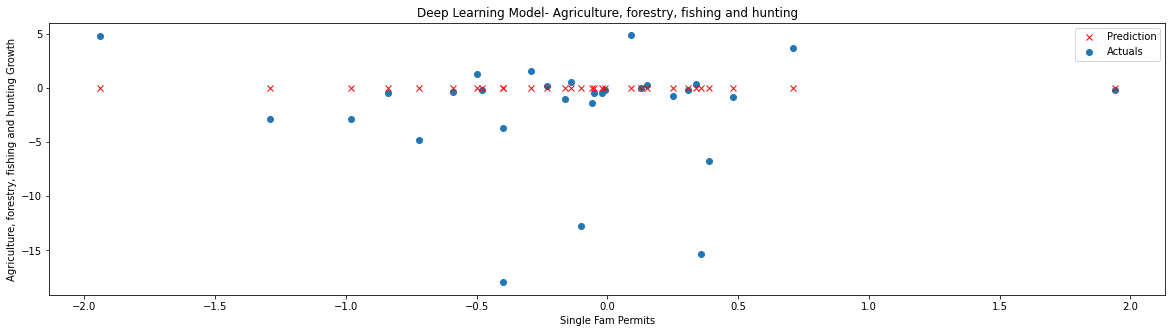

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 2778.1085 - mae: 2778.5979 - val_loss: 1.3835 - val_mae: 1.7654
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 6.4461 - mae: 6.9231 - val_loss: 1.8149 - val_mae: 2.2084
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 5.8615 - mae: 6.3373 - val_loss: 1.3062 - val_mae: 1.6581
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 5.5357 - mae: 6.0107 - val_loss: 1.8645 - val_mae: 2.2329
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 5.5072 - mae: 5.9818 - val_loss: 1.9813 - val_mae: 2.3477
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 5.4459 - mae: 5.9201 - val_loss: 1.1970 - val_mae: 1.5376
Epoch 7/40
40487/40487 [==============================] - 2s 46us/sample - loss: 5.4157 - mae: 5.8897 - val_lo

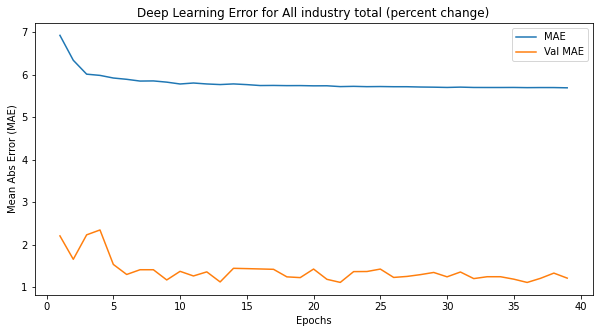

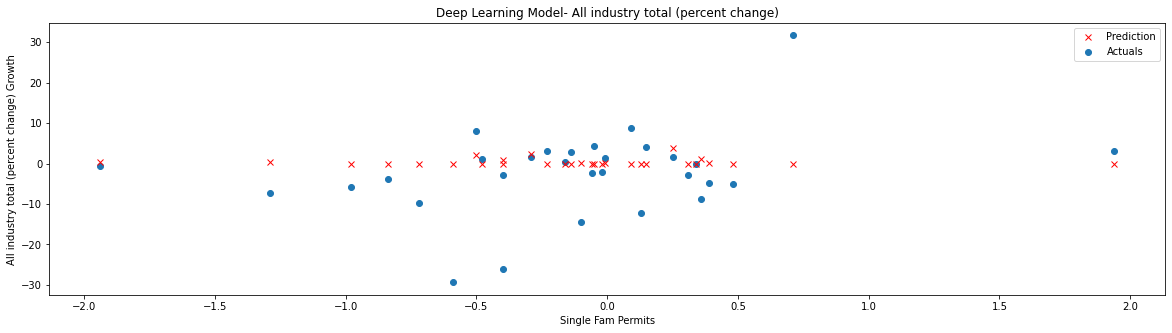

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 52us/sample - loss: 2395.1669 - mae: 2395.3560 - val_loss: 1.8790 - val_mae: 2.1939
Epoch 2/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.9830 - mae: 1.0967 - val_loss: 1.2920 - val_mae: 1.6042
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.6224 - mae: 0.7147 - val_loss: 1.1076 - val_mae: 1.4086
Epoch 4/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.4199 - mae: 0.5070 - val_loss: 1.0542 - val_mae: 1.3563
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.3218 - mae: 0.4031 - val_loss: 0.9318 - val_mae: 1.2276
Epoch 6/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.2344 - mae: 0.3177 - val_loss: 1.0123 - val_mae: 1.3101
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.2202 - mae: 0.3044 - val_lo

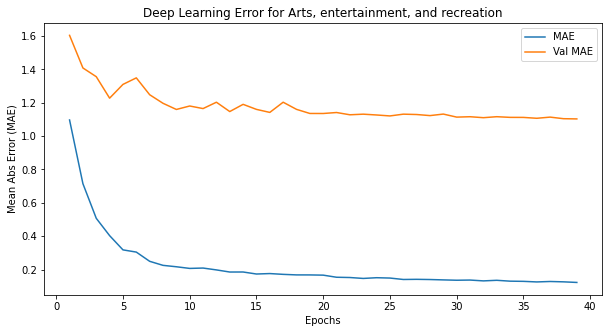

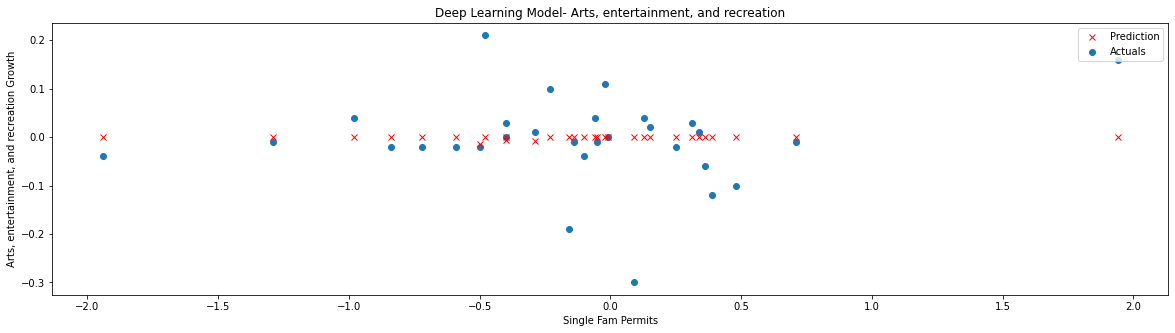

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 2102.8611 - mae: 2103.0327 - val_loss: 1.5660 - val_mae: 1.8663
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.8391 - mae: 0.9837 - val_loss: 1.5000 - val_mae: 1.7996
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.7335 - mae: 0.8772 - val_loss: 1.3328 - val_mae: 1.6312
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.6464 - mae: 0.7888 - val_loss: 1.2174 - val_mae: 1.5151
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5503 - mae: 0.6914 - val_loss: 1.2361 - val_mae: 1.5322
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5483 - mae: 0.6893 - val_loss: 1.0412 - val_mae: 1.3357
Epoch 7/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.4428 - mae: 0.5831 - val_lo

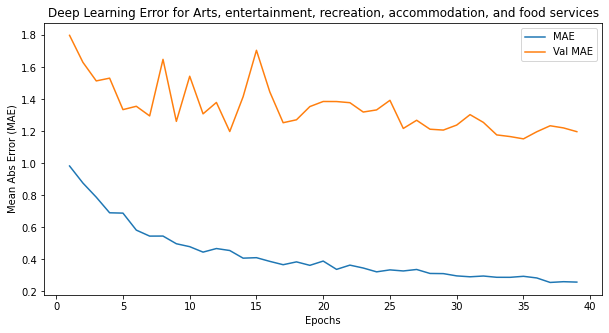

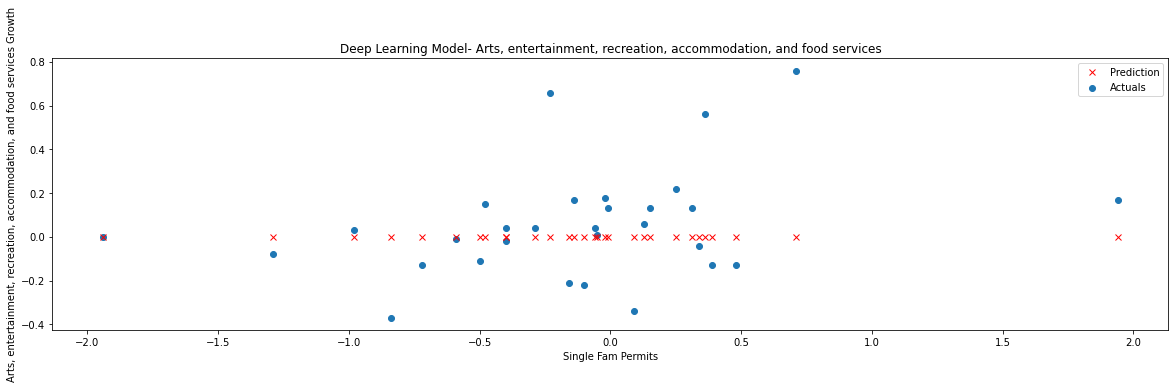

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 2997.7730 - mae: 2998.1799 - val_loss: 2.8598 - val_mae: 3.2174
Epoch 2/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.7427 - mae: 2.0669 - val_loss: 2.4324 - val_mae: 2.7546
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.1317 - mae: 1.4402 - val_loss: 1.1669 - val_mae: 1.4761
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.8653 - mae: 1.1669 - val_loss: 1.1702 - val_mae: 1.4906
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7743 - mae: 1.0714 - val_loss: 1.2360 - val_mae: 1.5404
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.7250 - mae: 1.0196 - val_loss: 1.3662 - val_mae: 1.6787
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.6812 - mae: 0.9738 - val_lo

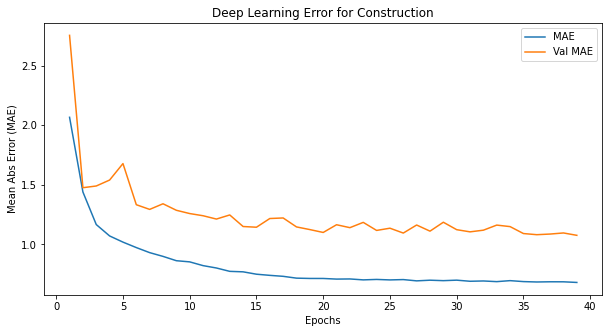

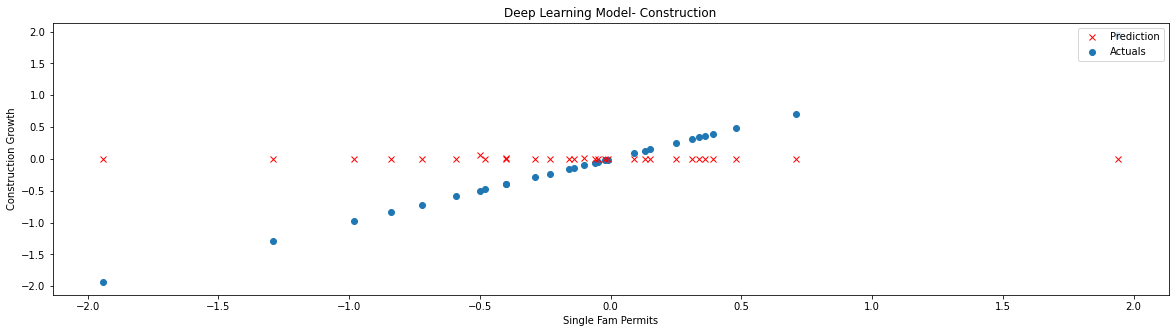

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 2303.1389 - mae: 2303.4302 - val_loss: 0.7055 - val_mae: 0.9925
Epoch 2/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.6621 - mae: 0.9474 - val_loss: 0.7050 - val_mae: 0.9919
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6619 - mae: 0.9472 - val_loss: 0.7045 - val_mae: 0.9914
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.6617 - mae: 0.9470 - val_loss: 0.7044 - val_mae: 0.9913
Epoch 5/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6617 - mae: 0.9470 - val_loss: 0.7044 - val_mae: 0.9913
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6617 - mae: 0.9470 - val_loss: 0.7044 - val_mae: 0.9913
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.6617 - mae: 0.9470 - val_lo

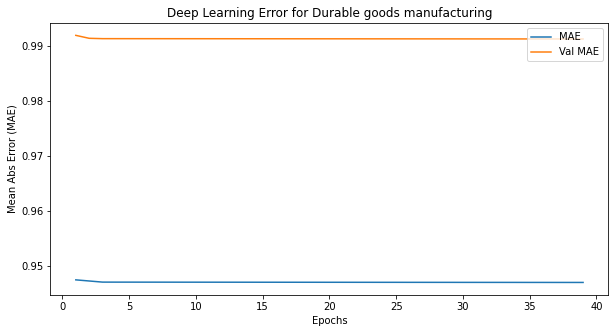

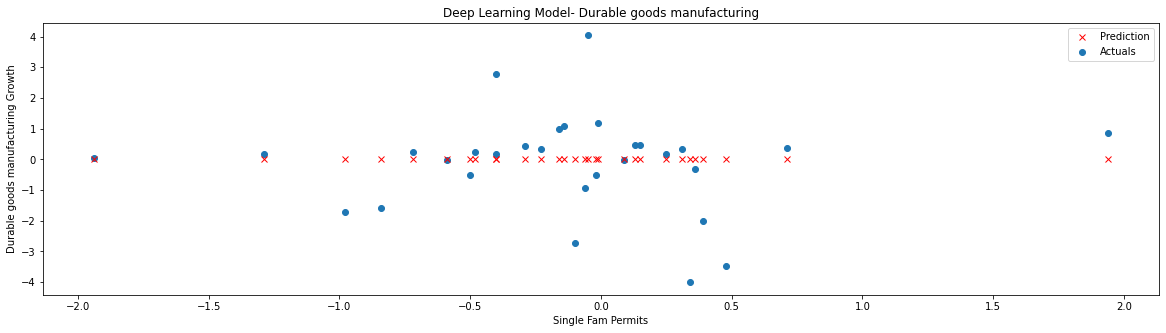

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 50us/sample - loss: 3453.6229 - mae: 3454.0625 - val_loss: 1.8861 - val_mae: 2.2749
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.9996 - mae: 2.2509 - val_loss: 1.8417 - val_mae: 2.1881
Epoch 3/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.0327 - mae: 1.2055 - val_loss: 1.1083 - val_mae: 1.4388
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6322 - mae: 0.7625 - val_loss: 1.6623 - val_mae: 1.9875
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5335 - mae: 0.6475 - val_loss: 0.9409 - val_mae: 1.2496
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.4738 - mae: 0.5795 - val_loss: 0.8762 - val_mae: 1.1766
Epoch 7/40
40487/40487 [==============================] - 2s 50us/sample - loss: 0.3121 - mae: 0.3992 - val_lo

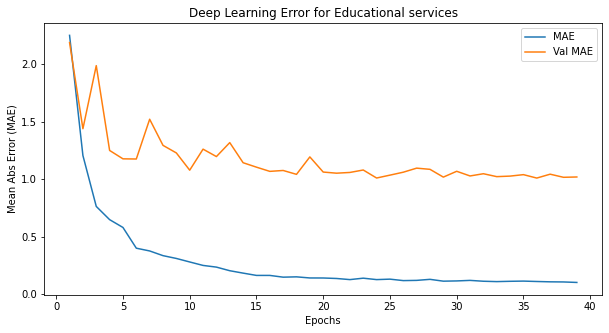

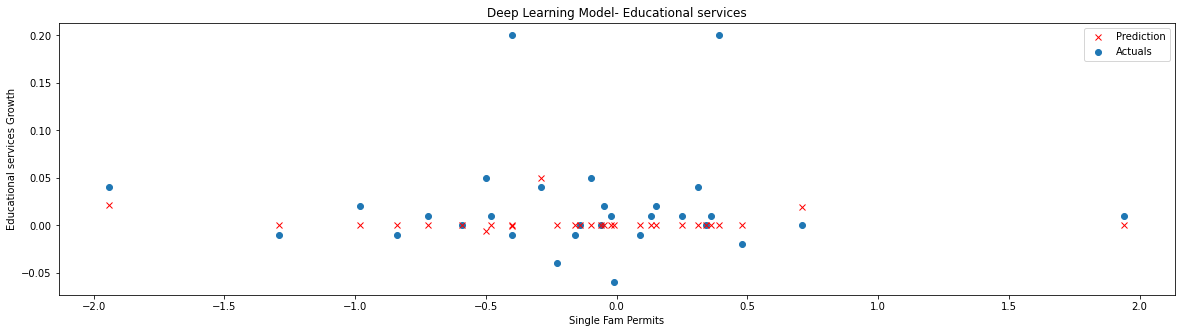

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 3384.9004 - mae: 3385.1572 - val_loss: 1.4855 - val_mae: 1.7851
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.8586 - mae: 1.0718 - val_loss: 1.3388 - val_mae: 1.6328
Epoch 3/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.5857 - mae: 0.7951 - val_loss: 1.1738 - val_mae: 1.4703
Epoch 4/40
40487/40487 [==============================] - 2s 47us/sample - loss: 0.4729 - mae: 0.6811 - val_loss: 1.0563 - val_mae: 1.3524
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.3745 - mae: 0.5821 - val_loss: 1.0166 - val_mae: 1.3129
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.3308 - mae: 0.5375 - val_loss: 1.1325 - val_mae: 1.4296
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.3101 - mae: 0.5171 - val_lo

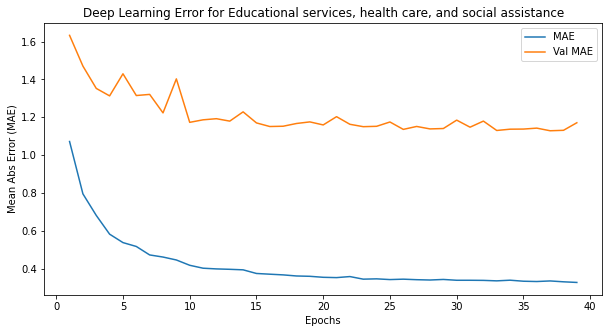

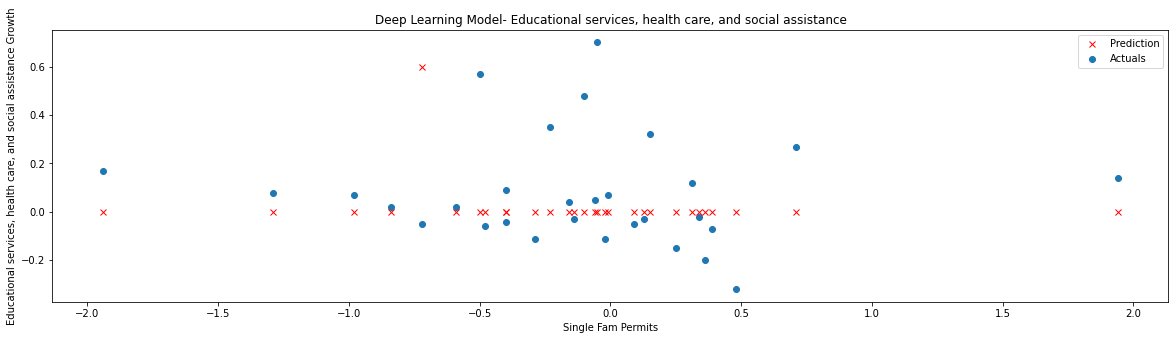

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 51us/sample - loss: 3034.7620 - mae: 3035.1086 - val_loss: 2.6494 - val_mae: 3.0026
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.9426 - mae: 1.2114 - val_loss: 1.0861 - val_mae: 1.4196
Epoch 3/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5774 - mae: 0.8305 - val_loss: 1.0767 - val_mae: 1.4058
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.4129 - mae: 0.6590 - val_loss: 0.8955 - val_mae: 1.2088
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.3529 - mae: 0.5951 - val_loss: 0.8606 - val_mae: 1.1553
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.3091 - mae: 0.5484 - val_loss: 0.8348 - val_mae: 1.1440
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.2976 - mae: 0.5363 - val_lo

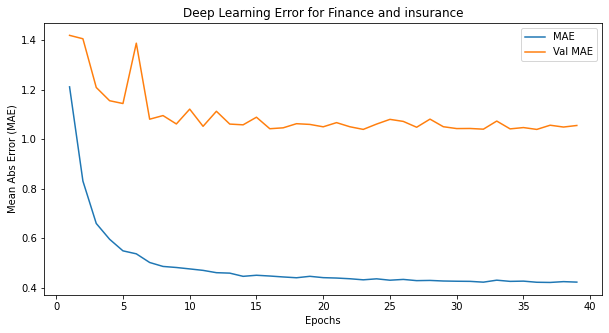

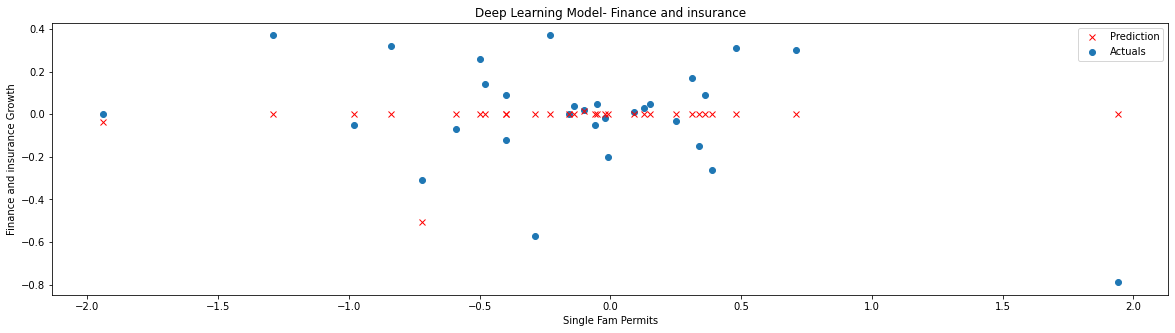

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 51us/sample - loss: 4070.2470 - mae: 4070.6953 - val_loss: 2.1985 - val_mae: 2.5320
Epoch 2/40
40487/40487 [==============================] - 2s 46us/sample - loss: 2.2731 - mae: 2.6509 - val_loss: 2.3471 - val_mae: 2.6836
Epoch 3/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.8092 - mae: 2.1784 - val_loss: 1.4450 - val_mae: 1.7659
Epoch 4/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.4278 - mae: 1.7926 - val_loss: 1.2375 - val_mae: 1.5442
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.2204 - mae: 1.5823 - val_loss: 1.3967 - val_mae: 1.7133
Epoch 6/40
40487/40487 [==============================] - 2s 48us/sample - loss: 1.0561 - mae: 1.4153 - val_loss: 1.1082 - val_mae: 1.4105
Epoch 7/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.9678 - mae: 1.3263 - val_lo

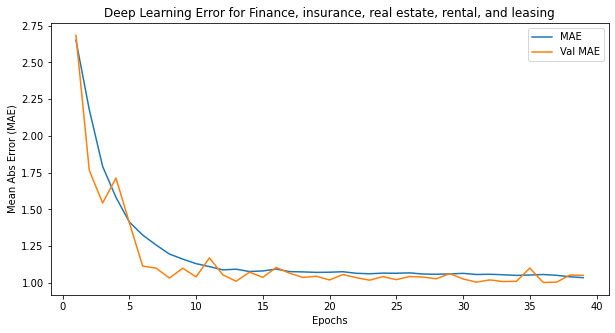

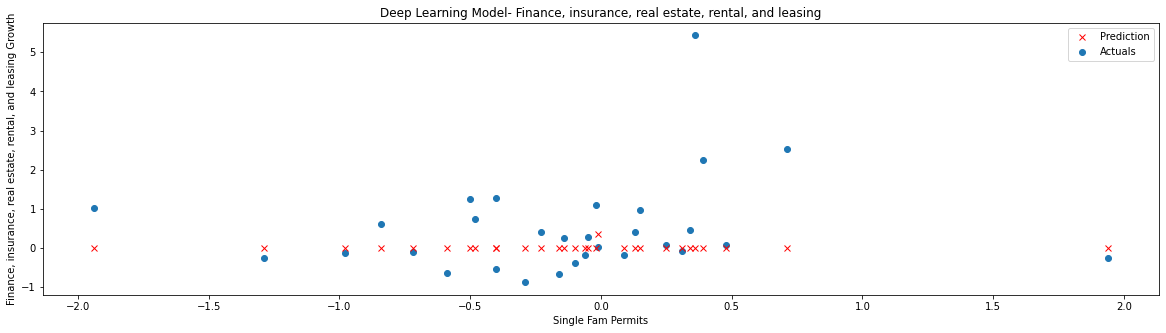

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 55us/sample - loss: 2131.6529 - mae: 2131.9429 - val_loss: 2.8611 - val_mae: 3.1728
Epoch 2/40
40487/40487 [==============================] - 2s 48us/sample - loss: 1.5107 - mae: 1.7732 - val_loss: 1.4018 - val_mae: 1.7140
Epoch 3/40
40487/40487 [==============================] - 2s 51us/sample - loss: 1.0453 - mae: 1.3043 - val_loss: 0.9754 - val_mae: 1.2814
Epoch 4/40
40487/40487 [==============================] - 2s 50us/sample - loss: 0.8387 - mae: 1.0964 - val_loss: 1.5428 - val_mae: 1.8413
Epoch 5/40
40487/40487 [==============================] - 2s 50us/sample - loss: 0.6250 - mae: 0.8797 - val_loss: 0.8588 - val_mae: 1.1567
Epoch 6/40
40487/40487 [==============================] - 2s 47us/sample - loss: 0.5300 - mae: 0.7844 - val_loss: 0.8719 - val_mae: 1.1709
Epoch 7/40
40487/40487 [==============================] - 2s 49us/sample - loss: 0.4555 - mae: 0.7100 - val_lo

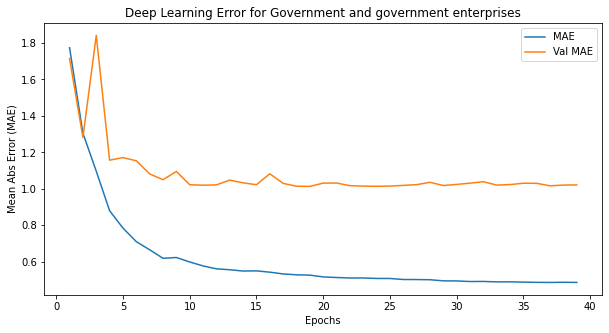

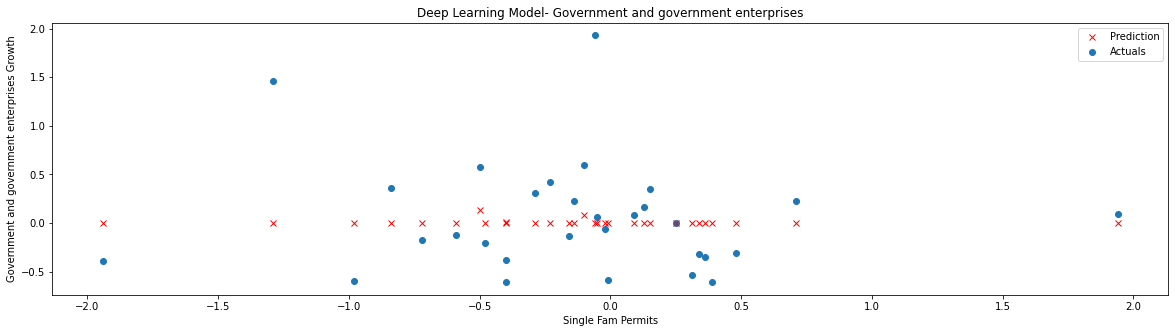

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 51us/sample - loss: 4704.3180 - mae: 4704.5776 - val_loss: 6.7017 - val_mae: 7.0129
Epoch 2/40
40487/40487 [==============================] - 2s 45us/sample - loss: 2.3165 - mae: 2.5438 - val_loss: 1.9422 - val_mae: 2.2459
Epoch 3/40
40487/40487 [==============================] - 2s 47us/sample - loss: 1.5771 - mae: 1.7926 - val_loss: 1.7089 - val_mae: 2.0143
Epoch 4/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.1160 - mae: 1.3273 - val_loss: 1.2536 - val_mae: 1.5569
Epoch 5/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.8234 - mae: 1.0312 - val_loss: 1.6923 - val_mae: 1.9955
Epoch 6/40
40487/40487 [==============================] - 2s 47us/sample - loss: 0.6257 - mae: 0.8305 - val_loss: 1.1856 - val_mae: 1.4862
Epoch 7/40
40487/40487 [==============================] - 2s 47us/sample - loss: 0.4753 - mae: 0.6778 - val_lo

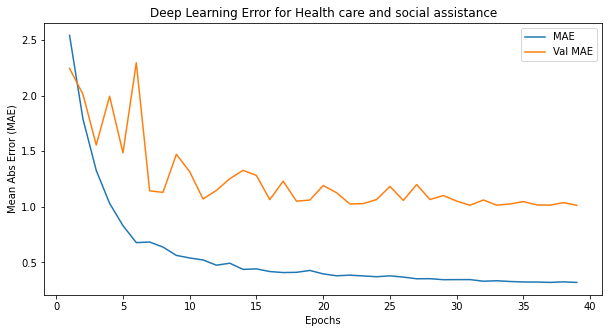

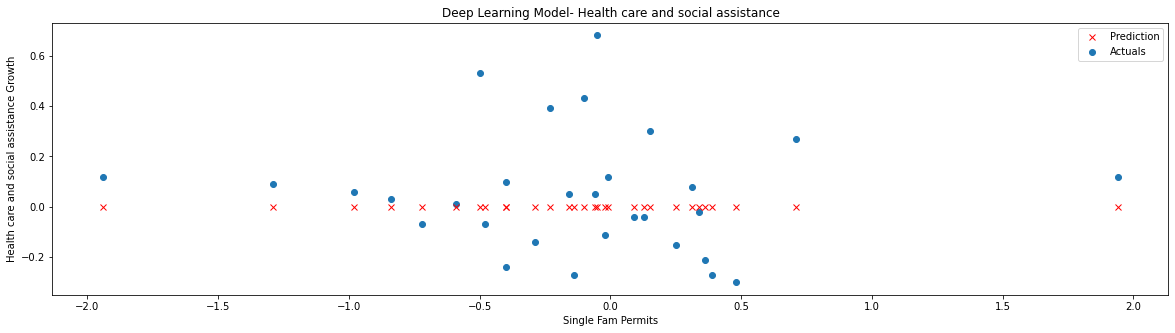

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 5420.3324 - mae: 5420.7803 - val_loss: 3.4748 - val_mae: 3.7991
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 3.0681 - mae: 3.3681 - val_loss: 2.6164 - val_mae: 2.9902
Epoch 3/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.3325 - mae: 1.5716 - val_loss: 1.4584 - val_mae: 1.8022
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.9872 - mae: 1.2102 - val_loss: 1.4599 - val_mae: 1.7904
Epoch 5/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.7849 - mae: 0.9921 - val_loss: 1.1845 - val_mae: 1.4895
Epoch 6/40
40487/40487 [==============================] - 2s 49us/sample - loss: 0.6802 - mae: 0.8769 - val_loss: 1.5104 - val_mae: 1.8395
Epoch 7/40
40487/40487 [==============================] - 3s 65us/sample - loss: 0.5802 - mae: 0.7698 - val_lo

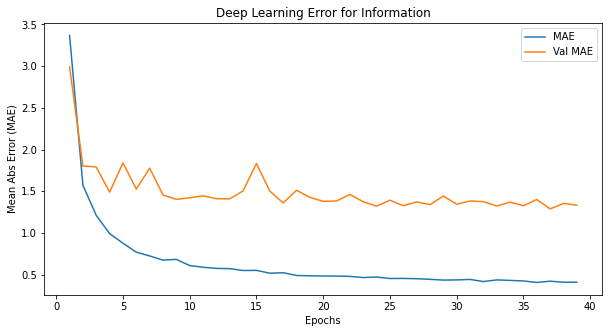

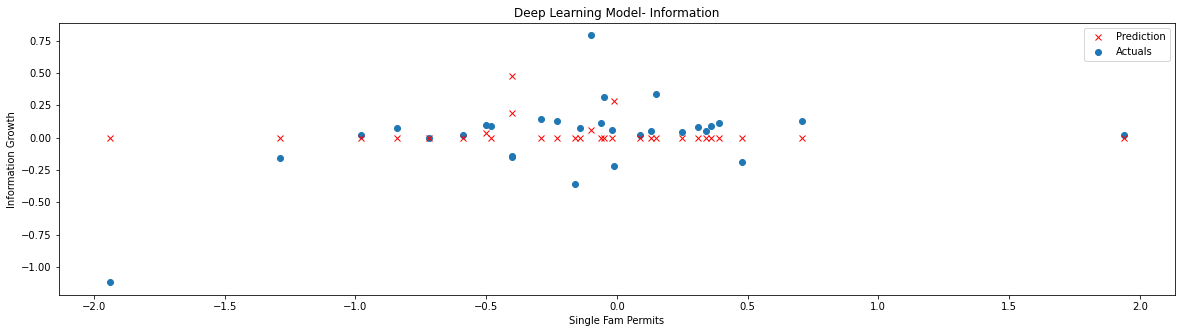

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 47us/sample - loss: 2956.4176 - mae: 2956.8281 - val_loss: 10.3663 - val_mae: 10.7483
Epoch 2/40
40487/40487 [==============================] - 2s 42us/sample - loss: 3.4042 - mae: 3.6724 - val_loss: 1.4202 - val_mae: 1.7505
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.4265 - mae: 1.6402 - val_loss: 1.2157 - val_mae: 1.5360
Epoch 4/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.0087 - mae: 1.1978 - val_loss: 0.9503 - val_mae: 1.2574
Epoch 5/40
40487/40487 [==============================] - 2s 42us/sample - loss: 0.8329 - mae: 1.0069 - val_loss: 0.9189 - val_mae: 1.2222
Epoch 6/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.6968 - mae: 0.8637 - val_loss: 1.0032 - val_mae: 1.3121
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.6738 - mae: 0.8360 - val_

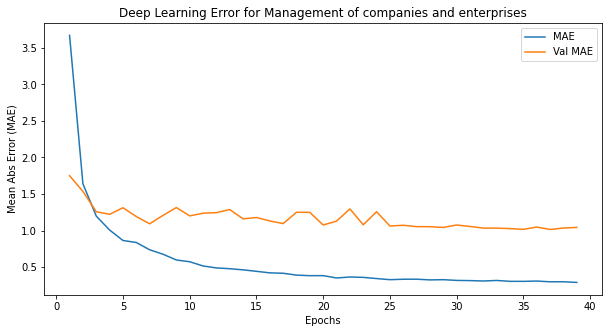

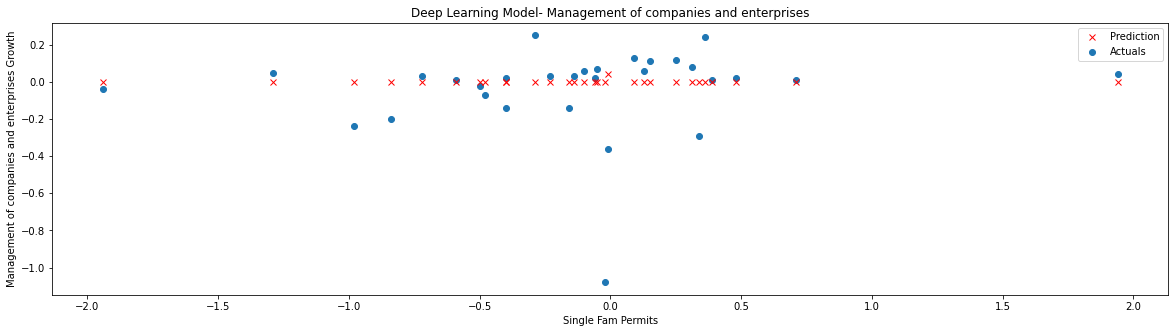

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 51us/sample - loss: 3641.3586 - mae: 3641.7844 - val_loss: 4.3870 - val_mae: 4.7175
Epoch 2/40
40487/40487 [==============================] - 2s 46us/sample - loss: 4.7054 - mae: 5.0789 - val_loss: 2.3330 - val_mae: 2.6369
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 3.2038 - mae: 3.5687 - val_loss: 2.0417 - val_mae: 2.3531
Epoch 4/40
40487/40487 [==============================] - 2s 46us/sample - loss: 3.0070 - mae: 3.3684 - val_loss: 1.7395 - val_mae: 2.0501
Epoch 5/40
40487/40487 [==============================] - 2s 47us/sample - loss: 2.7067 - mae: 3.0662 - val_loss: 3.3482 - val_mae: 3.6487
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 2.7503 - mae: 3.1089 - val_loss: 1.6960 - val_mae: 1.9929
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 2.4579 - mae: 2.8157 - val_lo

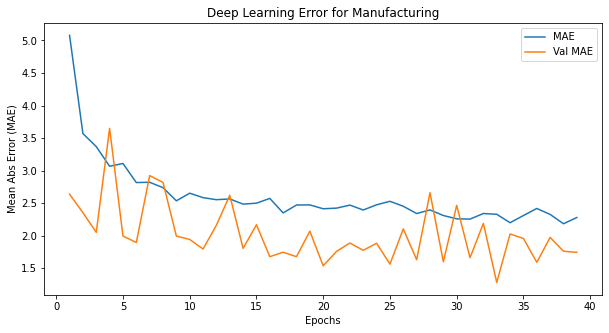

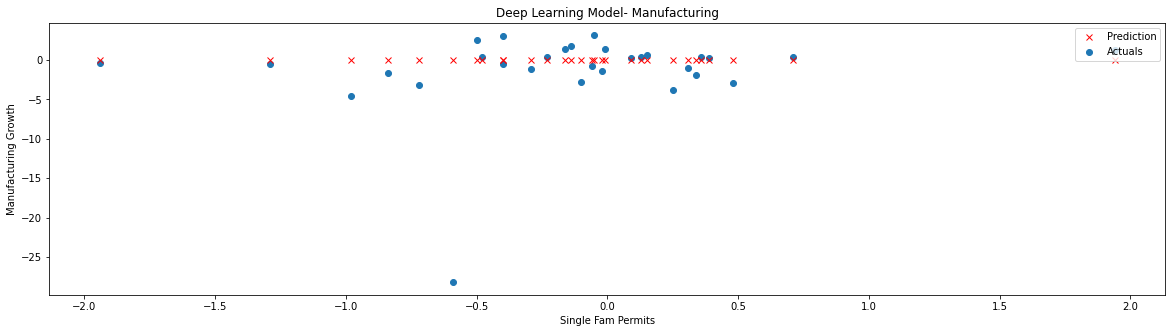

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 50us/sample - loss: 2700.5125 - mae: 2700.8997 - val_loss: 0.9735 - val_mae: 1.2885
Epoch 2/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.6611 - mae: 2.0385 - val_loss: 0.8871 - val_mae: 1.1951
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.5186 - mae: 1.8947 - val_loss: 0.8065 - val_mae: 1.0981
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.4432 - mae: 1.8184 - val_loss: 0.8483 - val_mae: 1.1518
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.3920 - mae: 1.7664 - val_loss: 0.7907 - val_mae: 1.0850
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.3704 - mae: 1.7441 - val_loss: 0.7756 - val_mae: 1.0667
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.3636 - mae: 1.7368 - val_lo

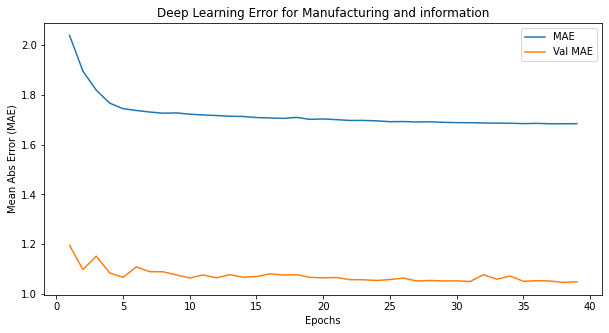

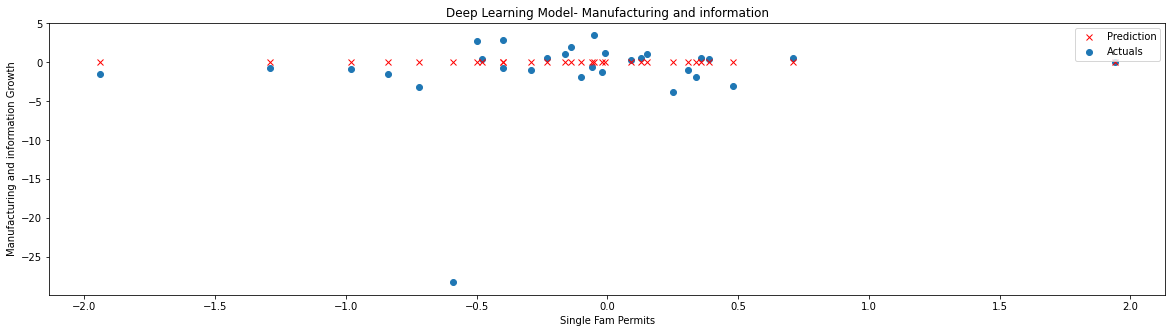

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 3758.3624 - mae: 3758.7686 - val_loss: 1.6085 - val_mae: 1.9642
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 3.1576 - mae: 3.4152 - val_loss: 1.8360 - val_mae: 2.1838
Epoch 3/40
40487/40487 [==============================] - 2s 46us/sample - loss: 2.0447 - mae: 2.2640 - val_loss: 1.5164 - val_mae: 1.8536
Epoch 4/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.8019 - mae: 2.0069 - val_loss: 1.4853 - val_mae: 1.8039
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.5666 - mae: 1.7655 - val_loss: 0.9064 - val_mae: 1.2173
Epoch 6/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.4754 - mae: 1.6677 - val_loss: 1.0122 - val_mae: 1.3316
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.2937 - mae: 1.4814 - val_lo

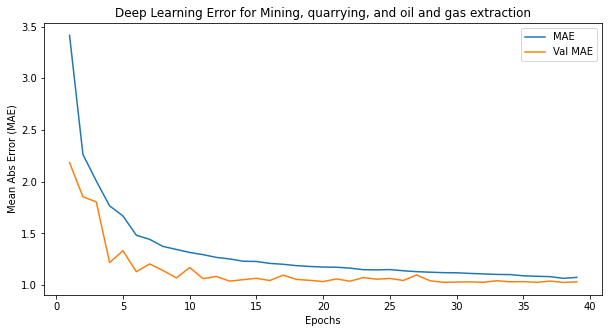

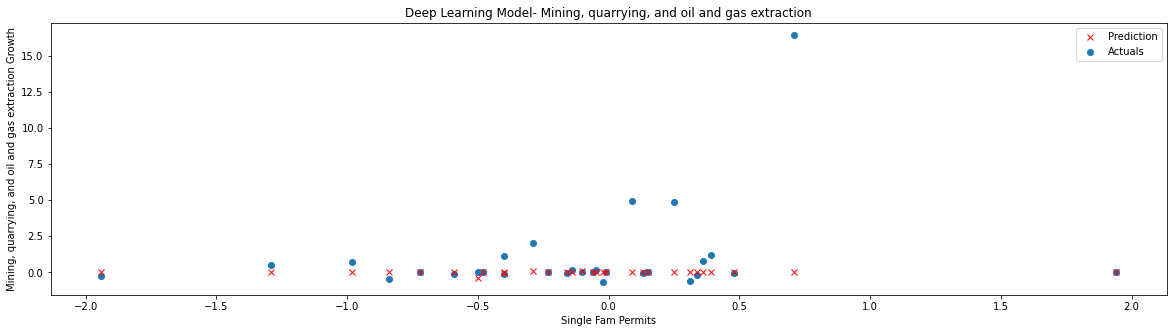

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 2951.6254 - mae: 2952.1030 - val_loss: 4.5331 - val_mae: 4.9202
Epoch 2/40
40487/40487 [==============================] - 2s 46us/sample - loss: 4.9827 - mae: 5.4051 - val_loss: 1.7335 - val_mae: 2.0816
Epoch 3/40
40487/40487 [==============================] - 2s 46us/sample - loss: 4.2394 - mae: 4.6427 - val_loss: 1.5014 - val_mae: 1.8106
Epoch 4/40
40487/40487 [==============================] - 2s 47us/sample - loss: 3.9366 - mae: 4.3292 - val_loss: 1.0284 - val_mae: 1.3286
Epoch 5/40
40487/40487 [==============================] - 2s 46us/sample - loss: 3.6179 - mae: 4.0033 - val_loss: 1.0677 - val_mae: 1.3759
Epoch 6/40
40487/40487 [==============================] - 2s 47us/sample - loss: 3.5657 - mae: 3.9495 - val_loss: 1.1805 - val_mae: 1.4834
Epoch 7/40
40487/40487 [==============================] - 2s 48us/sample - loss: 3.5179 - mae: 3.8990 - val_lo

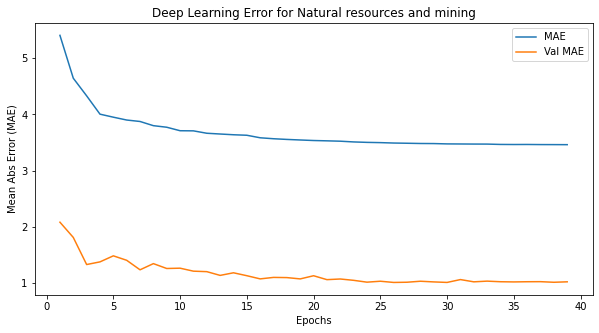

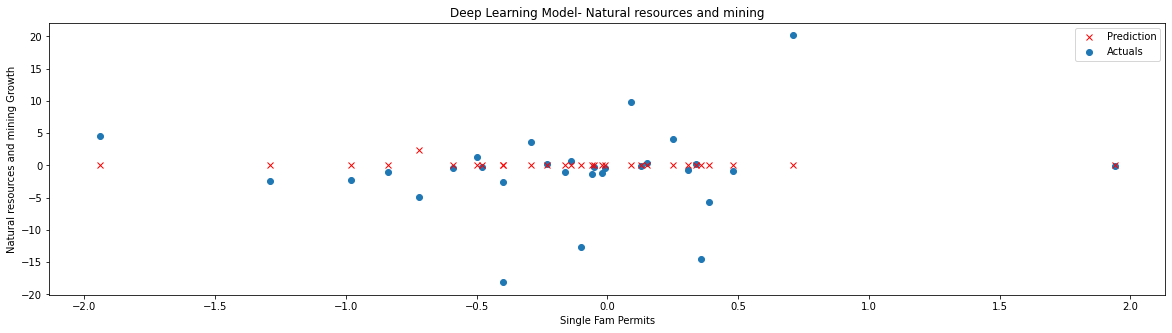

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 52us/sample - loss: 2971.7795 - mae: 2972.2134 - val_loss: 3.9625 - val_mae: 4.3623
Epoch 2/40
40487/40487 [==============================] - 2s 47us/sample - loss: 2.6352 - mae: 2.9727 - val_loss: 1.6179 - val_mae: 1.9412
Epoch 3/40
40487/40487 [==============================] - 2s 47us/sample - loss: 1.7466 - mae: 2.0575 - val_loss: 2.1075 - val_mae: 2.4388
Epoch 4/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.5383 - mae: 1.8346 - val_loss: 1.6383 - val_mae: 1.9608
Epoch 5/40
40487/40487 [==============================] - 2s 48us/sample - loss: 1.3179 - mae: 1.6068 - val_loss: 1.7285 - val_mae: 2.0640
Epoch 6/40
40487/40487 [==============================] - 2s 48us/sample - loss: 1.2403 - mae: 1.5242 - val_loss: 1.1536 - val_mae: 1.4584
Epoch 7/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.1310 - mae: 1.4109 - val_lo

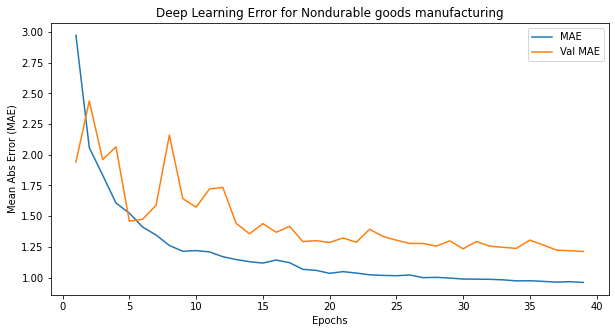

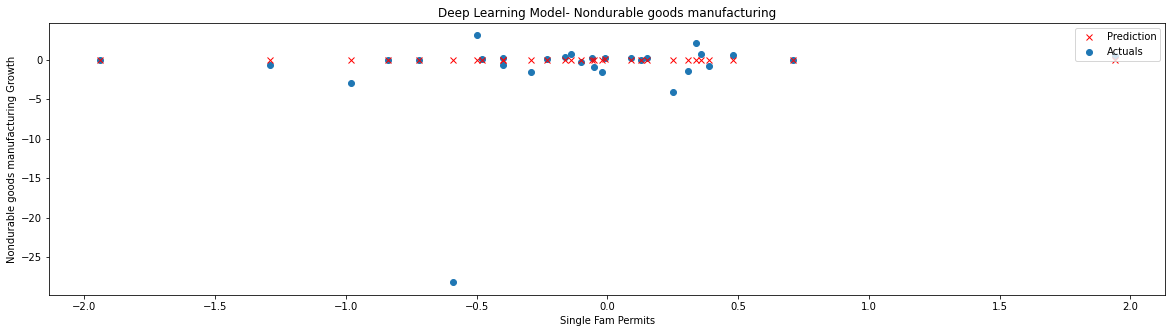

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 54us/sample - loss: 3470.5566 - mae: 3471.0164 - val_loss: 8.2617 - val_mae: 8.6700
Epoch 2/40
40487/40487 [==============================] - 2s 49us/sample - loss: 4.4657 - mae: 4.7516 - val_loss: 4.0926 - val_mae: 4.4746
Epoch 3/40
40487/40487 [==============================] - 2s 49us/sample - loss: 2.6104 - mae: 2.8390 - val_loss: 3.2616 - val_mae: 3.6333
Epoch 4/40
40487/40487 [==============================] - 2s 49us/sample - loss: 1.8492 - mae: 2.0543 - val_loss: 2.2165 - val_mae: 2.5594
Epoch 5/40
40487/40487 [==============================] - 2s 49us/sample - loss: 1.3432 - mae: 1.5345 - val_loss: 1.7512 - val_mae: 2.0562
Epoch 6/40
40487/40487 [==============================] - 2s 50us/sample - loss: 0.9679 - mae: 1.1455 - val_loss: 1.3271 - val_mae: 1.6427
Epoch 7/40
40487/40487 [==============================] - 2s 49us/sample - loss: 0.7920 - mae: 0.9567 - val_lo

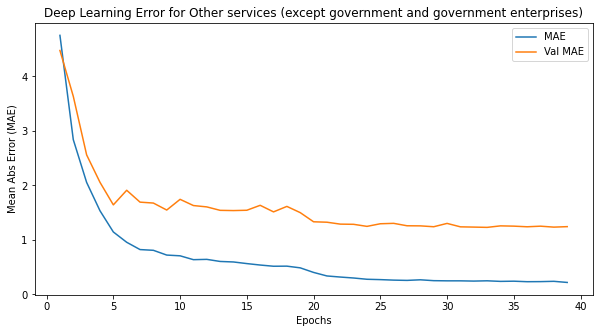

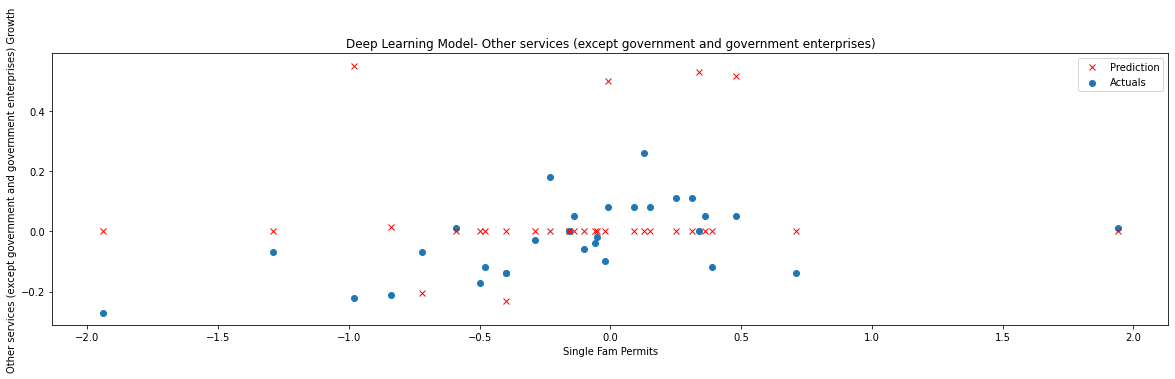

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 1762.2525 - mae: 1762.7333 - val_loss: 2.4827 - val_mae: 2.8972
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 5.2190 - mae: 5.6786 - val_loss: 1.5341 - val_mae: 1.9131
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 4.8581 - mae: 5.3150 - val_loss: 1.4921 - val_mae: 1.8590
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 4.6410 - mae: 5.0947 - val_loss: 0.9551 - val_mae: 1.2773
Epoch 5/40
40487/40487 [==============================] - 2s 44us/sample - loss: 4.5390 - mae: 4.9916 - val_loss: 1.5372 - val_mae: 1.8817
Epoch 6/40
40487/40487 [==============================] - 2s 43us/sample - loss: 4.4790 - mae: 4.9305 - val_loss: 0.9548 - val_mae: 1.2822
Epoch 7/40
40487/40487 [==============================] - 2s 44us/sample - loss: 4.4325 - mae: 4.8840 - val_lo

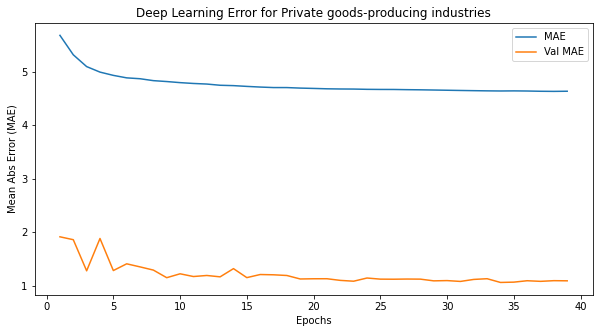

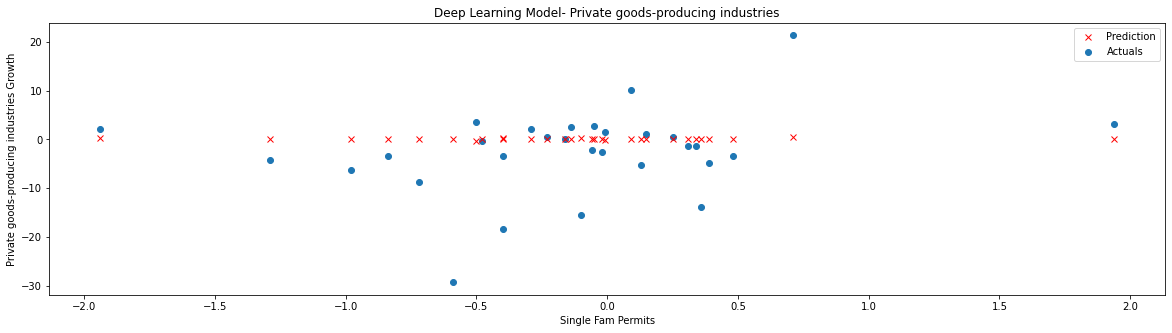

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 4271.1446 - mae: 4271.6318 - val_loss: 2.8419 - val_mae: 3.2511
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 7.2899 - mae: 7.7679 - val_loss: 1.9121 - val_mae: 2.2969
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 6.2234 - mae: 6.6983 - val_loss: 1.7438 - val_mae: 2.1155
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 5.7936 - mae: 6.2676 - val_loss: 2.1024 - val_mae: 2.4872
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 5.4963 - mae: 5.9693 - val_loss: 2.1651 - val_mae: 2.5413
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 5.4260 - mae: 5.8998 - val_loss: 1.0384 - val_mae: 1.3785
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 5.3065 - mae: 5.7793 - val_lo

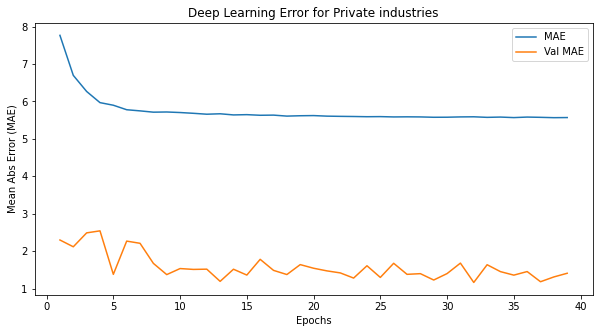

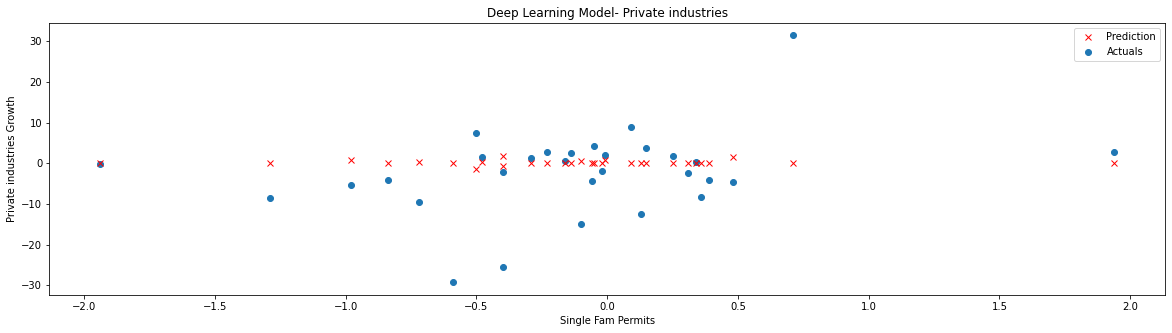

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 47us/sample - loss: 2233.5260 - mae: 2233.9912 - val_loss: 3.4864 - val_mae: 3.8376
Epoch 2/40
40487/40487 [==============================] - 2s 40us/sample - loss: 3.3481 - mae: 3.7940 - val_loss: 0.8935 - val_mae: 1.2228
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 2.6375 - mae: 3.0785 - val_loss: 1.2348 - val_mae: 1.5702
Epoch 4/40
40487/40487 [==============================] - 2s 41us/sample - loss: 2.2926 - mae: 2.7316 - val_loss: 1.1010 - val_mae: 1.4390
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 2.0589 - mae: 2.4971 - val_loss: 1.0571 - val_mae: 1.3882
Epoch 6/40
40487/40487 [==============================] - 2s 42us/sample - loss: 1.9221 - mae: 2.3599 - val_loss: 0.8371 - val_mae: 1.1521
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.8762 - mae: 2.3141 - val_lo

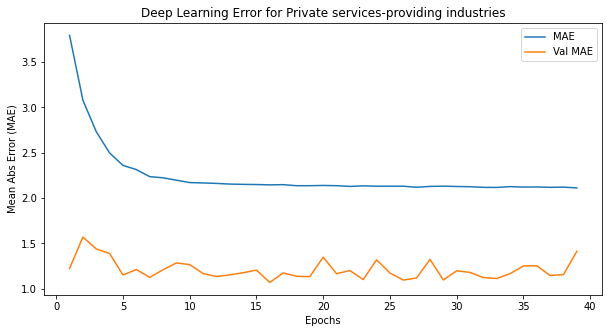

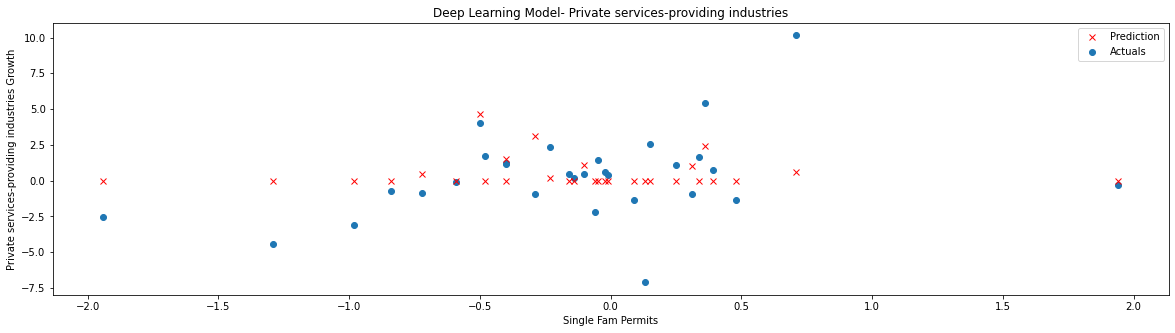

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 3798.5709 - mae: 3798.9783 - val_loss: 5.2076 - val_mae: 5.5651
Epoch 2/40
40487/40487 [==============================] - 2s 43us/sample - loss: 3.0114 - mae: 3.3132 - val_loss: 3.2461 - val_mae: 3.5653
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.2385 - mae: 1.5212 - val_loss: 1.4228 - val_mae: 1.7219
Epoch 4/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7787 - mae: 1.0533 - val_loss: 1.3093 - val_mae: 1.6013
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7591 - mae: 1.0290 - val_loss: 1.7841 - val_mae: 2.0878
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6228 - mae: 0.8910 - val_loss: 0.9322 - val_mae: 1.2391
Epoch 7/40
40487/40487 [==============================] - 2s 42us/sample - loss: 0.5164 - mae: 0.7800 - val_lo

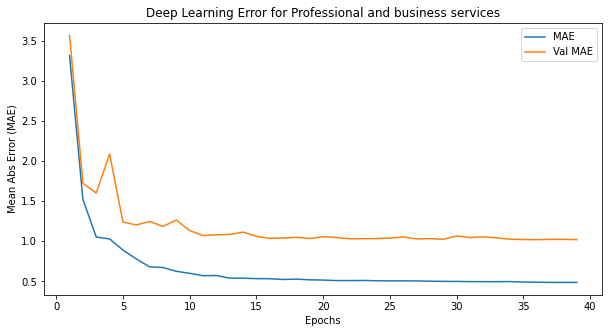

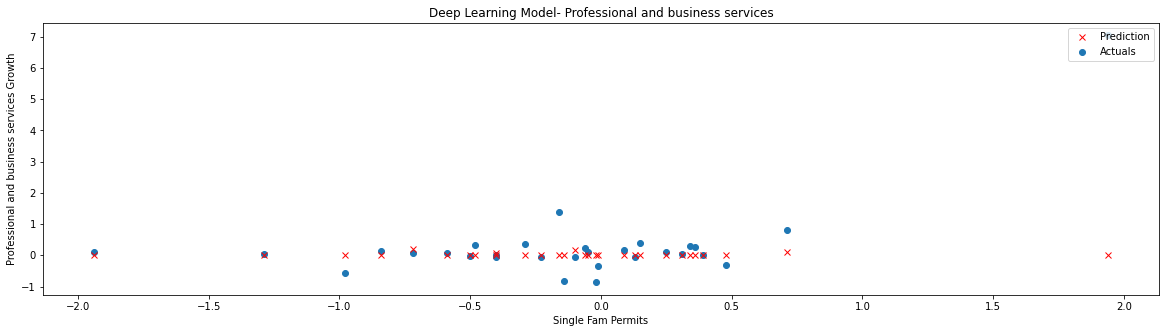

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 4414.1923 - mae: 4414.6890 - val_loss: 54.7774 - val_mae: 55.2714
Epoch 2/40
40487/40487 [==============================] - 2s 43us/sample - loss: 31.8737 - mae: 32.3597 - val_loss: 6.0585 - val_mae: 6.5289
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 4.5148 - mae: 4.9107 - val_loss: 2.8302 - val_mae: 3.2066
Epoch 4/40
40487/40487 [==============================] - 2s 42us/sample - loss: 2.3811 - mae: 2.6893 - val_loss: 1.5830 - val_mae: 1.9338
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.4734 - mae: 1.7186 - val_loss: 1.5335 - val_mae: 1.8513
Epoch 6/40
40487/40487 [==============================] - 2s 48us/sample - loss: 1.2358 - mae: 1.4538 - val_loss: 2.8509 - val_mae: 3.1920
Epoch 7/40
40487/40487 [==============================] - 2s 46us/sample - loss: 1.1567 - mae: 1.3653 - va

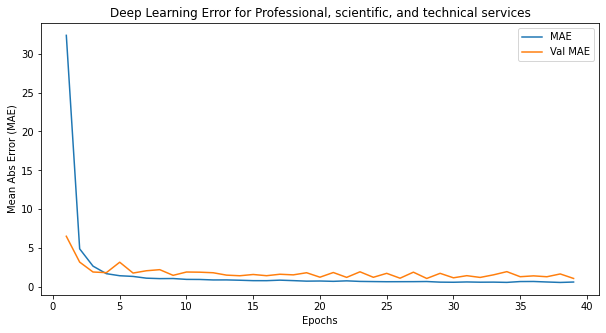

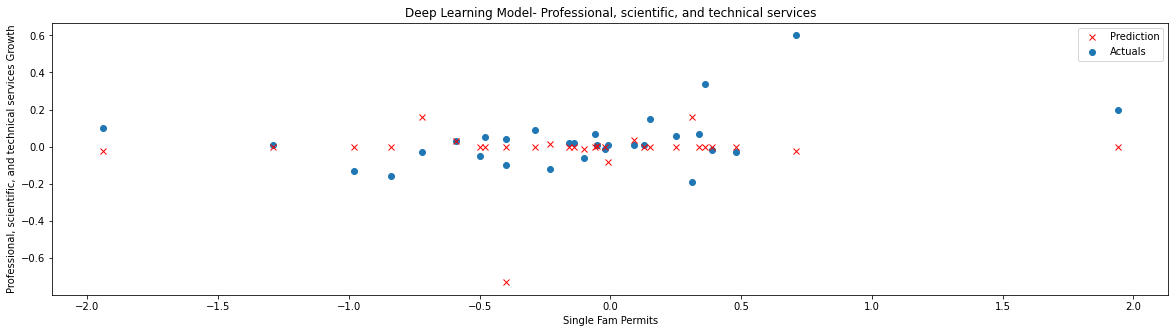

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 5613.1354 - mae: 5613.4692 - val_loss: 1.7076 - val_mae: 2.0061
Epoch 2/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.0945 - mae: 1.4171 - val_loss: 0.8627 - val_mae: 1.1557
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.9052 - mae: 1.2261 - val_loss: 0.7339 - val_mae: 1.0231
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.7869 - mae: 1.1070 - val_loss: 0.8851 - val_mae: 1.1758
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.7218 - mae: 1.0415 - val_loss: 0.8429 - val_mae: 1.1324
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.7236 - mae: 1.0432 - val_loss: 0.8306 - val_mae: 1.1201
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.6877 - mae: 1.0072 - val_lo

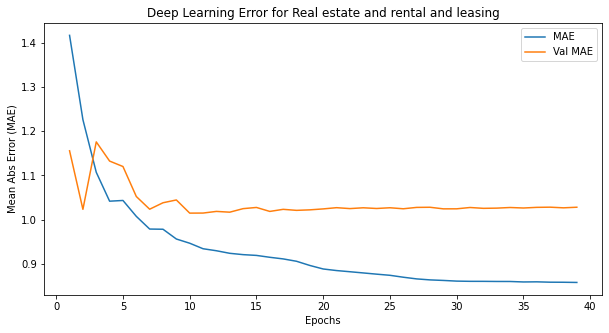

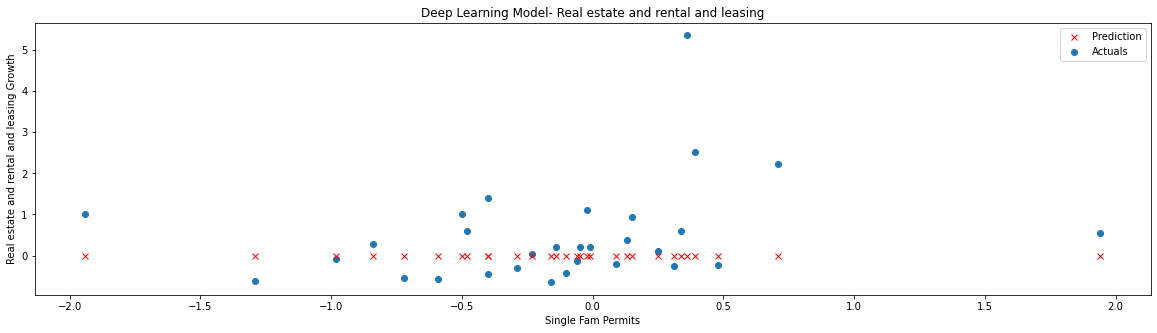

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 2373.0529 - mae: 2373.4492 - val_loss: 3.3047 - val_mae: 3.6725
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.5726 - mae: 1.8688 - val_loss: 2.3015 - val_mae: 2.6558
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.8430 - mae: 1.1018 - val_loss: 1.6382 - val_mae: 1.9594
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5358 - mae: 0.7785 - val_loss: 0.7855 - val_mae: 1.0951
Epoch 5/40
40487/40487 [==============================] - 2s 46us/sample - loss: 0.3722 - mae: 0.6108 - val_loss: 0.8786 - val_mae: 1.1788
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.3055 - mae: 0.5377 - val_loss: 0.8559 - val_mae: 1.1709
Epoch 7/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.2729 - mae: 0.5044 - val_lo

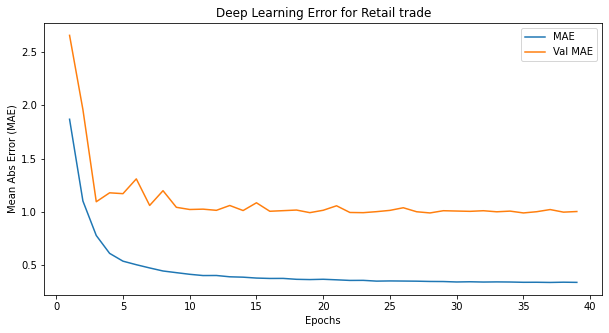

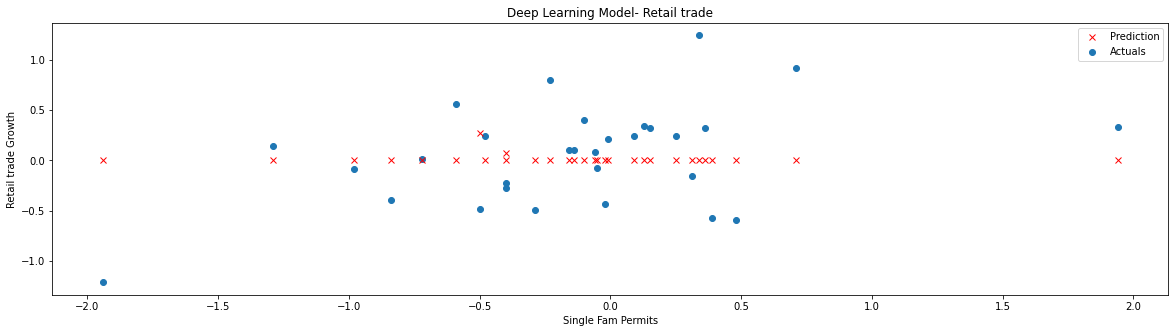

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 4069.1483 - mae: 4069.4465 - val_loss: 1.7698 - val_mae: 2.0698
Epoch 2/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.1356 - mae: 1.4284 - val_loss: 1.1034 - val_mae: 1.3965
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7737 - mae: 1.0648 - val_loss: 1.1046 - val_mae: 1.3996
Epoch 4/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.6625 - mae: 0.9529 - val_loss: 1.0929 - val_mae: 1.3881
Epoch 5/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5875 - mae: 0.8777 - val_loss: 1.0366 - val_mae: 1.3285
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.5082 - mae: 0.7978 - val_loss: 1.0367 - val_mae: 1.3300
Epoch 7/40
40487/40487 [==============================] - 2s 44us/sample - loss: 0.4565 - mae: 0.7463 - val_lo

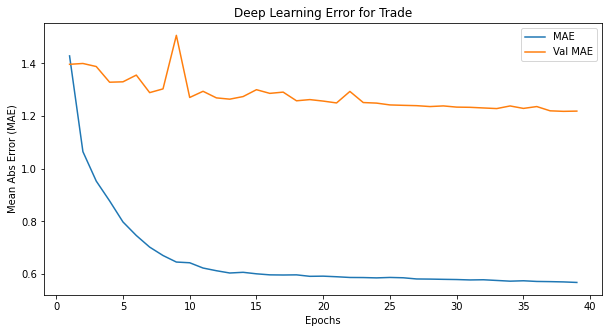

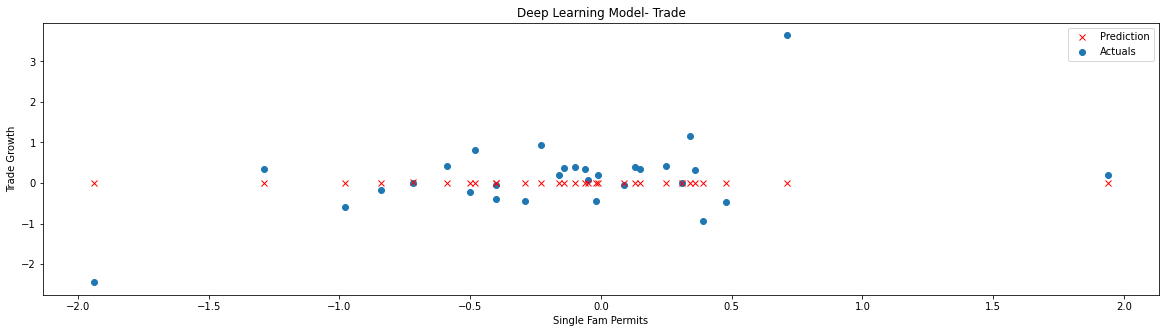

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 49us/sample - loss: 2446.9552 - mae: 2447.2671 - val_loss: 8.5478 - val_mae: 8.8667
Epoch 2/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.8509 - mae: 2.1306 - val_loss: 1.9448 - val_mae: 2.2473
Epoch 3/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.2988 - mae: 1.5717 - val_loss: 1.2125 - val_mae: 1.5144
Epoch 4/40
40487/40487 [==============================] - 2s 45us/sample - loss: 1.0950 - mae: 1.3655 - val_loss: 2.5103 - val_mae: 2.8096
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.9087 - mae: 1.1774 - val_loss: 1.1077 - val_mae: 1.4063
Epoch 6/40
40487/40487 [==============================] - 2s 45us/sample - loss: 0.8495 - mae: 1.1175 - val_loss: 1.3512 - val_mae: 1.6495
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7915 - mae: 1.0583 - val_lo

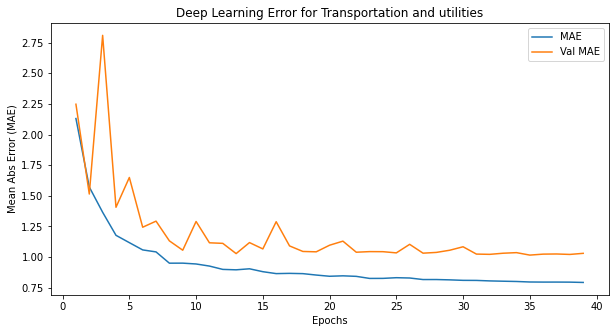

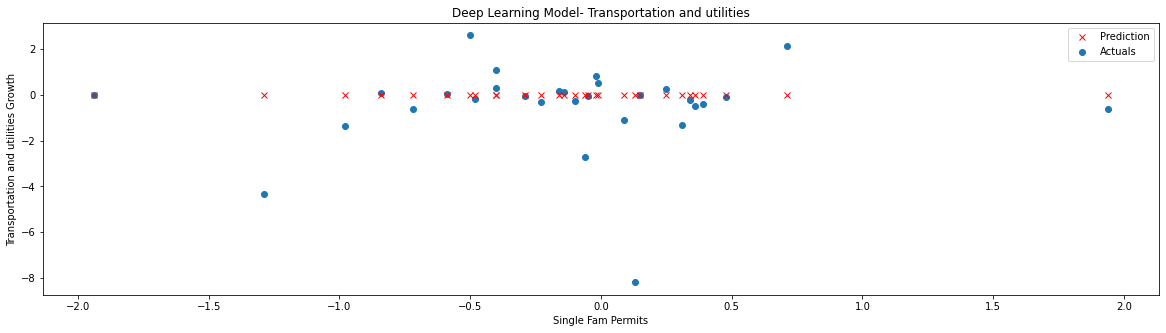

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 50us/sample - loss: 3884.6331 - mae: 3885.1230 - val_loss: 11.4376 - val_mae: 11.8941
Epoch 2/40
40487/40487 [==============================] - 2s 43us/sample - loss: 7.3710 - mae: 7.7388 - val_loss: 7.0176 - val_mae: 7.3687
Epoch 3/40
40487/40487 [==============================] - 2s 42us/sample - loss: 3.2294 - mae: 3.5213 - val_loss: 3.3481 - val_mae: 3.6882
Epoch 4/40
40487/40487 [==============================] - 2s 43us/sample - loss: 2.1794 - mae: 2.4436 - val_loss: 2.2371 - val_mae: 2.5579
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.6517 - mae: 1.9027 - val_loss: 1.9640 - val_mae: 2.2806
Epoch 6/40
40487/40487 [==============================] - 2s 44us/sample - loss: 1.4332 - mae: 1.6731 - val_loss: 1.8113 - val_mae: 2.1232
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.2213 - mae: 1.4536 - val_

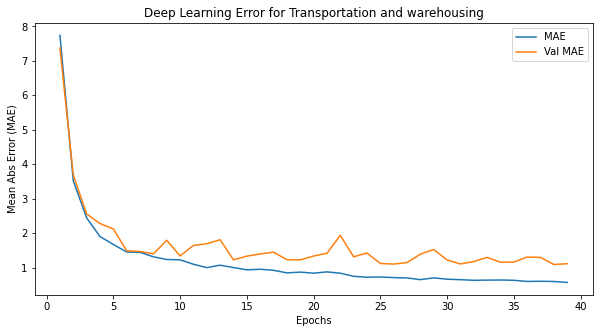

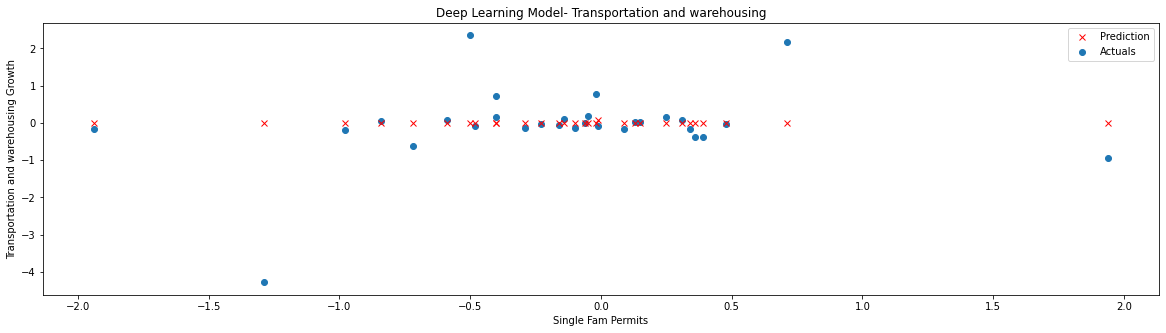

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 48us/sample - loss: 3639.3834 - mae: 3639.8650 - val_loss: 9.4771 - val_mae: 9.9350
Epoch 2/40
40487/40487 [==============================] - 2s 43us/sample - loss: 5.2281 - mae: 5.6188 - val_loss: 5.2920 - val_mae: 5.6748
Epoch 3/40
40487/40487 [==============================] - 2s 43us/sample - loss: 3.0452 - mae: 3.3593 - val_loss: 1.9747 - val_mae: 2.3435
Epoch 4/40
40487/40487 [==============================] - 2s 42us/sample - loss: 1.8334 - mae: 2.1078 - val_loss: 1.8207 - val_mae: 2.1742
Epoch 5/40
40487/40487 [==============================] - 2s 41us/sample - loss: 1.5592 - mae: 1.8121 - val_loss: 1.1343 - val_mae: 1.4639
Epoch 6/40
40487/40487 [==============================] - 2s 42us/sample - loss: 1.2133 - mae: 1.4408 - val_loss: 3.3717 - val_mae: 3.7392
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.0780 - mae: 1.2973 - val_lo

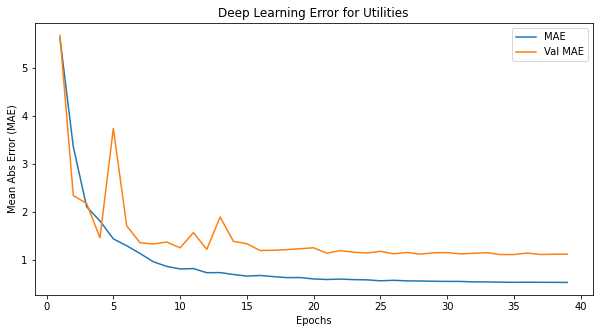

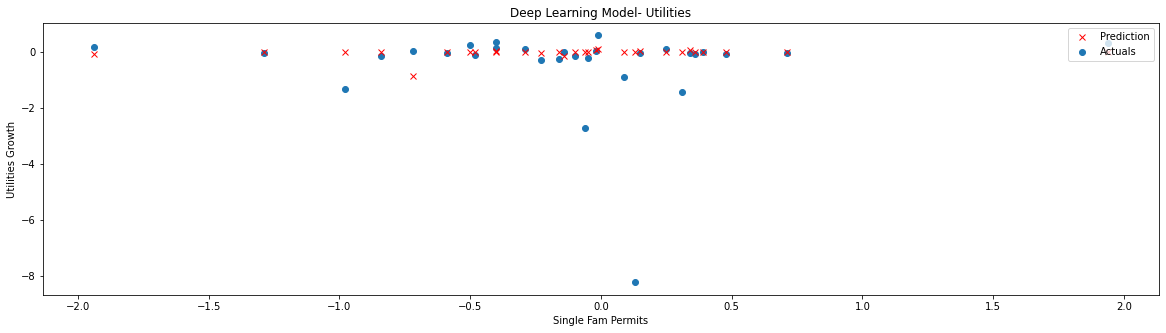

Train on 40487 samples, validate on 10122 samples
Epoch 1/40
40487/40487 [==============================] - 2s 46us/sample - loss: 3532.6970 - mae: 3533.0977 - val_loss: 2.7955 - val_mae: 3.1459
Epoch 2/40
40487/40487 [==============================] - 2s 42us/sample - loss: 2.4642 - mae: 2.7470 - val_loss: 3.1223 - val_mae: 3.4877
Epoch 3/40
40487/40487 [==============================] - 2s 42us/sample - loss: 1.7464 - mae: 2.0112 - val_loss: 1.9231 - val_mae: 2.2539
Epoch 4/40
40487/40487 [==============================] - 2s 43us/sample - loss: 1.1157 - mae: 1.3621 - val_loss: 1.1712 - val_mae: 1.4701
Epoch 5/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.9067 - mae: 1.1456 - val_loss: 1.4648 - val_mae: 1.7833
Epoch 6/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7770 - mae: 1.0103 - val_loss: 1.1853 - val_mae: 1.5085
Epoch 7/40
40487/40487 [==============================] - 2s 43us/sample - loss: 0.7045 - mae: 0.9373 - val_lo

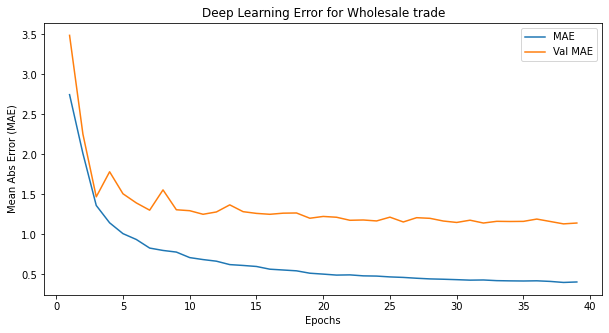

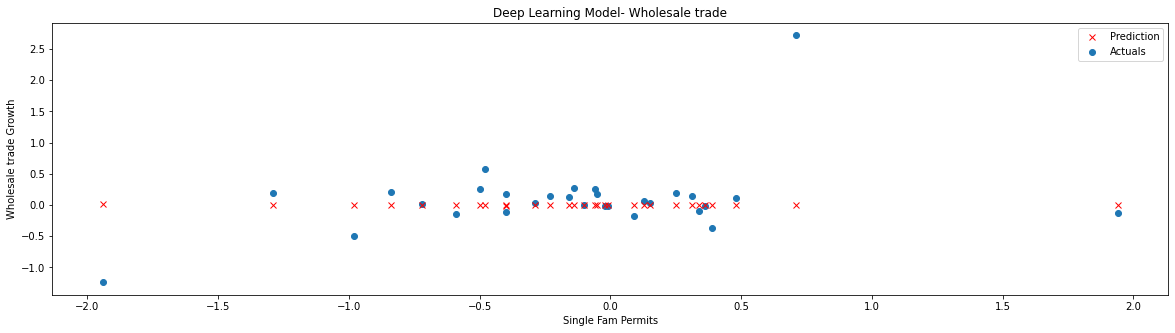

In [74]:
os.chdir(deep_learning_img2)
df_train_label=df_train[label]
df_val_label=df_val[label]


var=var_pca
df_pred_dl=pd.DataFrame()
epoch=40

for label in var_bed:
  model = tf.keras.models.Sequential([
   # tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
   # tf.keras.layers.LSTM(32, return_sequences=True),
    #tf.keras.layers.GlobalAveragePooling1D(),
  #  tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu",input_shape=(16,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])



  history = model.fit(df_train[var_pca],df_train[label],epochs=epoch,validation_data=(df_val[var_pca],df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(1,epoch),history.history["mae"][1:epoch],label="MAE")
  plt.plot(np.arange(1,epoch),history.history["val_mae"][1:epoch],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("Deep Learning Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))
  mod=model.predict(df_pca_test)
  df_pred_dl=pd.concat([df_pred_dl,pd.DataFrame(mod)],axis=1)
    #'Total Construction Spending',
  plt_var='Construction'
  plt.figure(figsize=(20, 5))
  plt.title('Deep Learning Model- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
  plt.plot(df_train[plt_var][0:30], model.predict(df_train[var_pca][0:30]),'x',color='r',label="Prediction")
  plt.xlabel("Single Fam Permits")
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Deep_Learning_predictions_{}.png".format(label))
  plt.show()



In [0]:
os.chdir(base_dir)
df_pred_dl.to_csv("Deep_learning_predictions_v3.csv")

In [0]:
  #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('GBM (20 Est; 20 Trees)- {}'.format(label))
  plt.scatter(df_train[plt_var][0:30], df_train_label[0:30],label="Actuals")
  plt.plot(df_train[plt_var][0:30], clf.predict(df_train_var[0:30]),'x',color='r',label="Prediction")
  plt.show()
  df_pred_grad_boost=pd.concat([df_pred_grad_boost,pd.DataFrame(clf.predict(df_pca_test))],axis=1)

In [1]:
# Poisson regression code
import statsmodels.api as sm

#exog, endog = sm.add_constant(df_train_array), df_train_label
mod = sm.OLS(df_train_label,df_train_array).fit()

mod.summary()


NameError: ignored

In [0]:
####CREATE THE DATASET.  CLEAN. TRANSPOSE. FILTER DATASETS WITH OIL&GAS>20 MIL IN AT LEAST 9 YEARS OUT OF 16.
years=9 #Number of years 
amt=5

msa_files=pd.DataFrame()
for file in input_files:
    msa_file=pd.read_csv(file)
    keep_indices=[0,1,4,5,9,10,14,34,50,56,65,78]
    column_keep=["Description", "2001","2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']
    msa_file=msa_file[column_keep].iloc[keep_indices,:]
    msa_file_T=pd.DataFrame(msa_file.T[1:]).reset_index()
    msa_file_T=msa_file_T.rename(columns={"index":"Year",0:"All industries",1:"Private industries",4:"Forestry,fishing",5:"Oil_gas",9:"Utilities",
                                          10:"Manufacturing",14:"Non-metal miner manufac",34:"Retail",
                                          50:"Finance_Ins",56:"Real_estate",65:"Education",78:"Government"})*1
    for var in msa_file_T.columns:
        msa_file_T[var]=msa_file_T[var].replace("(D)",np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan)*1
        msa_file_T[var]=msa_file_T[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)
        #####CREATE AN INDICATOR IF THERE'S DATA IN OIL & GAS FIELD
        if var=="Oil_gas":
          msa_file_T["dset_keep"]=np.where(msa_file_T["Oil_gas"].astype('float')>amt,1,0) ###ONLY YEARS WITH $20 MILLION OUTPUT
        msa_file_T[var]=msa_file_T[var].fillna(method='ffill')
        msa_file_T[var]=msa_file_T[var].fillna(method='bfill')
        msa_file_T[var]=msa_file_T[var].replace(np.nan,0)
    #CREATE A FILTER WHERE THERE'S MORE THAN 9 YEARS OF DATA OUT OF 16 YEARS FOR OIL & GAS WITH $20 MILLION OUTPUT
    if msa_file_T["dset_keep"].astype('float').sum()>years:
      msa_files=pd.concat([msa_files,msa_file_T],axis=0)






In [0]:

msa_list=[]
for file in input_files:
  msa_list.append(file[7:])
os.chdir(base_dir)
msa_list=pd.DataFrame(msa_list)
msa_list.to_csv("MSA_list.csv")

os.chdir(msa_dir)

In [0]:
msa_files.shape
os.chdir(base_dir)
msa_files.to_excel("msa_files.xlsx")

os.chdir(msa_dir)

In [0]:
msa_files.columns

Index(['Year', 'All industries', 'Private industries', 'Forestry,fishing',
       'Oil_gas', 'Utilities', 'Manufacturing', 'Non-metal miner manufac',
       'Retail', 'Finance_Ins', 'Real_estate', 'Education', 'Government',
       'dset_keep'],
      dtype='object')

In [0]:

USA_file=USA_gdp[column_keep].iloc[0:3]
USA_file_T=USA_file.T[1:].reset_index()
USA_file_T=USA_file_T.rename(columns={"index":"Year",0:"GDP Growth",1:"All industries_USA",2:"Private industries_USA"})
print(USA_file_T)

    Year GDP Growth All industries_USA Private industries_USA
0   2001      -0.01          9551195.1              8381322.4
1   2002     0.0174          9872503.4              8632372.4
2   2003     0.0186         10346834.9              9037613.8
3   2004      0.038           11033711              9650075.6
4   2005      0.035         11793460.1             10342186.4
5   2006     0.0286         12488192.4             10966300.6
6   2007     0.0188         13058074.8             11453293.7
7   2008     -0.014         13233095.5             11555119.5
8   2009    -0.0207         12959750.1             11231707.8
9   2010     0.0256         13421681.4             11635874.4
10  2011     0.0155         13885695.4               12076405
11  2012     0.0255         14485166.1               12652793
12  2013     0.0184           14966839               13111140
13  2014     0.0245           15628087               13723928
14  2015     0.0288         16358497.6             14391365.4
15  2016

In [0]:
MSA_files_complete=USA_file_T.merge(msa_files,left_on="Year",right_on="Year").set_index("Year")
MSA_files_complete["GDP Growth"]=MSA_files_complete["GDP Growth"].replace("(","-").replace(")","")
MSA_files_complete=MSA_files_complete.astype('float')

In [0]:
MSA_files_complete.head

<bound method NDFrame.head of       GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
...          ...                 ...  ...        ...                  ...
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0

[2040 r

In [0]:
def feature_engineering(dset_in):
    dset_out=pd.DataFrame()
    for col in dset_in.columns:
        dset_out[col]=dset_in[col]
        dset_out[col+"_log"]=dset_in[col].apply(lambda x: np.log(x+1))
        dset_out[col+"_squared"]=dset_in[col].apply(lambda x: np.square(x+1))
    return dset_out


def percent_of_msa_econ(dset_in):
  dset_out=pd.DataFrame()
  for col in dset_in.columns:
    if col !="All industries":
      #dset_out[col]=dset_in[col]
      dset_out[col+"_pct"]=[dset_in[col].iloc[i]/dset_in["All industries"].iloc[i] for i in range(len(dset_in["All industries"]))]
  return dset_out.astype(float)


In [0]:
MSA_files_complete["Recession_indicator"]=0
recession_years=['2001','2008','2009']
"""for i in range(len(MSA_files_complete)):
    if MSA_files_complete["Year"].iloc[i] in recession_years:
        MSA_files_complete["Recession_indicator"].iloc[i]=1
    else:
        MSA_files_complete["Recession_indicator"].iloc[i]=0"""
MSA_files_complete["Recession_indicator"]=np.where(MSA_files_complete.index.isin(recession_years),1,0) ####Much faster than doing a loop
        
pred_var=["All industries","Private industries","Forestry,fishing","Oil_gas",'Non-metal miner manufac',"Utilities","Manufacturing","Retail","Finance_Ins","Real_estate","Education","Government"]
label_var=["Recession_indicator"]

df_var=MSA_files_complete[pred_var].astype(float)
df_label=MSA_files_complete[label_var]
####convert it to numeric matrix
df_var_features=feature_engineering(df_var)
df_var_mat=np.matrix(df_var_features,float)
df_label_mat=np.matrix(df_label,float)




In [0]:
len(df_var_features.columns)

36

In [0]:
print(MSA_files_complete.head())

      GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1

[5 rows x 17 columns]


In [0]:
#####Sklearn doesn't return p-values of coefficients
from sklearn.linear_model import LogisticRegression
import sklearn.feature_selection
clf=LogisticRegression(random_state=0,solver='lbfgs').fit(df_var,df_label)
p_value=sklearn.feature_selection.f_regression(df_var,df_label)
clf.coef_



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.19132447e-04,  1.65104967e-04, -5.16736789e-04,
        -1.72669383e-04, -8.15980396e-04,  9.55167246e-05,
         6.37646245e-04, -2.05086771e-03,  3.67783229e-04,
         2.09203530e-04, -2.50417565e-04,  6.41444836e-05]])

In [0]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model


discrete_model.Logit(df_label_mat,df_var_mat)
results=sm.Logit(df_label_mat,df_var_mat)
results_f=results.fit()
print(results_f.summary())

Optimization terminated successfully.
         Current function value: 0.448014
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2005
Method:                           MLE   Df Model:                           34
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.03860
Time:                        15:54:48   Log-Likelihood:                -913.95
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                 0.0001030
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0032      0.002     -1.611      0.107      -0.007       0.001
x2            -1.8172      1.

In [0]:
###########CORRELATION BETWEEN INDIVIDUAL INDUSTRIES & ALL INDUSTRIES
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt



In [0]:
######################################Percent of Industry in Economy

df_var_pct=percent_of_msa_econ(df_var)
df_var_pct_mat=np.matrix(df_var_pct,"float")



for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["All industries_USA"]))

Private industries_pct  = (0.07857607971012692, 0.0003818596064877735)
Forestry,fishing_pct  = (0.03587423931726527, 0.10526728617437976)
Oil_gas_pct  = (0.02724675517189615, 0.21865561114826834)
Non-metal miner manufac_pct  = (-0.07716121604880719, 0.0004863635416020818)
Utilities_pct  = (-0.032022712426295, 0.14822387315109725)
Manufacturing_pct  = (-0.3299386510953362, 5.275678246587498e-53)
Retail_pct  = (-0.045056924159328195, 0.04186664284876076)
Finance_Ins_pct  = (0.014912346121684825, 0.5008448783076218)
Real_estate_pct  = (0.013942160058176493, 0.5291125927832199)
Education_pct  = (0.001079475244547311, 0.9611375778615656)
Government_pct  = (-0.08229962918802992, 0.00019827031834943032)


In [0]:
################CORRELATION BETWEEN INDUSTRY PERCENTAGE OF MSA'S ECONOMY AND USA GDP GROWTH
for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["GDP Growth"]))

Private industries_pct  = (0.03214352496516699, 0.14669880332275434)
Forestry,fishing_pct  = (0.007664066073518147, 0.7293796338339895)
Oil_gas_pct  = (-0.009735010845500335, 0.6603457102761396)
Non-metal miner manufac_pct  = (0.0019329586461899484, 0.9304717828892327)
Utilities_pct  = (-0.00822217687775451, 0.7105299450089176)
Manufacturing_pct  = (0.001562047391223188, 0.9437887014256673)
Retail_pct  = (0.0573875713852562, 0.009527130742256171)
Finance_Ins_pct  = (0.01591392031371679, 0.4725237675937108)
Real_estate_pct  = (0.006526605923455836, 0.7682952701574847)
Education_pct  = (-0.009094727081901418, 0.6814154206563484)
Government_pct  = (-0.0327595032423046, 0.1391088920369939)


In [0]:
results_pct=sm.Logit(df_label_mat,df_var_pct_mat)
results_pct_f=results_pct.fit()
print(results_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.459813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2029
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.01328
Time:                        15:56:28   Log-Likelihood:                -938.02
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                  0.004908
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6146      0.422     -3.827      0.000      -2.441      -0.788
x2            -2.7214      6.

In [0]:
df_oilgas_pct=feature_engineering(df_var_pct[["Oil_gas_pct","Retail_pct","Education_pct","Utilities_pct"]])
df_oil_gas_pct_mat=np.matrix(df_oilgas_pct,"float")



print(df_oilgas_pct.head())


   Oil_gas_pct  Oil_gas_pct_log  ...  Utilities_pct_log  Utilities_pct_squared
0     0.066650         0.064523  ...           0.021814               1.044593
1     0.208344         0.189251  ...           0.011113               1.022475
2     0.003812         0.003805  ...           0.012296               1.024897
3     0.005928         0.005911  ...           0.001218               1.002439
4     0.003807         0.003800  ...           0.015456               1.031394

[5 rows x 12 columns]


In [0]:
results_oil_gas_pct=sm.Logit(df_label_mat,df_oil_gas_pct_mat[:,:6])
results_oil_gas_pct_f=results_oil_gas_pct.fit()
print(results_oil_gas_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.464881
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2034
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                0.002399
Time:                        15:56:28   Log-Likelihood:                -948.36
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                    0.4717
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            90.7359    156.583      0.579      0.562    -216.160     397.632
x2           -58.0405     97.

In [0]:
from matplotlib import pyplot as plt

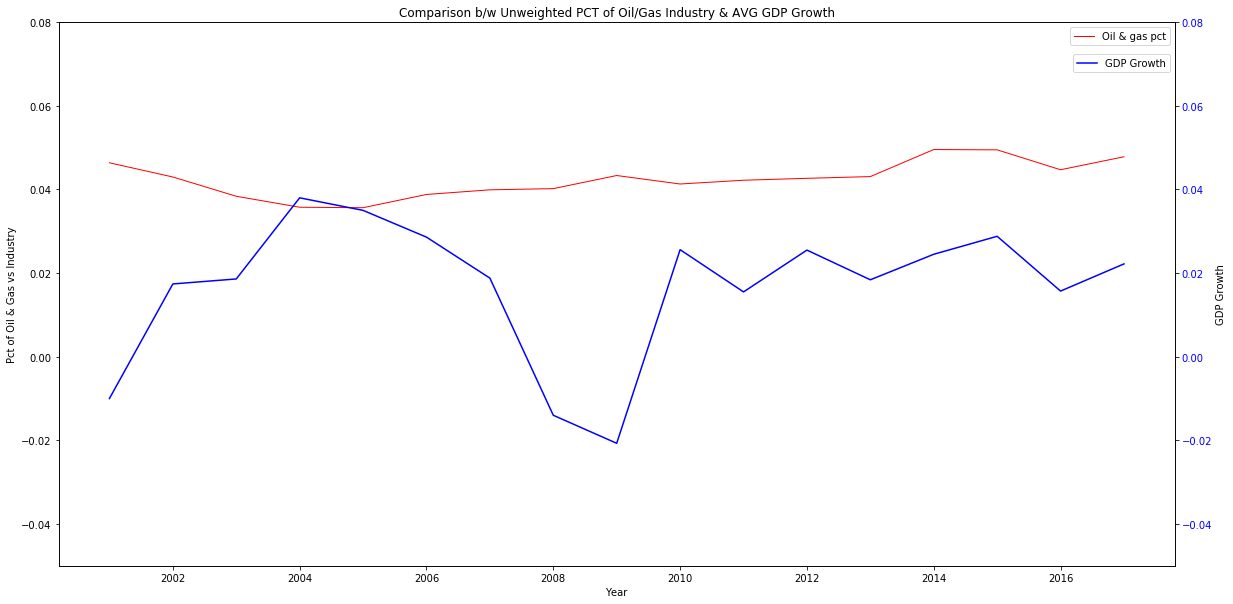

In [0]:
color = 'red'
fig1=df_var_pct["Oil_gas_pct"].groupby(df_var.index).mean()
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label='Oil & gas pct')
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label='GDP Growth')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title("Comparison b/w Unweighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax1.set_ylim([-.05,.08])
ax2.set_ylim([-.05,.08])
plt.show()

In [0]:
wm = lambda x: np.average(x, weights=df_var_pct.loc[x.index.unique(),"Oil_gas"])

# Define a dictionary with the functions to apply for a given column:
f = { 'Oil_gas_pct': {'weighted_mean' : wm} }

# Groupby and aggregate with your dictionary:
fig1=df_var_pct.groupby(df_var_pct.index).agg(f)
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label="Weighted Oil & Gas Pct ")
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label="GDP Growth")
plt.title("Comparison b/w Weighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax2.set_ylim([-.05,.08])

plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


KeyError: ignored

In [0]:
for i in fig1.columns:
  print(pearsonr(fig1[i],fig2))

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [0]:
df_var_pct